<h2>Извлечение данных и их подготовка<h2>

Для начала импортируем модули подподули,которые необходимы нам

In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

poverty_data_has_kvartal_mon=pd.read_spss(r"poverty\014a10d4-7d7b-4455-a30a-f40cfeab2400_2015.sav")

In [2]:

file2012=pd.read_spss(r"E:\Desktop\DL\statistics\stat_python\poverty\f11127ce-66c8-4399-8193-00b155d40bac_2012.sav")
file2012.iloc[:, 10:15].groupby('oblast').obl_reg.unique().head(15)
file2012.iloc[:, 0:15][file2012.oblast=='Ошская'].shape
# file2012.iloc[:, 0:15].shape

(2607, 15)

In [3]:
poverty_2020=pd.\
read_spss(r"E:\Desktop\DL\statistics\stat_python\poverty\0195e25e-82f8-4f98-8f6d-0a7c7de00c32_2020.sav")
poverty_2020.iloc[:,5:25].tail(3)

f1r1q8                                 f1r1q9   b002 oblast    kv  \
19030  До 14 лет            Нет  начального образования  город     Ош  12.0   
19031  До 14 лет  В возрасте от 0 до 5 лет включительно  город     Ош  12.0   
19032  До 14 лет  В возрасте от 0 до 5 лет включительно  город     Ош  12.0   

          expfact       weight           pcc          pccf  pline_dc  f_linec  \
19030  285.367546  1997.572823  24012.584405  14958.492749     96.62    54.17   
19031  285.367546  1997.572823  24012.584405  14958.492749     96.62    54.17   
19032  285.367546  1997.572823  24012.584405  14958.492749     96.62    54.17   

            CPI     pccddc   cpsc  fpsc      pgc       p2c  fpgc  fp2c  \
19030  1.010335  65.361515  100.0   0.0  0.32352  0.104665   0.0   0.0   
19031  1.010335  65.361515  100.0   0.0  0.32352  0.104665   0.0   0.0   
19032  1.010335  65.361515  100.0   0.0  0.32352  0.104665   0.0   0.0   

       pccserv  
19030   3630.0  
19031   3630.0  
19032   3630.0

In [4]:
poverty_2020.columns

Index(['hh_code', 'f1r1q1', 'sex', 'f1r1q3', 'age', 'f1r1q8', 'f1r1q9', 'b002',
       'oblast', 'kv', 'expfact', 'weight', 'pcc', 'pccf', 'pline_dc',
       'f_linec', 'CPI', 'pccddc', 'cpsc', 'fpsc', 'pgc', 'p2c', 'fpgc',
       'fp2c', 'pccserv', 'pccnf', 'pccdur', 'incpcd', 'year'],
      dtype='object')

Просмотрим любой файл  в нашей Директории

In [5]:
poverty_data_basic=pd.read_spss(r"poverty\0a3145f6-c7d1-44db-977b-f0e7427b6611_2017.sav")
poverty_data_basic.head(3)

hh_code   c1      sex        c3   age                              c8  \
0  20001.0  1.0  Женский     Глава  47.0                   Вдовец /вдова   
1  20001.0  2.0  Мужской  Сын/дочь  19.0  Никогда не состоял (а) в браке   
2  20001.0  3.0  Женский  Сын/дочь   5.0                             NaN   

                                      c9  b002          oblast  \
0                 Среднее (полное) общее  село  Иссык-Кульская   
1                 Среднее (полное) общее  село  Иссык-Кульская   
2  В возрасте от 0 до 5 лет включительно  село  Иссык-Кульская   

               obl_reg  ...  cpsc  fpsc  pgc  p2c  fpgc  fp2c      pccserv  \
0  Иссык-Кульская-село  ...   0.0   0.0  0.0  0.0   0.0   0.0  7295.333333   
1  Иссык-Кульская-село  ...   0.0   0.0  0.0  0.0   0.0   0.0  7295.333333   
2  Иссык-Кульская-село  ...   0.0   0.0  0.0  0.0   0.0   0.0  7295.333333   

    pccnf      pccdur     incpcd  
0  8440.0  613.101278  56.066915  
1  8440.0  613.101278  56.066915  
2  8440.0  613.101278  56.066915  

[3 rows x 29 columns]

In [6]:
poverty_data_basic.columns

Index(['hh_code', 'c1', 'sex', 'c3', 'age', 'c8', 'c9', 'b002', 'oblast',
       'obl_reg', 'kv', 'expfact', 'weight', 'pcc', 'pccf', 'pline_dc',
       'f_linec', 'CPI', 'pccddc', 'cpsc', 'fpsc', 'pgc', 'p2c', 'fpgc',
       'fp2c', 'pccserv', 'pccnf', 'pccdur', 'incpcd'],
      dtype='object')

E:\Desktop\DL\statistics\stat_python\poverty\0a3145f6-c7d1-44db-977b-f0e7427b6611_2017.sav  - этот файл имеет схожие колонки, которые встречаются более менее во всех других таблицах. Возьмем ее колонки за базовый набор колонок.

Возьмем за основу минимальный набор колонок, которые есть у  poverty_data_basic

In [7]:
min_cols=list(poverty_data_basic.columns)
min_cols

['hh_code',
 'c1',
 'sex',
 'c3',
 'age',
 'c8',
 'c9',
 'b002',
 'oblast',
 'obl_reg',
 'kv',
 'expfact',
 'weight',
 'pcc',
 'pccf',
 'pline_dc',
 'f_linec',
 'CPI',
 'pccddc',
 'cpsc',
 'fpsc',
 'pgc',
 'p2c',
 'fpgc',
 'fp2c',
 'pccserv',
 'pccnf',
 'pccdur',
 'incpcd']


Посмотрим структуру таблиц в сравнении min_cols
и напечатаем те которые имеют иную структуру 

In [2]:
files_directory="E:\Desktop\DL\statistics\stat_python\poverty"

for file_name in os.listdir(files_directory):
    file_name_path = os.path.join(files_directory,file_name)
    if os.path.isfile(file_name_path) and file_name_path.endswith(".sav"):
        poverty_data = pd.read_spss(file_name_path)
        # Добавим по одному столбцу в конец, где будет указан за какой год, данные
        poverty_data['data_year'] = file_name[-8:-4]

        if list(poverty_data.columns)[:-1] != min_cols:
            print(file_name)
            # Cравнение колонок в каждой таблице с минимальным набором, которые мы опредили  в min_cols
            common_cols = poverty_data.columns[:-1].intersection(min_cols)
            diff_cols = poverty_data.columns[:-1].difference(common_cols)
            print('number of columns: ', len(poverty_data.columns),'  ', 'common cols number:', len(common_cols))
            
            #Смотрим какие данные они несут
            print(poverty_data[diff_cols].head(2))
            print()

NameError: name 'os' is not defined

Объеденим все таблицы в один датафрейм, будем добавлять предварительно обработанную каждую таблицу в цикле из files_directory 

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #игнорируем FutureWarning

# Создадим пустой датафрейм, будем по одному добавлять данные из файлов
all_poverty_data=pd.DataFrame()


for file_name in os.listdir(files_directory):
    file_name_path = os.path.join(files_directory,file_name)
    if os.path.isfile(file_name_path) and file_name_path.endswith(".sav"):
        poverty_data = pd.read_spss(file_name_path)
        # Добавим по одному столбцу в конец, где будет указан за какой год, данные
        poverty_data['data_year'] = int(file_name[-8:-4])
        
        #Заменим 'c2' на 'sex' и 'c7' на'age', по результатам предыдущего запроса, в этих колонках
        #данные определяют те же пораметры, только имеют отличные названия от min_cols
        if 'c2' in poverty_data.columns and 'c7' in poverty_data.columns:
            poverty_data.rename(columns = {
                'c2':'sex',
                'c7':'age'
            }, inplace = True)
        
        #В одной только таблице есть колонка 'f1r1q1', там же есть 'f1r1q3','f1r1q9',
        # которые имеют следующие названия в min_cols,
        # и несут те же параметры, мы их переименуем как в min_cols
        if 'f1r1q1' in poverty_data.columns:
            poverty_data.rename(columns = {
                'f1r1q1':'c1'
                ,'f1r1q3': 'c3'
                , 'f1r1q8': 'c8'
                ,'f1r1q9':'c9'
            }, inplace = True)

        #Объедененный датасет из всех файлов
        all_poverty_data=all_poverty_data.append(poverty_data)


И вот наш объеденненый датафрейм

In [10]:
all_poverty_data.head(4)


hh_code  kvartal  mon   c1      sex        c3   age  \
0  20001.0      1.0  1.0  3.0  Мужской  Сын/дочь  17.0   
1  20001.0      1.0  1.0  2.0  Женский  Муж/жена  45.0   
2  20001.0      1.0  1.0  4.0  Женский  Сын/дочь   3.0   
3  20001.0      1.0  1.0  1.0  Мужской     Глава  49.0   

                                   c8                                     c9  \
0      Никогда не состоял (а) в браке      Основное общее (неполное среднее)   
1  Состоит в зарегистрированном браке                 Среднее (полное) общее   
2                           До 14 лет  В возрасте от 0 до 5 лет включительно   
3  Состоит в зарегистрированном браке                 Среднее (полное) общее   

   b002  ... fpgc fp2c  pccserv   pccnf     pccdur     incpcd  data_year  \
0  село  ...  0.0  0.0   3453.5  6387.0  237.33906  57.651216       2015   
1  село  ...  0.0  0.0   3453.5  6387.0  237.33906  57.651216       2015   
2  село  ...  0.0  0.0   3453.5  6387.0  237.33906  57.651216       2015   
3  село  ...  0.0  0.0   3453.5  6387.0  237.33906  57.651216       2015   

   year  cdur  hsize  
0   NaN   NaN    NaN  
1   NaN   NaN    NaN  
2   NaN   NaN    NaN  
3   NaN   NaN    NaN  

[4 rows x 35 columns]

Проверим объеденный датафрейм по добавленной колонке data_year

In [11]:
all_poverty_data.data_year.value_counts()


2013    19587
2017    19408
2018    19368
2016    19355
2015    19327
2014    19271
2019    19270
2020    19033
2011    18547
2012    18457
Name: data_year, dtype: int64


Размер таблицы  и требуемая память для датасета

In [12]:
all_poverty_data.shape

(191623, 35)

In [13]:
all_poverty_data.info(memory_usage='deep') #154 megabytes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191623 entries, 0 to 18456
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   hh_code    191623 non-null  float64 
 1   kvartal    95189 non-null   float64 
 2   mon        95189 non-null   float64 
 3   c1         191623 non-null  float64 
 4   sex        191623 non-null  category
 5   c3         191623 non-null  object  
 6   age        191623 non-null  float64 
 7   c8         185353 non-null  object  
 8   c9         191623 non-null  category
 9   b002       191623 non-null  object  
 10  oblast     191623 non-null  object  
 11  obl_reg    172590 non-null  object  
 12  kv         191623 non-null  float64 
 13  expfact    191623 non-null  float64 
 14  weight     191623 non-null  float64 
 15  pcc        191623 non-null  float64 
 16  pccf       191623 non-null  float64 
 17  pline_dc   191623 non-null  float64 
 18  f_linec    191623 non-null  float64 
 19  CPI

<h6> статистические показатели по числовым параметрам<h6>

In [14]:
all_poverty_data.iloc[:,1:20].describe().round(2)  

kvartal       mon         c1        age         kv    expfact  \
count  95189.0  95189.00  191623.00  191623.00  191623.00  191623.00   
mean       1.0      2.00       2.99      30.67      11.92     317.55   
std        0.0      0.82       1.84      22.06       0.70     294.52   
min        1.0      1.00       1.00       0.00       3.00      10.33   
25%        1.0      1.00       1.00      11.00      12.00     124.68   
50%        1.0      2.00       3.00      27.00      12.00     220.41   
75%        1.0      3.00       4.00      49.00      12.00     457.09   
max        1.0      3.00      17.00     109.00      12.00    6677.04   

          weight        pcc       pccf   pline_dc    f_linec        CPI  
count  191623.00  191623.00  191623.00  191623.00  191623.00  191623.00  
mean     1556.88   43418.25   27262.16      83.73      47.44       1.00  
std      1694.42   22701.19   13138.44       7.97       3.15       0.04  
min        15.78    3138.40    1852.15      70.82      42.30       0.90  
25%       481.10   28919.68   18568.95      76.08      44.52       0.98  
50%      1023.80   38155.76   24400.32      86.50      47.86       1.00  
75%      1987.63   51749.25   32587.61      89.52      48.50       1.03  
max     40062.22  752582.13  311156.95      96.62      54.17       1.12

In [15]:
all_poverty_data.iloc[:,20:].describe().round(1)

pccddc      cpsc      fpsc       pgc       p2c      fpgc      fp2c  \
count  191623.0  191623.0  191623.0  191623.0  191623.0  191623.0  191623.0   
mean      119.9      28.0       1.7       0.1       0.0       0.0       0.0   
std        62.6      44.9      12.9       0.1       0.0       0.0       0.0   
min        14.5       0.0       0.0       0.0       0.0       0.0       0.0   
25%        79.8       0.0       0.0       0.0       0.0       0.0       0.0   
50%       105.2       0.0       0.0       0.0       0.0       0.0       0.0   
75%       142.6     100.0       0.0       0.0       0.0       0.0       0.0   
max      2055.7     100.0     100.0       0.8       0.7       0.7       0.5   

        pccserv     pccnf    pccdur    incpcd  data_year     year      cdur  \
count  191623.0  191623.0  191623.0  191623.0   191623.0  19033.0   37004.0   
mean     8880.4    6480.6     803.7     143.2     2015.5   2020.0    1543.6   
std      9496.9    5292.4    1225.6     108.5        2.9      0.0    2948.6   
min         0.0       0.0      -0.2       0.0     2011.0   2020.0       0.0   
25%      3959.2    3276.8     163.5      77.2     2013.0   2020.0     232.0   
50%      6518.4    5079.1     432.5     117.0     2016.0   2020.0     615.5   
75%     10736.5    7963.8     998.7     177.3     2018.0   2020.0    1722.1   
max    645605.0  150895.0   62823.3    5790.0     2020.0   2020.0  114546.9   

         hsize  
count  37004.0  
mean       4.6  
std        1.8  
min        1.0  
25%        3.0  
50%        5.0  
75%        6.0  
max       13.0

In [16]:
def get_nan_number(data):
    print("Кол-во nan значений в колонках:\n")
    for col in data:
        if all_poverty_data[all_poverty_data[col].isna()].shape[0]!=0:
            print(f'     {col}: \nкол-во nan значений: {all_poverty_data[all_poverty_data[col].isna()].shape[0]},\
            их доля:{round(all_poverty_data[all_poverty_data[col].isna()].shape[0]/all_poverty_data[col].shape[0],2)}\n')

            
get_nan_number(all_poverty_data)

Кол-во nan значений в колонках:

     kvartal: 
кол-во nan значений: 96434,            их доля:0.5

     mon: 
кол-во nan значений: 96434,            их доля:0.5

     c8: 
кол-во nan значений: 6270,            их доля:0.03

     obl_reg: 
кол-во nan значений: 19033,            их доля:0.1

     year: 
кол-во nan значений: 172590,            их доля:0.9

     cdur: 
кол-во nan значений: 154619,            их доля:0.81

     hsize: 
кол-во nan значений: 154619,            их доля:0.81



Удалим колонки, где Nan занимают большую долю в колонке

In [17]:
all_poverty_data.drop(columns=['year','cdur','hsize'], inplace=True)

Прогоним нашу дату фрейм еще раз через эту функцию

In [18]:
get_nan_number(all_poverty_data)

Кол-во nan значений в колонках:

     kvartal: 
кол-во nan значений: 96434,            их доля:0.5

     mon: 
кол-во nan значений: 96434,            их доля:0.5

     c8: 
кол-во nan значений: 6270,            их доля:0.03

     obl_reg: 
кол-во nan значений: 19033,            их доля:0.1



В этих колонках только остались nan значения, воспользуемся методом value_counts()

In [19]:
for col in ['kvartal','mon','c8','obl_reg']:
    print(f'{all_poverty_data[col].value_counts()}\n')


1.0    95189
Name: kvartal, dtype: int64

1.0    32098
3.0    31630
2.0    31461
Name: mon, dtype: int64

Состоит в зарегистрированном браке      79753
До 14 лет                               48716
Никогда не состоял (а) в браке          29532
Вдовец /вдова                           13364
Разведен (а)                             6574
0.0                                      4320
Состоит в незарегистрированном браке     2221
Живет отдельно, но не разведен (а)        873
Name: c8, dtype: int64

Бишкек-город             17195
Джалал-Абадская-город    11760
Чуйская-село             10691
Ош-город                 10583
Джалал-Абадская-село      9839
Иссык-Кульская-город      9789
Иссык-Кульская-село       9344
Нарынская-село            9311
Таласская-село            8885
Баткенская-село           8872
Ошская-село               8808
Ошская-город              7707
Баткенская-город          6888
Нарынская-город           6528
Таласская-город           6327
Чуйская-город             5401
Чуй-се

Выводы:<br>
    'kvartal' имеет 2 уникальных значения, один из которых nan. Возможно это категориальное значение, не будем удалять,<br>
    'mon' -тоже самое<br>
    'c8'-nan заменим на 'нет данных'
    

In [20]:

#Заполним Nan values нет данных'
all_poverty_data['c8']=all_poverty_data['c8'].fillna('нет данных')

In [21]:
#Функция для просмотра количества уникальных значений и nan значений в каждой колонке датасета, 
#по которым можно группировать данные

def get_uniqcol(data):
    print("Кол-во уник. значений в колонках:\n")
    for col in data:
        if len(data[col].unique())<31:
            print(f'    {col}:\nкол-во уник. значений: {len(data[col].unique())}\nлист значений:{data[col].unique()}\n')

get_uniqcol(all_poverty_data)

Кол-во уник. значений в колонках:

    kvartal:
кол-во уник. значений: 2
лист значений:[ 1. nan]

    mon:
кол-во уник. значений: 4
лист значений:[ 1.  2.  3. nan]

    c1:
кол-во уник. значений: 17
лист значений:[ 3.  2.  4.  1.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]

    sex:
кол-во уник. значений: 2
лист значений:['Мужской', 'Женский']
Categories (2, object): ['Женский', 'Мужской']

    c3:
кол-во уник. значений: 16
лист значений:['Сын/дочь' 'Муж/жена' 'Глава' 'Внук /внучка' 'Зять/невестка'
 'Племянник (ца)' 'Отец/мать' 'Другие родственники' 'Брат/сестра'
 'Брат /сестра мужа (жены)' 'Не родственники' 'Бабушка /дедушка'
 'Родители мужа (жены)' 'Прислуга' 'Квартирант' 'Глава выбыл, умер']

    c8:
кол-во уник. значений: 9
лист значений:['Никогда не состоял (а) в браке' 'Состоит в зарегистрированном браке'
 'До 14 лет' 'Вдовец /вдова' 'Разведен (а)'
 'Состоит в незарегистрированном браке'
 'Живет отдельно, но не разведен (а)' 'нет данных' 0.0]

    c9:
кол-во уник. значен

In [22]:
# Проверим
all_poverty_data.columns

Index(['hh_code', 'kvartal', 'mon', 'c1', 'sex', 'c3', 'age', 'c8', 'c9',
       'b002', 'oblast', 'obl_reg', 'kv', 'expfact', 'weight', 'pcc', 'pccf',
       'pline_dc', 'f_linec', 'CPI', 'pccddc', 'cpsc', 'fpsc', 'pgc', 'p2c',
       'fpgc', 'fp2c', 'pccserv', 'pccnf', 'pccdur', 'incpcd', 'data_year'],
      dtype='object')

In [23]:
# python
# data['target'] = np.nan

# data.iloc[data[data.trans_contractor_sum_0 != 0].index, -1] = 1
# data.loc[data[data.trans_contractor_sum_0 == 0].index, 'target'] = 0
# all_poverty_data.iloc[all_poverty_data[all_poverty_data.data_year==2020].index,-1]
# all_poverty_data.loc[all_poverty_data[all_poverty_data.data_year==2020].index,'age']

In [24]:
# Вызовим Функция для просмотра количества уникальных значений в каждой колонке датасета,
# по которым можно группировать данные

get_uniqcol(all_poverty_data)




Кол-во уник. значений в колонках:

    kvartal:
кол-во уник. значений: 2
лист значений:[ 1. nan]

    mon:
кол-во уник. значений: 4
лист значений:[ 1.  2.  3. nan]

    c1:
кол-во уник. значений: 17
лист значений:[ 3.  2.  4.  1.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]

    sex:
кол-во уник. значений: 2
лист значений:['Мужской', 'Женский']
Categories (2, object): ['Женский', 'Мужской']

    c3:
кол-во уник. значений: 16
лист значений:['Сын/дочь' 'Муж/жена' 'Глава' 'Внук /внучка' 'Зять/невестка'
 'Племянник (ца)' 'Отец/мать' 'Другие родственники' 'Брат/сестра'
 'Брат /сестра мужа (жены)' 'Не родственники' 'Бабушка /дедушка'
 'Родители мужа (жены)' 'Прислуга' 'Квартирант' 'Глава выбыл, умер']

    c8:
кол-во уник. значений: 9
лист значений:['Никогда не состоял (а) в браке' 'Состоит в зарегистрированном браке'
 'До 14 лет' 'Вдовец /вдова' 'Разведен (а)'
 'Состоит в незарегистрированном браке'
 'Живет отдельно, но не разведен (а)' 'нет данных' 0.0]

    c9:
кол-во уник. значен

<b>
Детальнее рассмотрим колонку 'oblast',среди названий есть цифры</b><br>
Видно, что числовые данные обозначают определенную область,<br>
Подтянем к числовым значениям 'oblast' значения из 'obl-reg',заменим на соответсвующие


In [25]:


# Видно, что числовые данные обозначают определенную область
all_poverty_data.iloc[:,9:20][all_poverty_data.oblast.isin([41702.0, 41703.0])].head(3)


b002   oblast             obl_reg    kv    expfact      weight  \
0  Бишкек-город  41702.0  Ысыккольская-город  12.0  53.045048   53.045048   
1  Бишкек-город  41702.0  Ысыккольская-город  12.0  54.421627   54.421627   
2  Бишкек-город  41702.0  Ысыккольская-город  12.0  86.663228  173.326455   

            pcc          pccf  pline_dc  f_linec       CPI  
0  85213.069456  54579.852021     70.82    44.08  0.924569  
1  70783.792637  43813.549486     70.82    44.08  0.924569  
2  75415.164513  44970.272426     70.82    44.08  0.924569

In [26]:
all_poverty_data[all_poverty_data.data_year==2011].groupby('b002').obl_reg.value_counts()


b002                obl_reg            
Бишкек-город        Бишкек-город           2266
                    Жалалабатская-город    1494
                    Ош-город               1438
                    Ысыккольская-город     1293
                    Нарын-город            1065
                    Баткен-город           1015
                    Талас-город             997
                    Чуй-город               658
Ысыккольская-город  Чуй-село               1422
                    Нарын-село             1247
                    Талас-село             1202
                    Ош-село                1187
                    Баткен-село            1126
                    Ысыккольская-село      1074
                    Жалалабатская-село     1063
Name: obl_reg, dtype: int64

In [27]:
filt_settl=(all_poverty_data.data_year==2011)&(all_poverty_data.b002=='Ысыккольская-город')
all_poverty_data.loc[filt_settl, 'b002']=2

# data.iloc[data[data.trans_contractor_sum_0 != 0].index, -1] = 1
# data.loc[data[data.trans_contractor_sum_0 == 0].index, 'target'] = 0

In [28]:
all_poverty_data[filt_settl].groupby('b002').obl_reg.value_counts()


b002  obl_reg           
2     Чуй-село              1422
      Нарын-село            1247
      Талас-село            1202
      Ош-село               1187
      Баткен-село           1126
      Ысыккольская-село     1074
      Жалалабатская-село    1063
Name: obl_reg, dtype: int64

In [29]:
filt_settl=(all_poverty_data.data_year==2013)
all_poverty_data[filt_settl].groupby('b002').obl_reg.value_counts()

b002  obl_reg              
1.0   Бишкек-город             1833
      Джалал-Абадская-город    1435
      Иссык-Кульская-город     1198
      Ошская-город             1140
      Ош-город                 1073
      Нарынская-город           935
      Таласская-город           926
      Баткенская-город          896
      Чуйская-город             750
2.0   Чуйская-село             1512
      Нарынская-село           1339
      Джалал-Абадская-село     1328
      Таласская-село           1310
      Баткенская-село          1284
      Ошская-село              1246
      Иссык-Кульская-село      1197
      Баткенская-город          112
      Джалал-Абадская-город      73
Name: obl_reg, dtype: int64

In [30]:
filt_settl=(all_poverty_data.data_year==2013)\
            &(all_poverty_data.obl_reg.isin(['Баткенская-город','Джалал-Абадская-город']))\
            &(all_poverty_data.b002==2)

all_poverty_data.loc[filt_settl,'b002']=1
# data.iloc[data[data.trans_contractor_sum_0 != 0].index, -1] = 1
# data.loc[data[data.trans_contractor_sum_0 == 0].index, 'target'] = 0

In [31]:

filt_settl=(all_poverty_data.data_year==2013)
all_poverty_data[filt_settl].groupby('b002').obl_reg.value_counts()


b002  obl_reg              
1.0   Бишкек-город             1833
      Джалал-Абадская-город    1508
      Иссык-Кульская-город     1198
      Ошская-город             1140
      Ош-город                 1073
      Баткенская-город         1008
      Нарынская-город           935
      Таласская-город           926
      Чуйская-город             750
2.0   Чуйская-село             1512
      Нарынская-село           1339
      Джалал-Абадская-село     1328
      Таласская-село           1310
      Баткенская-село          1284
      Ошская-село              1246
      Иссык-Кульская-село      1197
Name: obl_reg, dtype: int64

In [32]:
all_poverty_data.groupby('b002').obl_reg.value_counts().head(80)

b002          obl_reg              
1.0           Бишкек-город              1833
              Джалал-Абадская-город     1508
              Иссык-Кульская-город      1198
              Ошская-город              1140
              Ош-город                  1073
              Баткенская-город          1008
              Нарынская-город            935
              Таласская-город            926
              Чуйская-город              750
2.0           Чуйская-село              1512
              Чуй-село                  1422
              Нарынская-село            1339
              Джалал-Абадская-село      1328
              Таласская-село            1310
              Баткенская-село           1284
              Нарын-село                1247
              Ошская-село               1246
              Талас-село                1202
              Иссык-Кульская-село       1197
              Ош-село                   1187
              Баткен-село               1126
              Ысыкк

In [33]:
# Видно, что числовые данные обозначают определенную область
all_poverty_data.iloc[:,9:20][all_poverty_data.oblast.isin([41708.0])].b002.unique()



array([2, 'Бишкек-город'], dtype=object)

In [34]:
# Видно, что числовые данные обозначают определенную область
all_poverty_data.iloc[:,9:20][all_poverty_data.oblast.isin([41708.0])].obl_reg.unique()

array(['Чуй-село', 'Чуй-город'], dtype=object)

In [35]:
# Видно, что числовые данные обозначают определенную область
all_poverty_data.iloc[:,1:12][all_poverty_data.oblast.isin([41703.0])].obl_reg.unique()

array(['Жалалабатская-село', 'Жалалабатская-город'], dtype=object)

In [36]:
# Изменим числовые данные на названия областей при помощи обращения на столбец 'obl_reg'
all_poverty_data.oblast.replace(
    [41702,41703,41704,41705,41706,41707,41708, 41711],
    ['Иссык-Кульская','Джалал-Абадская','Нарынская','Баткенская','Ош','Таласская', 'Чуйская', 'Бишкек'], 
    inplace=True)

# Проверим после замены
all_poverty_data.oblast.unique()

array(['Иссык-Кульская', 'Джалал-Абадская', 'Нарынская', 'Баткенская',
       'Ошская', 'Таласская', 'Чуйская', 'Бишкек', 'Ош'], dtype=object)

In [37]:
# Переименуем параметры по смыслу
all_poverty_data.rename(columns={
    "c3": "relative",
    "c8": "merital_st",
    'b002':'settlement',
    'c9':'education',
    'sex':'gender'},
                        inplace=True)

#из датасета видно, что 'obl_reg' показывает регион и город/село, и село нумеруется как "2" а город как "1" в settlement.
all_poverty_data.iloc[:,1:13]\
    [(all_poverty_data.settlement.isin([1,2]))]\
    .sample(3)

kvartal  mon   c1   gender      relative   age  \
7018       1.0  2.0  2.0  Женский      Муж/жена  29.0   
14727      1.0  1.0  5.0  Женский  Внук /внучка   5.0   
8910       1.0  1.0  4.0  Женский      Сын/дочь  11.0   

                               merital_st  \
7018   Состоит в зарегистрированном браке   
14727                           До 14 лет   
8910                            До 14 лет   

                                   education settlement      oblast  \
7018                                  Высшее        1.0   Нарынская   
14727  В возрасте от 0 до 5 лет включительно          2     Чуйская   
8910                               Начальное          2  Баткенская   

               obl_reg    kv  
7018   Нарынская-город   6.0  
14727         Чуй-село  12.0  
8910       Баткен-село  12.0

<b>
Детальнее рассмотрим колонку 'settlement'(до переименовки 'b002'), среди названий есть цифры</b><br>
Видно, что 2 обозначает село, 1-город,и в некоторых строках указаны значения:<br>
['село' 'город' 2.0 1.0 'Бишкек-город' 'Ысыккольская-город'],<br>
Заменим все на город и село


In [38]:
all_poverty_data.iloc[:,1:12][all_poverty_data.settlement.isin([1,2])].sample(4)

kvartal  mon   c1   gender       relative   age  \
14290      1.0  2.0  3.0  Женский       Сын/дочь  25.0   
13934      1.0  1.0  4.0  Женский  Зять/невестка  23.0   
2341       1.0  3.0  2.0  Мужской       Сын/дочь  29.0   
5989       1.0  1.0  5.0  Мужской       Сын/дочь  20.0   

                               merital_st               education settlement  \
14290      Никогда не состоял (а) в браке                  Высшее        1.0   
13934  Состоит в зарегистрированном браке  Среднее (полное) общее        1.0   
2341   Состоит в зарегистрированном браке                  Высшее          2   
5989       Никогда не состоял (а) в браке  Среднее (полное) общее        2.0   

               oblast            obl_reg  
14290       Таласская    Таласская-город  
13934       Таласская    Таласская-город  
2341   Иссык-Кульская  Ысыккольская-село  
5989        Нарынская     Нарынская-село

In [39]:
all_poverty_data.settlement.value_counts()

город           81925
село            71564
2.0             17537
1.0             10371
Бишкек-город    10226
Name: settlement, dtype: int64

In [40]:
all_poverty_data.iloc[:,9:12][all_poverty_data.settlement.isin(
    ['Бишкек-город' ,1]
)].head(30)

settlement          oblast               obl_reg
561        1.0  Иссык-Кульская  Иссык-Кульская-город
562        1.0  Иссык-Кульская  Иссык-Кульская-город
563        1.0  Иссык-Кульская  Иссык-Кульская-город
564        1.0  Иссык-Кульская  Иссык-Кульская-город
565        1.0  Иссык-Кульская  Иссык-Кульская-город
566        1.0  Иссык-Кульская  Иссык-Кульская-город
567        1.0  Иссык-Кульская  Иссык-Кульская-город
568        1.0  Иссык-Кульская  Иссык-Кульская-город
569        1.0  Иссык-Кульская  Иссык-Кульская-город
570        1.0  Иссык-Кульская  Иссык-Кульская-город
571        1.0  Иссык-Кульская  Иссык-Кульская-город
572        1.0  Иссык-Кульская  Иссык-Кульская-город
573        1.0  Иссык-Кульская  Иссык-Кульская-город
574        1.0  Иссык-Кульская  Иссык-Кульская-город
575        1.0  Иссык-Кульская  Иссык-Кульская-город
576        1.0  Иссык-Кульская  Иссык-Кульская-город
577        1.0  Иссык-Кульская  Иссык-Кульская-город
578        1.0  Иссык-Кульская  Иссык-Кульская-город
579        1.0  Иссык-Кульская  Иссык-Кульская-город
580        1.0  Иссык-Кульская  Иссык-Кульская-город
581        1.0  Иссык-Кульская  Иссык-Кульская-город
582        1.0  Иссык-Кульская  Иссык-Кульская-город
583        1.0  Иссык-Кульская  Иссык-Кульская-город
584        1.0  Иссык-Кульская  Иссык-Кульская-город
585        1.0  Иссык-Кульская  Иссык-Кульская-город
586        1.0  Иссык-Кульская  Иссык-Кульская-город
587        1.0  Иссык-Кульская  Иссык-Кульская-город
588        1.0  Иссык-Кульская  Иссык-Кульская-город
589        1.0  Иссык-Кульская  Иссык-Кульская-город
590        1.0  Иссык-Кульская  Иссык-Кульская-город

In [41]:

#Заменим село и город номерами, чтобы иметь только два вида параметра settlement
all_poverty_data['settlement'].replace([2,1,'Бишкек-город'],
                                       ['село','город','город'], 
                                       inplace=True)

# Проверим после замены
all_poverty_data.settlement.unique()

array(['село', 'город'], dtype=object)

In [42]:
all_poverty_data[all_poverty_data.obl_reg.isna()].settlement.value_counts()

город    10114
село      8919
Name: settlement, dtype: int64

In [43]:
# В датасете есть nan values в колонке obl_reg. Все они принадлежат 2020 году.
# Убедимся в этом

all_poverty_data[all_poverty_data.obl_reg.isna()].data_year.unique()

array([2020], dtype=int64)

In [44]:
# Поучим список из каких областей состоит 2020 год
all_poverty_data[(all_poverty_data.data_year==2020)].iloc[:,8:13].oblast.unique()

array(['Иссык-Кульская', 'Джалал-Абадская', 'Нарынская', 'Баткенская',
       'Ошская', 'Таласская', 'Чуйская', 'Бишкек', 'Ош'], dtype=object)

In [45]:
l=['Иссык-Кульская', 'Джалал-Абадская', 'Нарынская', 'Баткенская', 'Ошская','Таласская', 'Чуйская','Бишкек','Ош']

for oblast in l:
    filt1=(all_poverty_data.settlement=='город') & (all_poverty_data.data_year==2020) & (all_poverty_data.oblast==oblast)
    all_poverty_data.loc[filt1,['obl_reg']]= oblast+'-город'

for oblast in l[:-2]:
    filt2=(all_poverty_data.settlement=='село') & (all_poverty_data.data_year==2020) & (all_poverty_data.oblast==oblast)
    all_poverty_data.loc[filt2,['obl_reg']]= oblast+'-село'



In [46]:
all_poverty_data[(all_poverty_data.data_year==2020)].iloc[:,8:13].obl_reg.value_counts()

Бишкек-город             1758
Чуйская-село             1541
Джалал-Абадская-город    1377
Ошская-село              1330
Нарынская-село           1273
Баткенская-село          1240
Иссык-Кульская-город     1222
Таласская-село           1220
Джалал-Абадская-село     1166
Иссык-Кульская-село      1149
Ош-город                 1115
Ошская-город             1090
Нарынская-город           960
Баткенская-город          917
Таласская-город           871
Чуйская-город             804
Name: obl_reg, dtype: int64

In [47]:
all_poverty_data.obl_reg.isna().sum()

0

In [48]:
all_poverty_data[(all_poverty_data.data_year==2020)].iloc[:,8:13]

education settlement          oblast  \
0                     Среднее (полное) общее       село  Иссык-Кульская   
1                Нет  начального образования       село  Иссык-Кульская   
2                     Среднее (полное) общее       село  Иссык-Кульская   
3                     Среднее (полное) общее       село  Иссык-Кульская   
4                                  Начальное       село  Иссык-Кульская   
...                                      ...        ...             ...   
19028      Основное общее (неполное среднее)      город              Ош   
19029                              Начальное      город              Ош   
19030            Нет  начального образования      город              Ош   
19031  В возрасте от 0 до 5 лет включительно      город              Ош   
19032  В возрасте от 0 до 5 лет включительно      город              Ош   

                   obl_reg    kv  
0      Иссык-Кульская-село  12.0  
1      Иссык-Кульская-село  12.0  
2      Иссык-Кульская-село  12.0  
3      Иссык-Кульская-село  12.0  
4      Иссык-Кульская-село  12.0  
...                    ...   ...  
19028             Ош-город  12.0  
19029             Ош-город  12.0  
19030             Ош-город  12.0  
19031             Ош-город  12.0  
19032             Ош-город  12.0  

[19033 rows x 5 columns]

In [49]:
all_poverty_data[all_poverty_data.oblast.isin(['Бишкек','Ош'])].obl_reg.unique()

array(['Бишкек-город', 'Ош-город', 'Ош-село'], dtype=object)

In [50]:
all_poverty_data[
    (all_poverty_data.oblast.isin(['Ош']))&(all_poverty_data.obl_reg=='Ош-село')
                ].data_year.unique()#.groupby('settlement').obl_reg.value_counts()

array([2011], dtype=int64)

In [51]:
all_poverty_data[all_poverty_data.data_year==2011].groupby(['settlement','oblast']).obl_reg.value_counts()

settlement  oblast           obl_reg            
город       Баткенская       Баткен-город           1015
            Бишкек           Бишкек-город           2266
            Джалал-Абадская  Жалалабатская-город    1494
            Иссык-Кульская   Ысыккольская-город     1293
            Нарынская        Нарын-город            1065
            Ош               Ош-город               1438
            Таласская        Талас-город             997
            Чуйская          Чуй-город               658
село        Баткенская       Баткен-село            1126
            Джалал-Абадская  Жалалабатская-село     1063
            Иссык-Кульская   Ысыккольская-село      1074
            Нарынская        Нарын-село             1247
            Ош               Ош-село                1187
            Таласская        Талас-село             1202
            Чуйская          Чуй-село               1422
Name: obl_reg, dtype: int64

In [52]:

#В 2011 году для settlement-'село' Ош заменим на Ошская 
filt=(all_poverty_data.data_year==2011)&(all_poverty_data.settlement=='село')&(all_poverty_data.obl_reg=='Ош-село')
all_poverty_data.loc[filt,'oblast']='Ошская'
all_poverty_data.loc[filt,'obl_reg']='Ошская-село'

In [53]:
# Проверим
all_poverty_data[all_poverty_data.data_year==2011].groupby(['settlement','oblast']).obl_reg.value_counts()

settlement  oblast           obl_reg            
город       Баткенская       Баткен-город           1015
            Бишкек           Бишкек-город           2266
            Джалал-Абадская  Жалалабатская-город    1494
            Иссык-Кульская   Ысыккольская-город     1293
            Нарынская        Нарын-город            1065
            Ош               Ош-город               1438
            Таласская        Талас-город             997
            Чуйская          Чуй-город               658
село        Баткенская       Баткен-село            1126
            Джалал-Абадская  Жалалабатская-село     1063
            Иссык-Кульская   Ысыккольская-село      1074
            Нарынская        Нарын-село             1247
            Ошская           Ошская-село            1187
            Таласская        Талас-село             1202
            Чуйская          Чуй-село               1422
Name: obl_reg, dtype: int64

In [54]:
# Теперь у нас все данные заполнены в колонке obl_reg за 2020 год

all_poverty_data.obl_reg.isna().sum()

0

In [55]:
np.sort(all_poverty_data.obl_reg.unique())

array(['Баткен-город', 'Баткен-село', 'Баткенская-город',
       'Баткенская-село', 'Бишкек-город', 'Джалал-Абадская-город',
       'Джалал-Абадская-село', 'Жалалабатская-город',
       'Жалалабатская-село', 'Иссык-Кульская-город',
       'Иссык-Кульская-село', 'Нарын-город', 'Нарын-село',
       'Нарынская-город', 'Нарынская-село', 'Ош-город', 'Ош-село',
       'Ошская-город', 'Ошская-село', 'Талас-город', 'Талас-село',
       'Таласская-город', 'Таласская-село', 'Чуй-город', 'Чуй-село',
       'Чуйская-город', 'Чуйская-село', 'Ысыккольская-город',
       'Ысыккольская-село'], dtype=object)

In [56]:
all_poverty_data[all_poverty_data.obl_reg=='Ош-село'].data_year.unique()

array([2012], dtype=int64)

In [57]:
all_poverty_data[all_poverty_data.data_year==2012].groupby(['settlement','oblast']).obl_reg.value_counts()

settlement  oblast           obl_reg              
город       Баткенская       Баткен-город              986
            Бишкек           Бишкек-город             2248
            Джалал-Абадская  Джалал-Абадская-город    1494
            Иссык-Кульская   Иссык-Кульская-город     1307
            Нарынская        Нарын-город              1043
            Ошская           Ош-город                 1434
            Таласская        Талас-город              1002
            Чуйская          Чуй-город                 677
село        Баткенская       Баткен-село              1123
            Джалал-Абадская  Джалал-Абадская-село     1070
            Иссык-Кульская   Иссык-Кульская-село      1085
            Нарынская        Нарын-село               1233
            Ошская           Ош-село                  1173
            Таласская        Талас-село               1179
            Чуйская          Чуй-село                 1403
Name: obl_reg, dtype: int64

In [58]:
# Нужно поменять н уникальные названия регионов ,которые относятся к одному и тому же региону
all_poverty_data.obl_reg.replace({'Жалалабатская-село':'Джалал-Абадская-село',
                                  'Жалалабатская-город': 'Джалал-Абадская-город',
                                  'Ысыккольская-город':'Иссык-Кульская-город',
                                  'Ысыккольская-село': 'Иссык-Кульская-село',
                                  'Баткен-город': 'Баткенская-город',
                                  'Баткен-село':'Баткенская-село',
                                   'Нарын-село':'Нарынская-село',
                                  'Нарын-город': 'Нарынская-город',
                                  'Талас-город':'Таласская-город',
                                  'Талас-село':'Таласская-село',
                                  'Чуй-село':'Чуйская-село',
                                  'Чуй-город':'Чуйская-город',
                                 'Ош-село':'Ошская-село'},inplace=True)

In [59]:
all_poverty_data.obl_reg.unique()
# all_poverty_data.columns

array(['Иссык-Кульская-село', 'Иссык-Кульская-город',
       'Джалал-Абадская-село', 'Джалал-Абадская-город', 'Нарынская-село',
       'Нарынская-город', 'Баткенская-село', 'Баткенская-город',
       'Ошская-село', 'Ошская-город', 'Таласская-село', 'Таласская-город',
       'Чуйская-село', 'Чуйская-город', 'Бишкек-город', 'Ош-город'],
      dtype=object)

In [60]:
all_poverty_data[all_poverty_data.data_year==2012].groupby(['settlement','oblast']).obl_reg.value_counts()

settlement  oblast           obl_reg              
город       Баткенская       Баткенская-город          986
            Бишкек           Бишкек-город             2248
            Джалал-Абадская  Джалал-Абадская-город    1494
            Иссык-Кульская   Иссык-Кульская-город     1307
            Нарынская        Нарынская-город          1043
            Ошская           Ош-город                 1434
            Таласская        Таласская-город          1002
            Чуйская          Чуйская-город             677
село        Баткенская       Баткенская-село          1123
            Джалал-Абадская  Джалал-Абадская-село     1070
            Иссык-Кульская   Иссык-Кульская-село      1085
            Нарынская        Нарынская-село           1233
            Ошская           Ошская-село              1173
            Таласская        Таласская-село           1179
            Чуйская          Чуйская-село             1403
Name: obl_reg, dtype: int64

In [61]:
all_poverty_data.describe().iloc[:,3:16]

c1            age             kv        expfact  \
count  191623.000000  191623.000000  191623.000000  191623.000000   
mean        2.990894      30.665374      11.918559     317.550751   
std         1.840093      22.058797       0.699867     294.523308   
min         1.000000       0.000000       3.000000      10.332447   
25%         1.000000      11.000000      12.000000     124.682384   
50%         3.000000      27.000000      12.000000     220.407340   
75%         4.000000      49.000000      12.000000     457.087369   
max        17.000000     109.000000      12.000000    6677.036402   

              weight            pcc           pccf       pline_dc  \
count  191623.000000  191623.000000  191623.000000  191623.000000   
mean     1556.881775   43418.251043   27262.159951      83.733232   
std      1694.420851   22701.194824   13138.439638       7.973258   
min        15.780488    3138.398711    1852.148711      70.820000   
25%       481.099280   28919.678909   18568.945089      76.080000   
50%      1023.801988   38155.760823   24400.316035      86.500000   
75%      1987.628948   51749.251830   32587.605025      89.520000   
max     40062.218413  752582.128637  311156.951827      96.620000   

             f_linec            CPI         pccddc           cpsc  \
count  191623.000000  191623.000000  191623.000000  191623.000000   
mean       47.436129       1.001604     119.880364      27.957500   
std         3.146782       0.038767      62.638476      44.879157   
min        42.300000       0.895271      14.494591       0.000000   
25%        44.520000       0.978880      79.836758       0.000000   
50%        47.860000       1.003609     105.152802       0.000000   
75%        48.500000       1.026738     142.630595     100.000000   
max        54.170000       1.121294    2055.722321     100.000000   

                fpsc  
count  191623.000000  
mean        1.689254  
std        12.886921  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max       100.000000

In [62]:
all_poverty_data[['settlement','oblast','CPI']]\
    .groupby(['settlement','oblast']).mean().sort_values(by=['oblast']).head(30)

CPI
settlement oblast                   
город      Баткенская       1.025447
село       Баткенская       0.994772
город      Бишкек           1.048072
           Джалал-Абадская  1.031988
село       Джалал-Абадская  1.014938
город      Иссык-Кульская   0.945370
село       Иссык-Кульская   0.938779
город      Нарынская        0.997610
село       Нарынская        0.971327
город      Ош               1.027022
           Ошская           1.026269
село       Ошская           1.020217
город      Таласская        0.986936
село       Таласская        0.968683
город      Чуйская          1.006363
село       Чуйская          1.000346

In [63]:
all_poverty_data['cpi_real']=all_poverty_data['CPI']

In [64]:
def update_cpi(row):    
    if row['data_year']==2011:
        new_cpi = row['cpi_real']*116.6
    if row['data_year']==2012:
        new_cpi = row['cpi_real']*102.8
    if row['data_year']==2013:
        new_cpi = row['cpi_real']*106.6
    if row['data_year']==2014:
        new_cpi = row['cpi_real']*107.5
    if row['data_year']==2015:
        new_cpi = row['cpi_real']*106.5
    if row['data_year']==2016:
        new_cpi = row['cpi_real']*100.4
    if row['data_year']==2017:
        new_cpi = row['cpi_real']*103.2
    if row['data_year']==2018:
        new_cpi = row['cpi_real']*101.5
    if row['data_year']==2019:
        new_cpi = row['cpi_real']*101.1
    if row['data_year']==2020:
        new_cpi = row['cpi_real']*106.3
    return new_cpi 
        
        

all_poverty_data['cpi_real'] = all_poverty_data.apply(update_cpi, axis=1)

In [65]:
all_poverty_data[['CPI','cpi_real']].head(5)

CPI    cpi_real
0  0.950824  101.262709
1  0.950824  101.262709
2  0.950824  101.262709
3  0.950824  101.262709
4  0.950824  101.262709

<h1>Визуализация данных</h1>

In [1]:
plt.style.use('seaborn')
plt.figure(figsize=(18,5))
params = {'axes.titlesize':'20',
          'xtick.labelsize':'15',
          'ytick.labelsize':'15',
                  }
plt.rcParams.update(params)

all_poverty_data.groupby('data_year').agg({'cpi_real':['mean','median']}).plot()
plt.grid(True)
plt.legend(fontsize=15)
plt.legend(['mean','median'],fontsize=15)
None
all_poverty_data.groupby('data_year').agg({'cpi_real':['mean','median']})

NameError: name 'plt' is not defined

In [67]:
all_poverty_data.groupby('data_year').agg({'cpi_real':['mean','median']})

cpi_real            
                 mean      median
data_year                        
2011       117.079871  116.846649
2012       103.012680  104.236996
2013       106.648656  106.759383
2014       107.465839  107.888013
2015       106.654475  107.596970
2016       100.533674  101.728151
2017       103.369937  103.889043
2018       101.848919  102.648074
2019       101.186669  100.351290
2020       106.417767  106.179521

In [68]:
#Распределение женщин и мужчин 
population_gender = all_poverty_data[all_poverty_data.data_year==2020].groupby('gender', as_index=False)\
                                    .agg({'expfact': 'sum'})\
                                    .rename(columns={'expfact':'number'})

population_gender['percentage'] = (population_gender.number/population_gender.number.sum()*100).round(2)
population_gender

def cpi_expfact(cpi,expfact):
    return cpi*expfact
    

all_poverty_data['cpi_exp'] = all_poverty_data.cpi_real* all_poverty_data.expfact


<Figure size 1296x360 with 0 Axes>

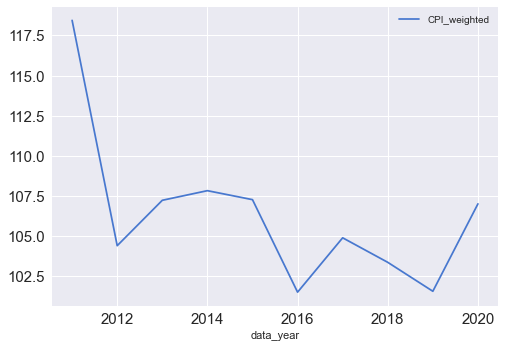

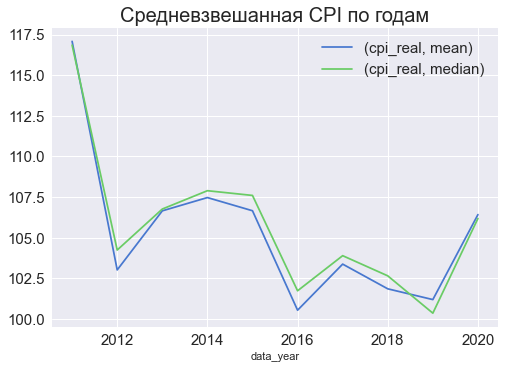

In [69]:
plt.style.use('seaborn-muted')
plt.figure(figsize=(18,5))
params = {'axes.titlesize':'20',
          'xtick.labelsize':'15',
          'ytick.labelsize':'15',
        }
plt.rcParams.update(params)


data_by_year=all_poverty_data.groupby('data_year').agg({'cpi_exp':'sum', 'expfact':'sum'})
data_by_year['CPI_weighted']=data_by_year.cpi_exp/data_by_year.expfact
data_by_year.reset_index().plot(x='data_year', y='CPI_weighted')

all_poverty_data.groupby('data_year').agg({'cpi_real':['mean','median']}).plot()

plt.title('Средневзвешанная CPI по годам')
plt.legend(fontsize=15)

None


In [70]:
all_poverty_data.groupby('data_year', as_index=False)\
                .agg({'hh_code': pd.Series.nunique})\
                .rename(columns={'hh_code':'num_of_households'})

pd.set_option('display.float_format', lambda x: '%.3f' % x)#

In [71]:
#Распределение женщин и мужчин 
population_gender = all_poverty_data[all_poverty_data.data_year==2020].groupby('gender', as_index=False)\
                                    .agg({'expfact': 'sum'})\
                                    .rename(columns={'expfact':'number'})

population_gender['percentage'] = (population_gender.number/population_gender.number.sum()*100).round(2)
population_gender


gender      number  percentage
0  Женский 3492788.575      52.630
1  Мужской 3144014.425      47.370

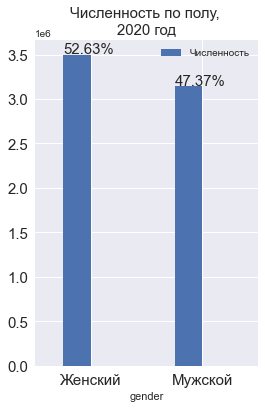

In [72]:
#Распределение женщин и мужчин
plt.style.use('seaborn')

# all_poverty_data.groupby('gender')['hh_code'].count().plot(kind='bar',figsize=(6,6))
population_gender.plot( 'gender', kind='bar',figsize=(4,6))
# all_poverty_data.groupby('gender')['expfact'].sum().plot(kind='bar',figsize=(6,6))

female_perc = f"{population_gender['percentage'][0]}%"
male_perc = f"{population_gender['percentage'][1]}%"
plt.text(-0.25, 3520000.5, female_perc, fontsize=(15))
plt.text(0.75, 3160000.5, male_perc, fontsize=(15))
         

plt.title('Численность по полу, \n2020 год',fontsize=15)
plt.xticks( rotation=0, fontsize=(15))
plt.yticks( fontsize=(15))
plt.legend(['Численность'])

plt.grid(True)




plt.show()

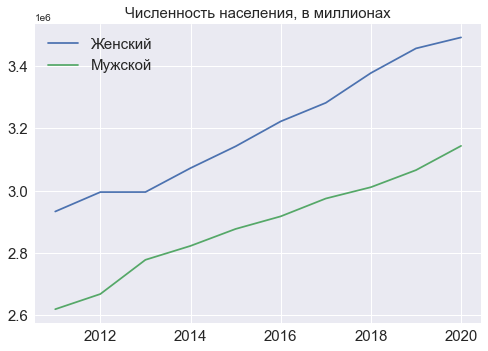

In [73]:
population_gender = all_poverty_data.groupby(['data_year','gender'], as_index=False)\
                                    .agg({'expfact': 'sum'})\
                                    .rename(columns={'expfact':'number'})
years=population_gender.data_year.unique()


plt.plot(years, population_gender[population_gender.gender=='Женский'].number, label='Женский')
plt.plot(years, population_gender[population_gender.gender=='Мужской'].number, label='Мужской')
plt.legend(fontsize=(15))
plt.yticks(fontsize=(15))
plt.xticks(fontsize=(15))
plt.title('Численность населения, в миллионах', fontsize=(15))
None


Распределение по полу и местности.видно в городах преобладает женское население намного выше чем в селах

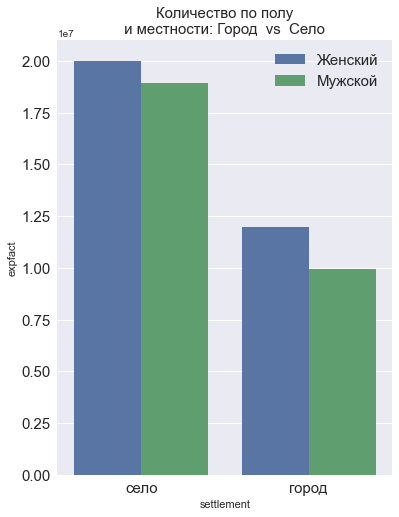

In [74]:
# plt.style.use('tableau-colorblind10')

plt.figure( figsize=(6,8)) 


# sns.set(font_scale=1)

sns.barplot(x='settlement', y='expfact', hue='gender', estimator=sum, data=all_poverty_data, ci=None)
plt.title('Количество по полу\n и местности: Город  vs  Село ', fontsize=15)

plt.xticks( fontsize=(15))
plt.yticks( fontsize=(15))

plt.legend(loc='upper right', ncol=1,fontsize=(15)) 



plt.show() 

In [75]:
#Распределение женщин и мужчин 2020

population_settl = all_poverty_data[all_poverty_data.data_year==2020].groupby('settlement', as_index=False)\
                                    .agg({'expfact': 'sum'})\
                                    .rename(columns={'expfact':'number'})\
                                    .set_index('settlement')

population_settl['percentage'] = (population_settl.number/population_settl.number.sum()*100).round(2)
                                
population_settl

number  percentage
settlement                        
город      2409291.016      36.300
село       4227511.984      63.700

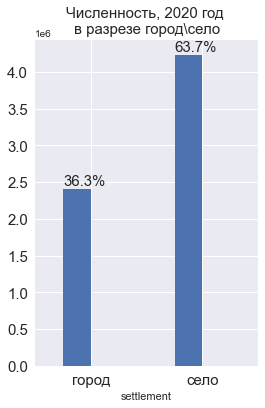

In [76]:
#Распределение женщин и мужчин
plt.style.use('seaborn')

population_settl.plot(kind='bar',figsize=(4,6), legend=False)


female_perc = f"{population_settl['percentage'][0]}%"
male_perc = f"{population_settl['percentage'][1]}%"
plt.text(-0.25, 2459291, female_perc, fontsize=(15), )
plt.text(0.75, 4277512, male_perc, fontsize=(15),)
         

plt.title('Численность, 2020 год \nв разрезе город\село',fontsize=15)
plt.xticks(rotation=0, fontsize=(15))
plt.yticks( fontsize=(15))
# plt.legend()

plt.grid(True)


plt.show()

In [77]:

population_settl

number  percentage
settlement                        
город      2409291.016      36.300
село       4227511.984      63.700

data_year settlement      number
0        2011      город 2070055.504
1        2011       село 3481832.496
2        2012      город 2075478.354
3        2012       село 3587654.646
4        2013      город 2045383.158
5        2013       село 3727834.842
6        2014      город 2128028.242
7        2014       село 3767033.758
8        2015      город 2130738.759
9        2015       село 3888741.241
10       2016      город 2175866.564
11       2016       село 3964333.436
12       2017      город 2222505.985
13       2017       село 4034708.491
14       2018      город 2283642.527
15       2018       село 4105857.473
16       2019      город 2344632.934
17       2019       село 4178896.066
18       2020      город 2409291.016
19       2020       село 4227511.984

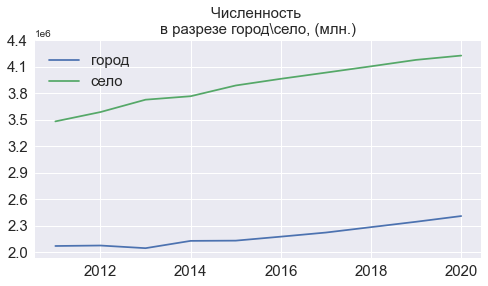

In [78]:
population_settl = all_poverty_data.groupby(['data_year','settlement'], as_index=False)\
                                    .agg({'expfact': 'sum'})\
                                    .rename(columns={'expfact':'number'})
#                                     .set_index('settlement')
years=population_settl.data_year.unique()

plt.figure(figsize=(8,4))
plt.plot(years, population_settl[population_settl.settlement=='город'].number, label='город')
plt.plot(years, population_settl[population_settl.settlement=='село'].number, label='село')
plt.legend(fontsize=(15))
plt.yticks(ticks=range(2000000,4600000,300000),fontsize=(15))
plt.xticks(fontsize=(15))
plt.title('Численность \nв разрезе город\село, (млн.)', fontsize=(15))
None

population_settl

In [79]:
# Добавим столбец с коротким названием области
all_poverty_data['oblast_short']=all_poverty_data['oblast'].str[:3]

In [80]:
all_poverty_data.columns

Index(['hh_code', 'kvartal', 'mon', 'c1', 'gender', 'relative', 'age',
       'merital_st', 'education', 'settlement', 'oblast', 'obl_reg', 'kv',
       'expfact', 'weight', 'pcc', 'pccf', 'pline_dc', 'f_linec', 'CPI',
       'pccddc', 'cpsc', 'fpsc', 'pgc', 'p2c', 'fpgc', 'fp2c', 'pccserv',
       'pccnf', 'pccdur', 'incpcd', 'data_year', 'cpi_real', 'cpi_exp',
       'oblast_short'],
      dtype='object')

In [81]:
all_poverty_data.oblast_short.unique()

array(['Исс', 'Джа', 'Нар', 'Бат', 'Ошс', 'Тал', 'Чуй', 'Биш', 'Ош'],
      dtype=object)

In [82]:
all_poverty_data.oblast.unique()

array(['Иссык-Кульская', 'Джалал-Абадская', 'Нарынская', 'Баткенская',
       'Ошская', 'Таласская', 'Чуйская', 'Бишкек', 'Ош'], dtype=object)

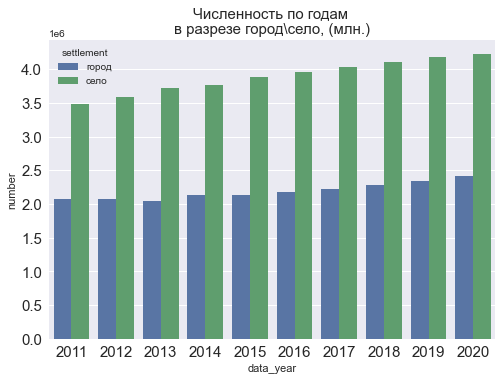

In [83]:
population_settl = all_poverty_data.groupby(['data_year','settlement'], as_index=False)\
                                    .agg({'expfact': 'sum'})\
                                    .rename(columns={'expfact':'number'})

sns.barplot(x='data_year', y='number', hue='settlement', data=population_settl)
plt.xticks(fontsize=(15))
plt.yticks(fontsize=(15))
plt.title('Численность по годам \nв разрезе город\село, (млн.)', fontsize=(15))
None

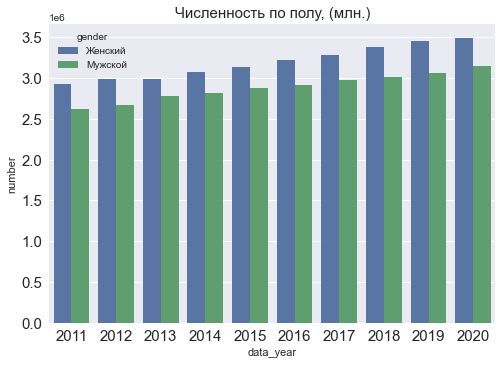

In [84]:
population_settl = all_poverty_data.groupby(['data_year','gender'], as_index=False)\
                                    .agg({'expfact': 'sum'})\
                                    .rename(columns={'expfact':'number'})

sns.barplot(x='data_year', y='number', hue='gender', data=population_settl)
plt.xticks(fontsize=(15))
plt.yticks(fontsize=(15))
plt.title('Численность по полу, (млн.)', fontsize=(15))
None

In [85]:
# Добавим еще один категориальный параметр age_range  в зависимости от возраста

def age_range(age):
    if age in range(0,6):
        return '0-6'
    if age in range(6,19):
        return '6-18'
    if age in range(18,61):
        return '18-61'
    if age in range(61,76):
        return '61-110'

all_poverty_data['age_range']=all_poverty_data['age'].apply(age_range)
all_poverty_data[all_poverty_data['age_range'].isna()]


hh_code  kvartal   mon    c1   gender   relative    age  \
186    20051.000    1.000 2.000 1.000  Мужской      Глава 78.000   
211    20061.000    1.000 3.000 1.000  Мужской      Глава 88.000   
212    20061.000    1.000 3.000 2.000  Женский   Муж/жена 83.000   
298    20084.000    1.000 2.000 3.000  Женский  Отец/мать 86.000   
307    20086.000    1.000 2.000 1.000  Женский      Глава 86.000   
...          ...      ...   ...   ...      ...        ...    ...   
18433 112066.000    1.000 2.000 1.000  Женский      Глава 79.000   
18444 112072.000    1.000 1.000 1.000  Мужской      Глава 87.000   
18445 112072.000    1.000 1.000 2.000  Женский   Муж/жена 90.000   
18446 112073.000    1.000 1.000 1.000  Женский      Глава 80.000   
18456 112078.000    1.000 3.000 1.000  Женский      Глава 85.000   

                               merital_st                          education  \
186    Состоит в зарегистрированном браке  Основное общее (неполное среднее)   
211    Состоит в зарегистрированном браке                        Неграмотный   
212    Состоит в зарегистрированном браке                        Неграмотный   
298                         Вдовец /вдова                          Начальное   
307                         Вдовец /вдова        Нет  начального образования   
...                                   ...                                ...   
18433                       Вдовец /вдова           Среднее профессиональное   
18444  Состоит в зарегистрированном браке             Среднее (полное) общее   
18445  Состоит в зарегистрированном браке             Среднее (полное) общее   
18446                       Вдовец /вдова                          Начальное   
18456                       Вдовец /вдова  Основное общее (неполное среднее)   

      settlement  ...  fp2c   pccserv     pccnf   pccdur  incpcd  data_year  \
186         село  ... 0.000  6006.333 11379.333  532.824 136.172       2015   
211         село  ... 0.000  1774.500  6855.000  700.440 377.167       2015   
212         село  ... 0.000  1774.500  6855.000  700.440 377.167       2015   
298         село  ... 0.000  3516.800  4310.800  400.688  90.319       2015   
307         село  ... 0.000  4785.667 10626.833 1146.428 175.757       2015   
...          ...  ...   ...       ...       ...      ...     ...        ...   
18433      город  ... 0.000 13391.750  1996.500 1431.354 372.222       2012   
18444      город  ... 0.000  6098.000   827.500   28.802 146.617       2012   
18445      город  ... 0.000  6098.000   827.500   28.802 146.617       2012   
18446      город  ... 0.000  7179.000  7141.000  485.061 128.835       2012   
18456      город  ... 0.000  2707.000    85.000    0.000  89.415       2012   

       cpi_real   cpi_exp  oblast_short  age_range  
186     101.263 29330.063           Исс       None  
211     101.263 25186.798           Исс       None  
212     101.263 25186.798           Исс       None  
298     101.263 29605.432           Исс       None  
307     101.263 28348.323           Исс       None  
...         ...       ...           ...        ...  
18433   104.889 53765.082           Биш       None  
18444   104.889 11553.665           Биш       None  
18445   104.889 11553.665           Биш       None  
18446   104.889 11648.672           Биш       None  
18456   104.889 11648.672           Биш       None  

[5173 rows x 36 columns]

In [86]:
ord=all_poverty_data.groupby('age_range').agg({'expfact': 'sum'}).sort_values(by='expfact')[::-1]
ord

expfact
age_range             
18-61     31049557.299
6-18      16407539.660
0-6        8040498.879
61-110     4047847.387

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


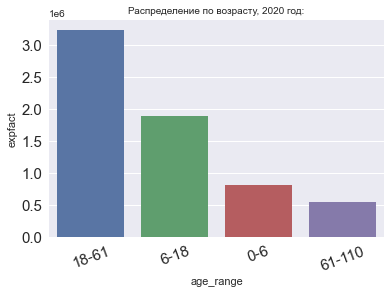

In [87]:
plt.style.use('seaborn')

plt.figure(figsize=(6,4))
sns.barplot(x='age_range',y='expfact', data=all_poverty_data[all_poverty_data.data_year==2020],
            estimator=sum, order = ord.index, ci=False)
             
plt.title('Распределение по возрасту, 2020 год:', fontsize=10)
plt.xticks(fontsize=(15),rotation=20)
plt.yticks(fontsize=(15))
plt.legend(fontsize=(15))

plt.show() 



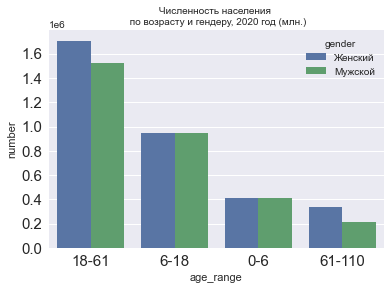

In [88]:

plt.figure(figsize=(6,4))

Bish_pop = all_poverty_data[all_poverty_data.data_year==2020].groupby(['age_range','gender'], as_index=False)\
                                    .agg({'expfact': 'sum'})\
                                    .rename(columns={'expfact':'number'})

sns.barplot(x='age_range', y='number', hue='gender', data=Bish_pop,order = ord.index )
plt.xticks(fontsize=(15))
plt.yticks(fontsize=(15))
plt.title('Численность населения \n по возрасту и гендеру, 2020 год (млн.)', fontsize=(10))
None

In [89]:
all_poverty_data.expfact.sum()

60850027.47647059

<h6> В Чуйской области и городе Бишкек большая разницу по количеству по половому признаку</h6>
Рассмотрим детальнее CPI по такой классификации, связано ли это с бедностью
<br>

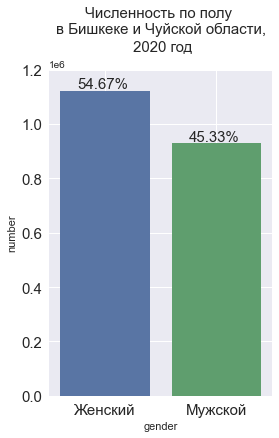

In [90]:
#Распределение женщин и мужчин в Бишкеке и Чуйской области

from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 

plt.figure(figsize=(4,6))
population_gender = all_poverty_data[(all_poverty_data.data_year==2020)&
                                     (all_poverty_data.oblast.isin(['Бишкек','Чуйская']))]\
                                    .groupby('gender', as_index=False)\
                                    .agg({'expfact':'sum'})\
                                    .rename(columns={'expfact':'number'})


population_gender['percentage'] = (population_gender.number/population_gender.number.sum()*100).round(2)
population_gender

sns.barplot(x='gender', y='number', data=population_gender,)

female_perc = f"{population_gender['percentage'][0]}%"
male_perc = f"{population_gender['percentage'][1]}%"
plt.text(-0.25, 1130710.5, female_perc, fontsize=(15))
plt.text(0.75, 939084.9, male_perc, fontsize=(15))

plt.yticks(np.arange(0,1400000,200000.2))
         

plt.title('Численность по полу \nв Бишкеке и Чуйской области,\n 2020 год',fontsize=15)
plt.xticks(rotation=0, fontsize=(15))
plt.yticks( fontsize=(15))

plt.grid(True)

None

In [91]:
population_gender

gender      number  percentage
0  Женский 1120710.020      54.670
1  Мужской  929084.966      45.330

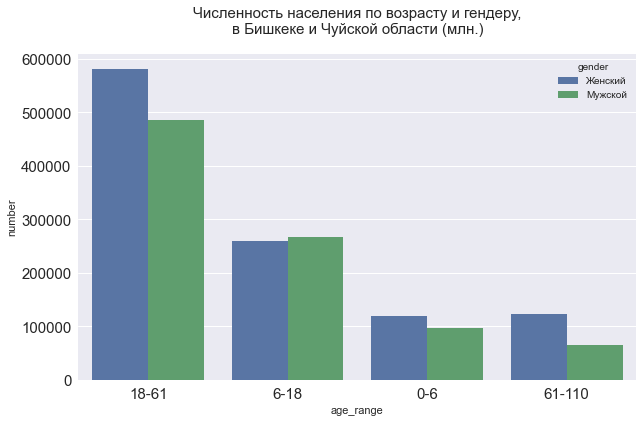

In [92]:
plt.figure(figsize=(10,6))

plt.style.use('seaborn')

bish_filt=(all_poverty_data.data_year==2020)&(all_poverty_data.oblast.isin(['Бишкек','Чуйская']))
ord=all_poverty_data[bish_filt].groupby('age_range').agg({'expfact': 'sum'}).sort_values(by='expfact')[::-1]


Bish_pop = all_poverty_data[bish_filt].groupby(['age_range','gender'], as_index=False)\
                                    .agg({'expfact': 'sum'})\
                                    .rename(columns={'expfact':'number'})
Bish_pop
sns.barplot(x='age_range', y='number', hue='gender', data=Bish_pop,order = ord.index, )
plt.xticks(fontsize=(15))
plt.yticks(fontsize=(15))
plt.title('Численность населения по возрасту и гендеру,\nв Бишкеке и Чуйской области (млн.)', fontsize=(15))
None

In [93]:
all_poverty_data[all_poverty_data.data_year==2020].groupby(['age_range','gender'], as_index=False)\
                                    .agg({'expfact': 'sum'})\
                                    .rename(columns={'expfact':'number'})

age_range   gender      number
0       0-6  Женский  407771.134
1       0-6  Мужской  411515.682
2     18-61  Женский 1707257.832
3     18-61  Мужской 1525474.952
4      6-18  Женский  946955.282
5      6-18  Мужской  948770.246
6    61-110  Женский  336490.074
7    61-110  Мужской  209758.286

Рассмотрим типы данных Датафрейма <br>
Некоторые параметры, если даже они данные числового типа, не несут в себе числовое значение,это:<br>
['hh_code','kvartal','mon','data_year']<br>

В этом мы убеждались выше <br>



In [94]:
#разделим все колонки по типу данных на категориальные и количественные

num_cols=[]
cat_cols=[]
for col in all_poverty_data.columns:
    if all_poverty_data[col].dtypes in [int,float]:
        #за исключением, тех колонок, которые не несут в себе числовое значение
        if col not in ['hh_code','kvartal','mon','data_year']:
            num_cols.append(col)
    else:
        cat_cols.append(col)

print(f'кол-во числовых параметров: {len(cat_cols)}')
print(f'кол-во числовых параметров: {len(num_cols)}')
print(num_cols)


кол-во числовых параметров: 10
кол-во числовых параметров: 23
['c1', 'age', 'kv', 'expfact', 'weight', 'pcc', 'pccf', 'pline_dc', 'f_linec', 'CPI', 'pccddc', 'cpsc', 'fpsc', 'pgc', 'p2c', 'fpgc', 'fp2c', 'pccserv', 'pccnf', 'pccdur', 'incpcd', 'cpi_real', 'cpi_exp']


<b>Boxplots числовых данных </b> </br>
CPI,pline_dc,f_linec, age заслуживают внимания

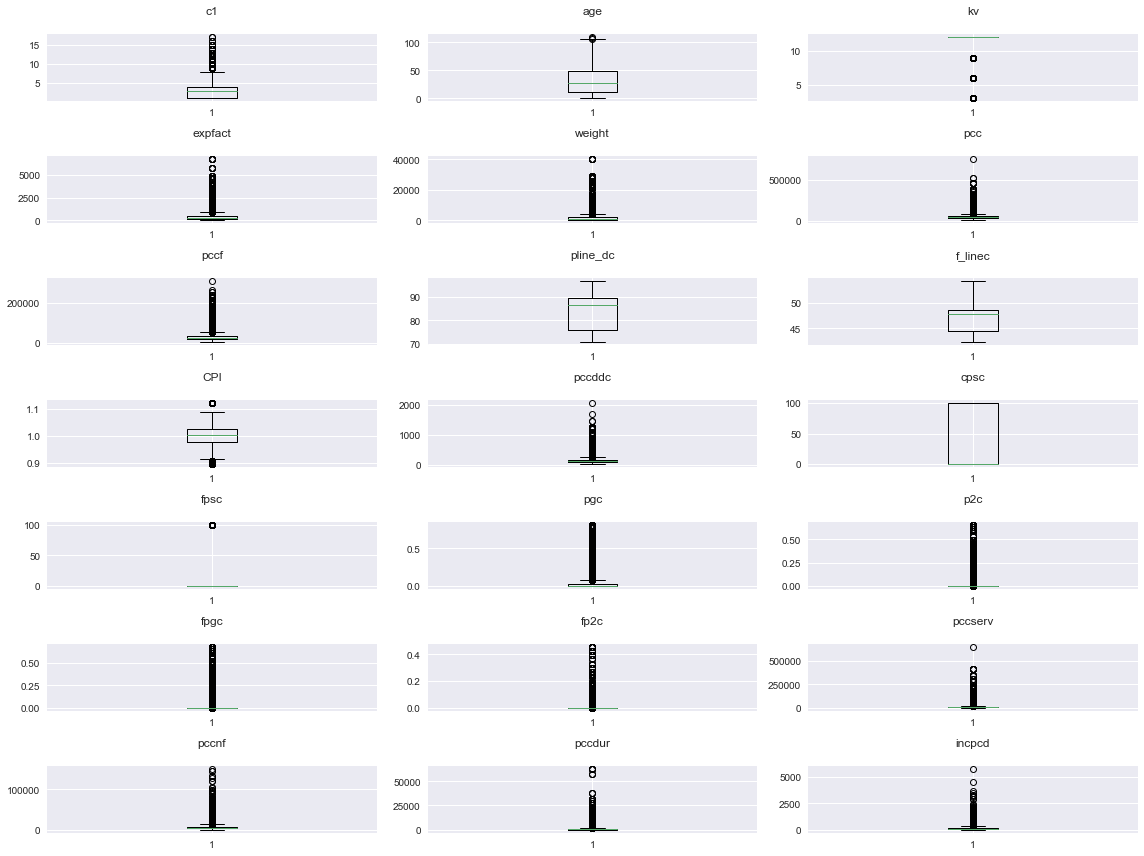

In [95]:
fig, axes=plt.subplots(7,3, figsize=(16,12))
n=-1
for i in range(7):
    for j in range(3):
        n+=1
        if n==22:
            break
        else:
            axes[i][j].boxplot(all_poverty_data[num_cols[n]])
            axes[i][j].set_title(num_cols[n])
        
fig.tight_layout()
plt.show()

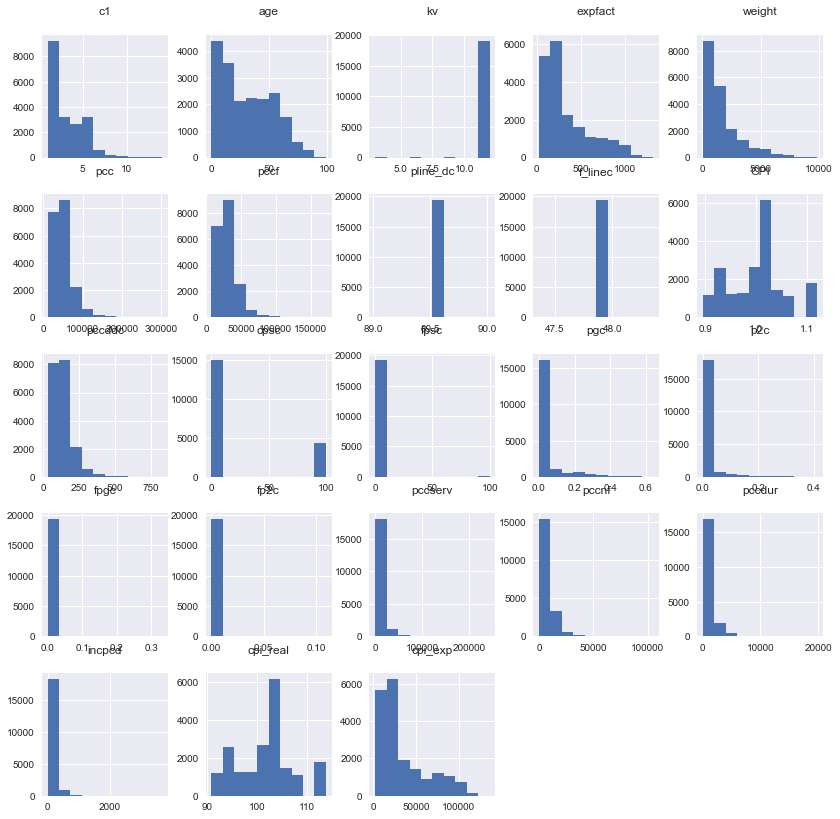

In [96]:
#гистограммы по каждому параметру датасет
all_poverty_data[all_poverty_data.data_year==2018].hist(column=num_cols,figsize=(14,14))
None

<h5> Рассмотрим данный показатель cpsc <--Complete poverty status в разрезе областей </h5>

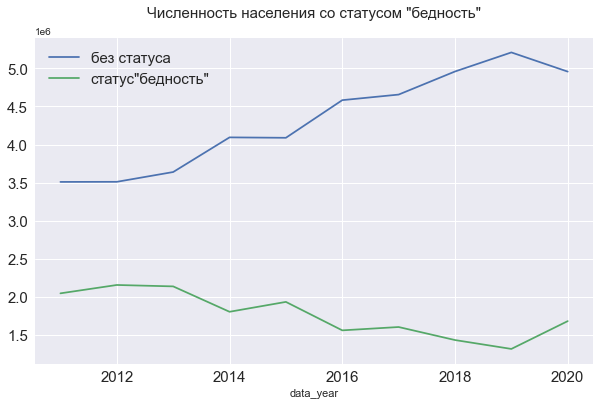

In [97]:
cpsc_by_year = all_poverty_data[['data_year','cpsc','cpi_real','expfact']].groupby(['data_year','cpsc']).expfact.sum()
#                 
cpsc_by_year.reset_index().pivot_table(index=['data_year'], columns='cpsc',
                                      values='expfact').plot(
               figsize=(10,6),
                title='Численность населения со статусом "бедность"',
                grid=True,
                
                )

plt.legend(['без статуса','статус"бедность"',], fontsize=15)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Численность населения со статусом "бедность"',fontsize=15)
None

In [98]:
cpsc_by_year

data_year  cpsc   
2011       0.000     3508298.252
           100.000   2043589.748
2012       0.000     3509655.220
           100.000   2153477.780
2013       0.000     3638277.550
           100.000   2134940.450
2014       0.000     4093869.102
           100.000   1801192.898
2015       0.000     4088413.450
           100.000   1931066.550
2016       0.000     4583192.002
           100.000   1557007.998
2017       0.000     4656445.001
           100.000   1600769.475
2018       0.000     4959878.796
           100.000   1429621.204
2019       0.000     5210721.076
           100.000   1312807.924
2020       0.000     4958538.103
           100.000   1678264.897
Name: expfact, dtype: float64

In [99]:
cpsc_by_year

data_year  cpsc   
2011       0.000     3508298.252
           100.000   2043589.748
2012       0.000     3509655.220
           100.000   2153477.780
2013       0.000     3638277.550
           100.000   2134940.450
2014       0.000     4093869.102
           100.000   1801192.898
2015       0.000     4088413.450
           100.000   1931066.550
2016       0.000     4583192.002
           100.000   1557007.998
2017       0.000     4656445.001
           100.000   1600769.475
2018       0.000     4959878.796
           100.000   1429621.204
2019       0.000     5210721.076
           100.000   1312807.924
2020       0.000     4958538.103
           100.000   1678264.897
Name: expfact, dtype: float64

In [100]:
# no need

sorted_data=all_poverty_data[all_poverty_data.oblast_short=='Биш'].sort_values(by=['data_year'])
s=sorted_data.groupby('data_year')['cpsc'].value_counts(normalize=True)\
                                            .rename('percentage').mul(100).reset_index()\

s

data_year    cpsc  percentage
0        2011   0.000      82.833
1        2011 100.000      17.167
2        2012   0.000      79.760
3        2012 100.000      20.240
4        2013   0.000      80.633
5        2013 100.000      19.367
6        2014   0.000      83.919
7        2014 100.000      16.081
8        2015   0.000      78.340
9        2015 100.000      21.660
10       2016   0.000      91.009
11       2016 100.000       8.991
12       2017   0.000      85.628
13       2017 100.000      14.372
14       2018   0.000      85.730
15       2018 100.000      14.270
16       2019   0.000      89.382
17       2019 100.000      10.618
18       2020   0.000      85.267
19       2020 100.000      14.733

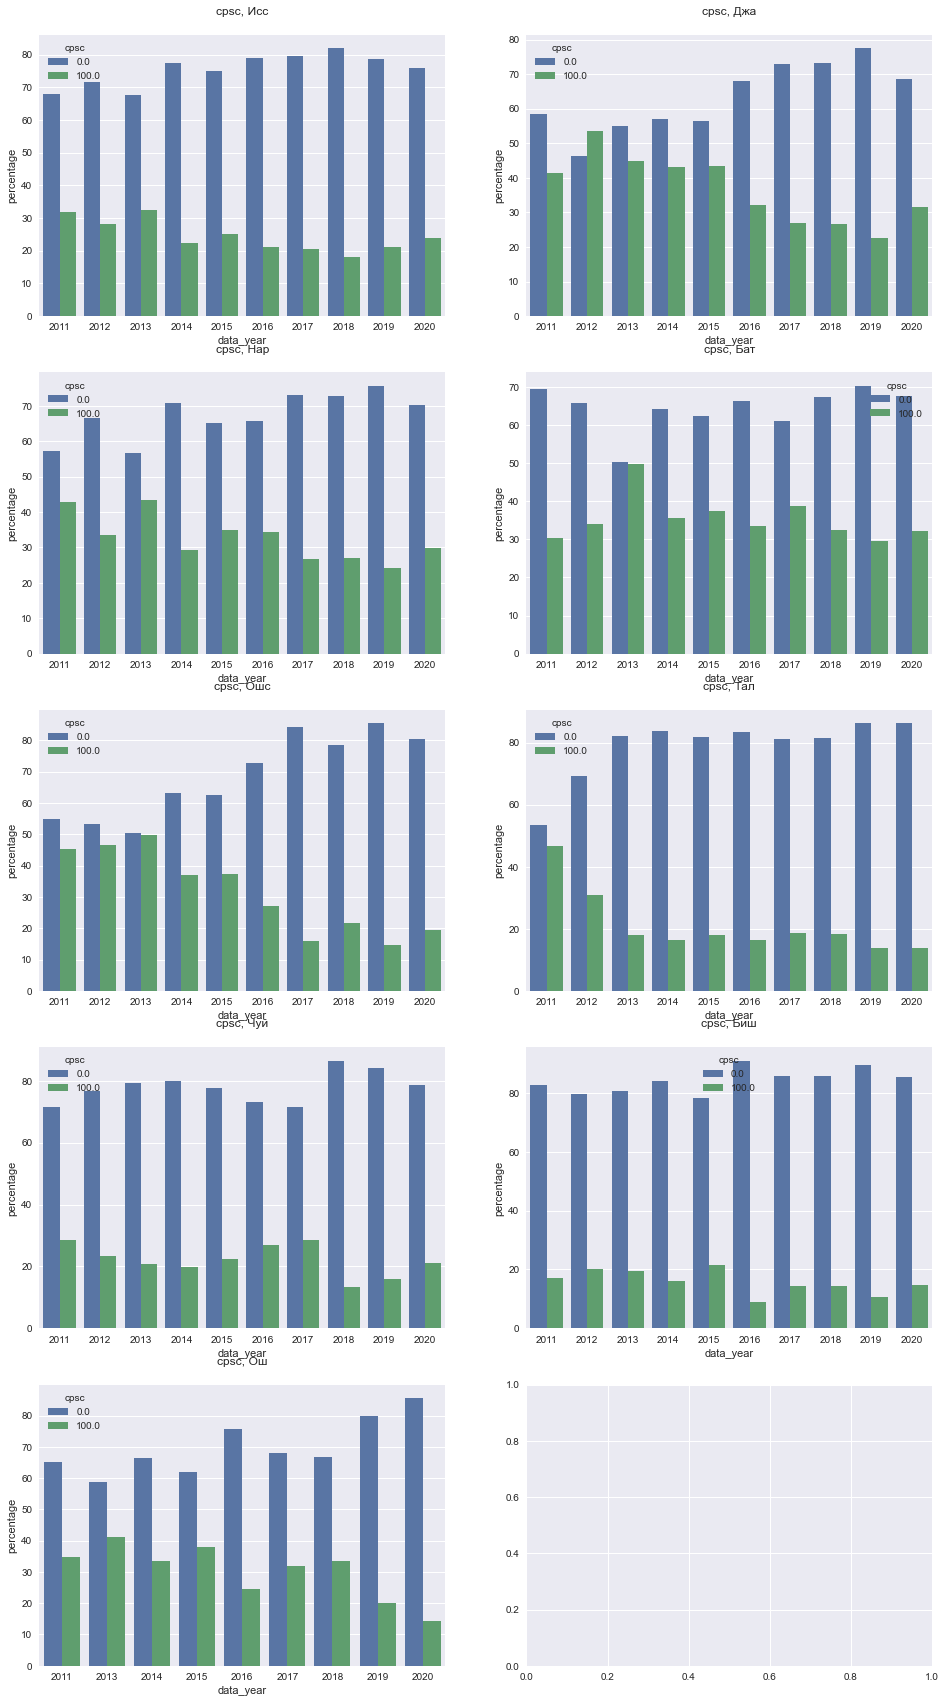

In [101]:
all=all_poverty_data

fig, axes=plt.subplots(5,2, figsize=(16,30))

oblast_list=list(all.oblast_short.unique())

n=0
for i in range(5):
    for j in range(2):
        filt=(all['oblast_short']==oblast_list[n])
        
        sorted_data=all_poverty_data[filt].sort_values(by=['data_year'])
        s=sorted_data.groupby('data_year')['cpsc'].value_counts(normalize=True)\
                                                .rename('percentage').mul(100).reset_index()
        sns.barplot(x='data_year', y='percentage', hue='cpsc', data=s,ax=axes[i][j])

        axes[i][j].set_title(f'cpsc, {oblast_list[n]}')
#         axes[i][j].legend(fontsize=15)
        
        n+=1
        if n==9:
            break



plt.show()

Вывод: 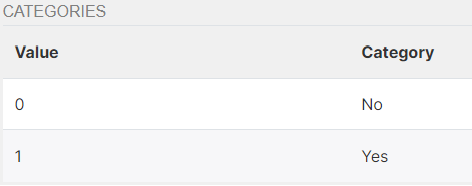
Статус бедности низкий в Бишкеке,Чуйской и Таласской области. В Баткене самые высокие показатели

In [102]:
all_poverty_data.sort_values(by=['data_year'])

hh_code  kvartal   mon    c1   gender       relative    age  \
9272  51023.000    1.000 3.000 4.000  Женский   Внук /внучка 18.000   
12368 70341.000    1.000 2.000 1.000  Мужской          Глава 55.000   
12367 70340.000    1.000 2.000 3.000  Женский  Зять/невестка 27.000   
12366 70340.000    1.000 2.000 2.000  Мужской       Сын/дочь 35.000   
12365 70340.000    1.000 2.000 1.000  Женский          Глава 73.000   
...         ...      ...   ...   ...      ...            ...    ...   
6343  40568.000      NaN   NaN 6.000  Женский   Внук /внучка 10.000   
6342  40568.000      NaN   NaN 5.000  Мужской   Внук /внучка 13.000   
6341  40568.000      NaN   NaN 4.000  Женский  Зять/невестка 39.000   
6339  40568.000      NaN   NaN 2.000  Женский       Муж/жена 69.000   
9507  60072.000      NaN   NaN 4.000  Женский   Внук /внучка 12.000   

                               merital_st                          education  \
9272       Никогда не состоял (а) в браке  Основное общее (неполное среднее)   
12368  Состоит в зарегистрированном браке             Среднее (полное) общее   
12367  Состоит в зарегистрированном браке             Среднее (полное) общее   
12366  Состоит в зарегистрированном браке             Среднее (полное) общее   
12365                       Вдовец /вдова                          Начальное   
...                                   ...                                ...   
6343                            До 14 лет        Нет  начального образования   
6342                            До 14 лет                          Начальное   
6341   Состоит в зарегистрированном браке               Незаконченное высшее   
6339   Состоит в зарегистрированном браке           Среднее профессиональное   
9507                            До 14 лет                          Начальное   

      settlement  ...  fp2c   pccserv    pccnf  pccdur  incpcd  data_year  \
9272       город  ... 0.000  7745.000 3299.000 363.138  79.246       2011   
12368       село  ... 0.000 19972.333 4466.167 386.923  62.569       2011   
12367       село  ... 0.000  3350.667 5800.667  66.043  82.796       2011   
12366       село  ... 0.000  3350.667 5800.667  66.043  82.796       2011   
12365       село  ... 0.000  3350.667 5800.667  66.043  82.796       2011   
...          ...  ...   ...       ...      ...     ...     ...        ...   
6343        село  ... 0.000  6702.143 4062.857 832.811 179.373       2020   
6342        село  ... 0.000  6702.143 4062.857 832.811 179.373       2020   
6341        село  ... 0.000  6702.143 4062.857 832.811 179.373       2020   
6339        село  ... 0.000  6702.143 4062.857 832.811 179.373       2020   
9507       город  ... 0.000  6391.667 3518.333 112.500 113.115       2020   

       cpi_real   cpi_exp  oblast_short  age_range  
9272    120.922 11801.269           Бат       6-18  
12368   112.334 34197.532           Тал      18-61  
12367   112.334 27261.168           Тал      18-61  
12366   112.334 27261.168           Тал      18-61  
12365   112.334 27261.168           Тал     61-110  
...         ...       ...           ...        ...  
6343    104.247 17833.258           Нар       6-18  
6342    104.247 17833.258           Нар       6-18  
6341    104.247 17833.258           Нар      18-61  
6339    104.247 17833.258           Нар     61-110  
9507    110.784  9702.804           Ошс       6-18  

[191623 rows x 36 columns]

In [104]:
# all_poverty_data.head()

# from pathlib import Path  

# filepath = Path(r'E:\Desktop\DL\statistics\stat_python\mydata.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# all_poverty_data.to_csv(filepath)  

In [538]:
all_poverty_data.cpi_real.value_counts().reset_index()
None

6.095139242441144

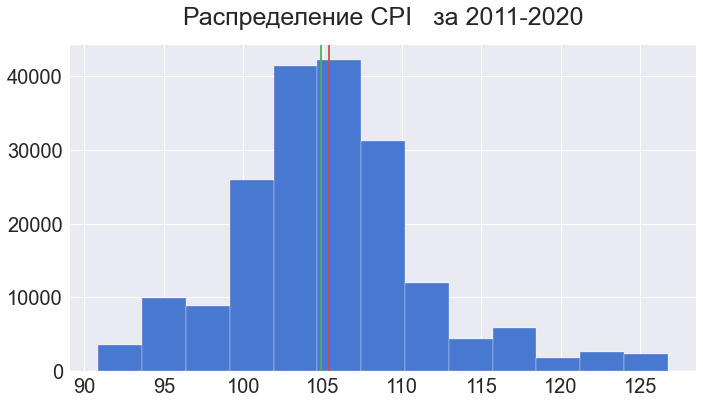

In [539]:
# Распределение параметра CPI
import matplotlib.pyplot as plt

plt.style.use('seaborn-muted')
plt.figure(figsize=(18,5))
params = {'axes.titlesize':'25',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20',
        }
plt.rcParams.update(params)

mean=all_poverty_data.cpi_real.mean()
median=all_poverty_data.cpi_real.median()

plt.axvline(mean, color='r')
plt.axvline(median, color='g')

all_poverty_data['cpi_real'].hist(edgecolor='white',figsize=(10,6), bins=13)
plt.title('Распределение CPI   за 2011-2020')


None
all_poverty_data['cpi_real'].std()
# plt.savefig('CPI.dist.jpeg')

6.095139242441144

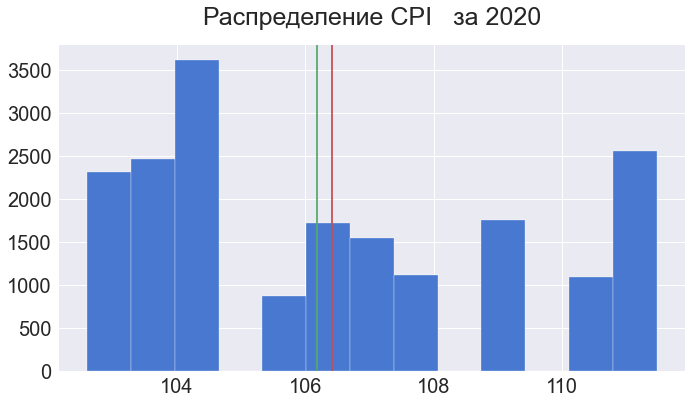

In [540]:
# Распределение параметра CPI 2020
import matplotlib.pyplot as plt

plt.style.use('seaborn-muted')
plt.figure(figsize=(18,5))
params = {'axes.titlesize':'25',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20',
        }
plt.rcParams.update(params)

mean=all_poverty_data[all_poverty_data.data_year==2020].cpi_real.mean()
median=all_poverty_data[all_poverty_data.data_year==2020].cpi_real.median()

plt.axvline(mean, color='r')
plt.axvline(median, color='g')

all_poverty_data[all_poverty_data.data_year==2020]['cpi_real'].hist(edgecolor='white',figsize=(10,6), bins=13)
plt.title('Распределение CPI   за 2020')


None
all_poverty_data['cpi_real'].std()
# plt.savefig('CPI.dist.jpeg')

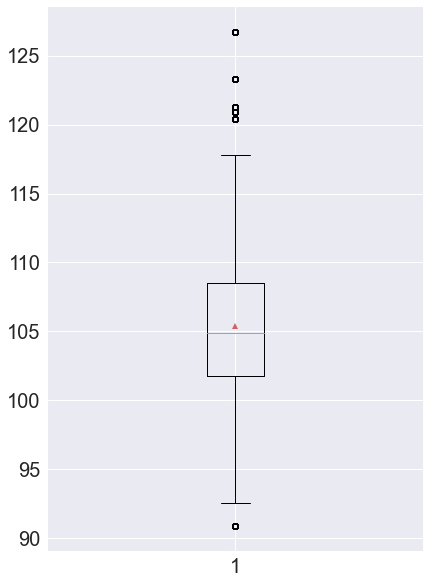

In [541]:
plt.figure(figsize=(6,10))
plt.boxplot(all_poverty_data['cpi_real'], showmeans=True, )

None

Распределение параметра CPI по годам 

In [542]:
all_poverty_data[all_poverty_data.oblast_short=='Исс'].groupby('data_year').cpi_real.median()
# all_poverty_data.columns



data_year
2011   107.805
2012    94.060
2013   103.231
2014   101.687
2015   101.263
2016    94.225
2017    94.632
2018    94.079
2019   100.051
2020   103.829
Name: cpi_real, dtype: float64

In [543]:
all_poverty_data.groupby('data_year')['cpi_real'].value_counts()

data_year  cpi_real
2011       126.732     2266
           121.291     1494
           115.115     1438
           117.819     1422
           107.805     1293
                       ... 
2020       110.784     1090
           104.055      960
           106.180      917
           105.869      871
           106.420      804
Name: cpi_real, Length: 158, dtype: int64

In [544]:
# #Добавим столбец с коротким названием области 
# all_poverty_data['oblast_short'] = all_poverty_data['oblast'].str[0:3]

# # #Группируем данные для получения численности населения по региону 
# oblast_num = all_poverty_data\
#             .groupby(['oblast_short'],as_index=False)\
#             .agg({'gender':'count'})\
#             .rename(columns={'gender':'population_oblast'})

# # #Группируем данные для получения численности населения по региону и половому признаку
# oblast_gender_num = all_poverty_data\
#             .groupby(['oblast_short','gender'],as_index=False)\
#             .agg({'hh_code':'count'})\
#             .rename(columns={'hh_code':'number'})

# # #Соединим таблицы oblast_gender_num,oblast_num
# oblast_gender_num_result = pd.merge(oblast_gender_num, oblast_num, on='oblast_short')\
#                                 .sort_values(['population_oblast','gender'], ascending=False)

# oblast_gender_num_result['population_%'] = (oblast_gender_num_result.number/
#                                             oblast_gender_num_result.population_oblast*100).round(2)

# oblast_gender_num_result

In [545]:
# plt.figure(figsize=(12,5))

# # plt.style.use('tableau-colorblind10')
# plt.style.use('default')

# male = oblast_gender_num_result[
#     oblast_gender_num_result.gender=='Мужской'
#     ].number

# female = oblast_gender_num_result[
#     oblast_gender_num_result.gender=='Женский'
#     ].number

# oblast_list = oblast_gender_num_result['oblast_short'].unique()
# rng = np.arange(len(oblast_list))
# width = 0.35 
# p1 = plt.bar(rng, male, width)
# p2 = plt.bar(rng, female,  width,bottom=male)

# plt.title('Численность населения по областям и по полу',fontsize=20)
# plt.xticks(rng, oblast_gender_num_result['oblast_short'].unique(),fontsize=14)
# plt.yticks(np.arange(0,30000,2000))
# plt.legend((p1[0], p2[0]), ('Мужской', 'Женский'),fontsize=15)
# plt.grid(True)

# plt.show()
# plt.savefig('oblast_gender.jpeg')


In [546]:
# # "Средняя и медиана для 'CPI' по региону"

# plt.figure(figsize=(10,5))

# oblast_grp = all_poverty_data.groupby(['oblast_short'])
# n = 9
# rng = np.arange(n)

# meanmedian = oblast_grp.cpi_real.agg(['mean','median'])\
#             .sort_values(by='mean', ascending=False)\
#             .reset_index()

# plt.bar(rng-0.2, meanmedian['mean'], width=0.4, label='mean', ) #color='royalblue'
# plt.bar(rng+0.2, meanmedian['median'], width=0.4, label='median', )

# yticks=np.arange(0.0,130,10)


# plt.title('Средняя и медиана для CPI по региону',fontsize=28)
# plt.xticks(rng, meanmedian['oblast_short'].unique(),fontsize=20)
# plt.yticks(yticks, fontsize=15)
# plt.grid(which='minor', alpha=0.9)
# plt.grid(True)
# plt.legend(fontsize=20,loc=3,bbox_to_anchor=(1., .5))
# # plt.yticks(np.arange(0,1.5, 20))



# plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'В возрасте от 0 до 5 лет включительно'),
  Text(1, 0, 'Высшее'),
  Text(2, 0, 'Начальное'),
  Text(3, 0, 'Начальное профессиональное без получениея среднего образования'),
  Text(4, 0, 'Начальное профессиональное с получением среднего образования'),
  Text(5, 0, 'Неграмотный'),
  Text(6, 0, 'Незаконченное высшее'),
  Text(7, 0, 'Нет  начального образования'),
  Text(8, 0, 'Основное общее (неполное среднее)'),
  Text(9, 0, 'Среднее (полное) общее'),
  Text(10, 0, 'Среднее профессиональное')])

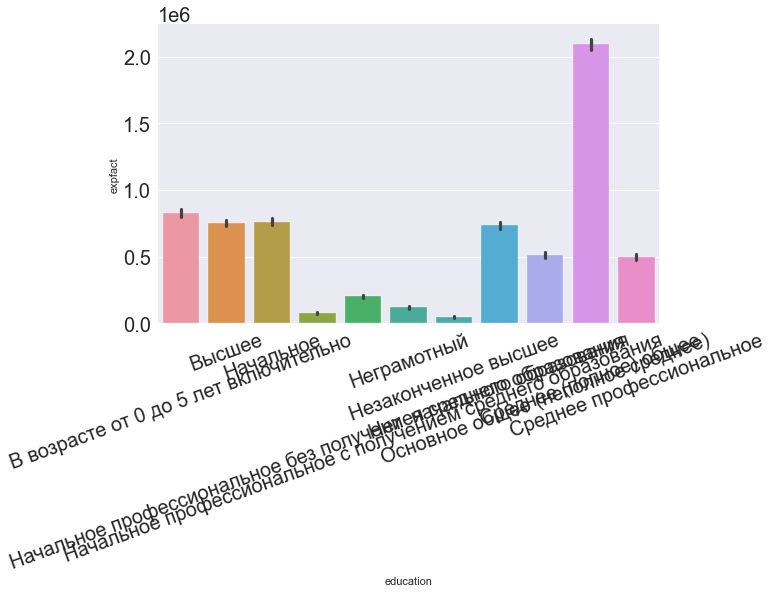

In [547]:
year_2020 = all_poverty_data[all_poverty_data.data_year==2020]

sns.barplot(x='education', y='expfact', data=all_poverty_data[all_poverty_data.data_year==2020], estimator=sum)
all_poverty_data.education.unique()

plt.xticks(rotation=20)


In [548]:

# plt.figure(figsize=(15,8))

# oblast_grp = all_poverty_data.groupby(['oblast_short'])
# n = 9
# rng = np.arange(n)

# meanmedian = oblast_grp.cpi_real.agg(['mean','median'])\
#             .sort_values(by='mean', ascending=False)\
#             .reset_index()

# plt.bar(rng-0.2, meanmedian['mean'], width=0.4, label='mean', ) #color='royalblue'
# plt.bar(rng+0.2, meanmedian['median'], width=0.4, label='median',)

# yticks=np.arange(0.0,130,10)

# plt.title('Средняя и медиана для CPI по региону',fontsize=28)
# plt.xticks(rng, meanmedian['oblast_short'].unique(),fontsize=20)
# plt.yticks(yticks, fontsize=15)
# plt.grid(which='minor', alpha=0.9)
# plt.legend(fontsize=20,loc=3,bbox_to_anchor=(1., .5))
# # plt.yticks(np.arange(0,1.5, 20))



# plt.show()


Сравним столбцы по числу уникальных значений<br>
obl_reg column имеет тоже количество уникальных значений как CPI Попробуем группировать по obl_reg

In [549]:
filt=all_poverty_data.data_year==2011
for col in all_poverty_data.loc[filt].columns:
    uniq=all_poverty_data.loc[filt][col].nunique()
    print(f'{col}:   {uniq}\n ') #{uniq}\n

hh_code:   5010
 
kvartal:   1
 
mon:   3
 
c1:   13
 
gender:   2
 
relative:   13
 
age:   99
 
merital_st:   7
 
education:   11
 
settlement:   2
 
oblast:   9
 
obl_reg:   15
 
kv:   4
 
expfact:   4228
 
weight:   4233
 
pcc:   5010
 
pccf:   5010
 
pline_dc:   1
 
f_linec:   1
 
CPI:   15
 
pccddc:   5010
 
cpsc:   2
 
fpsc:   2
 
pgc:   1261
 
p2c:   1261
 
fpgc:   127
 
fp2c:   127
 
pccserv:   4883
 
pccnf:   4791
 
pccdur:   4889
 
incpcd:   4770
 
data_year:   1
 
cpi_real:   15
 
cpi_exp:   4228
 
oblast_short:   9
 
age_range:   4
 


In [550]:
all_poverty_data.obl_reg.unique()

array(['Иссык-Кульская-село', 'Иссык-Кульская-город',
       'Джалал-Абадская-село', 'Джалал-Абадская-город', 'Нарынская-село',
       'Нарынская-город', 'Баткенская-село', 'Баткенская-город',
       'Ошская-село', 'Ошская-город', 'Таласская-село', 'Таласская-город',
       'Чуйская-село', 'Чуйская-город', 'Бишкек-город', 'Ош-город'],
      dtype=object)

In [551]:
# Поменяем данные в датасете, где obl_reg='Ош-село', на 'Ош-город'
# так как settlement у таких стоит как 1.(то есть -город)

filt=(all_poverty_data.obl_reg=='Ош-село')&(all_poverty_data.settlement==1)
all_poverty_data.loc[
    (all_poverty_data.obl_reg=='Ош-село')&(all_poverty_data.settlement==1),
    'obl_reg'] ='Ош-город'


In [552]:
all_poverty_data.obl_reg.replace({'Ош-село':'Ошская-село'},inplace=True)
len(all_poverty_data.oblast.unique())

9

In [553]:
# У на тут данные nan  в obl_reg. Узнаем куда он принадлежат
all_poverty_data[all_poverty_data.obl_reg.isna()].data_year.unique()

array([], dtype=int64)

In [554]:
# У на тут данные nan  в obl_reg. Узнаем куда он принадлежат
all_poverty_data.obl_reg.unique()

array(['Иссык-Кульская-село', 'Иссык-Кульская-город',
       'Джалал-Абадская-село', 'Джалал-Абадская-город', 'Нарынская-село',
       'Нарынская-город', 'Баткенская-село', 'Баткенская-город',
       'Ошская-село', 'Ошская-город', 'Таласская-село', 'Таласская-город',
       'Чуйская-село', 'Чуйская-город', 'Бишкек-город', 'Ош-город'],
      dtype=object)

Количество обзоров по параметру 'obl_reg'(область+ местность:село или город) </br>
Самая большая выборка по количеству -это Бишкек

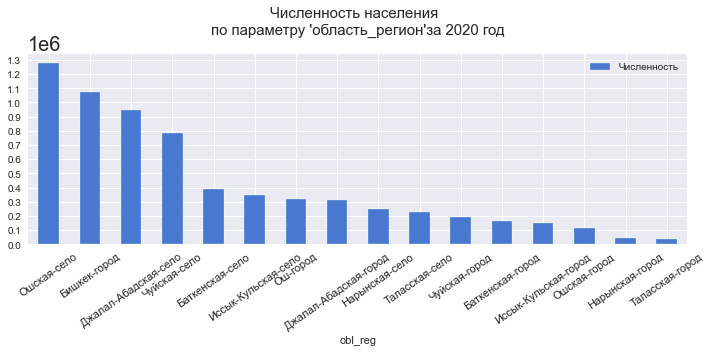

In [555]:

order = all_poverty_data[all_poverty_data.data_year==2020]\
        .groupby(['obl_reg']).agg({'expfact':'sum'})\
        .sort_values(by='expfact',ascending=False)

order.plot(kind='bar',figsize=(10,5)
)
plt.xticks(rotation=35, fontsize=11)
plt.yticks(range(0,1400000,100000), fontsize=10)
plt.title("Численность населения  \nпо параметру 'область_регион'за 2020 год", fontsize=15)
plt.legend(['Численность'])

plt.tight_layout()
plt.show()

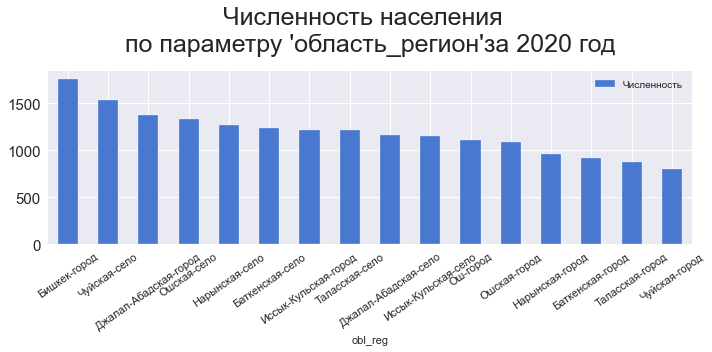

In [556]:
order2 = all_poverty_data[all_poverty_data.data_year==2020]\
        .groupby(['obl_reg']).agg({'hh_code':'count'})\
        .sort_values(by='hh_code',ascending=False)

order2.plot(kind='bar',figsize=(10,5)
)
plt.xticks(rotation=35, fontsize=11)
plt.yticks( fontsize=15)
plt.title("Численность населения  \nпо параметру 'область_регион'за 2020 год")
plt.legend(['Численность'])

plt.tight_layout()
plt.show()

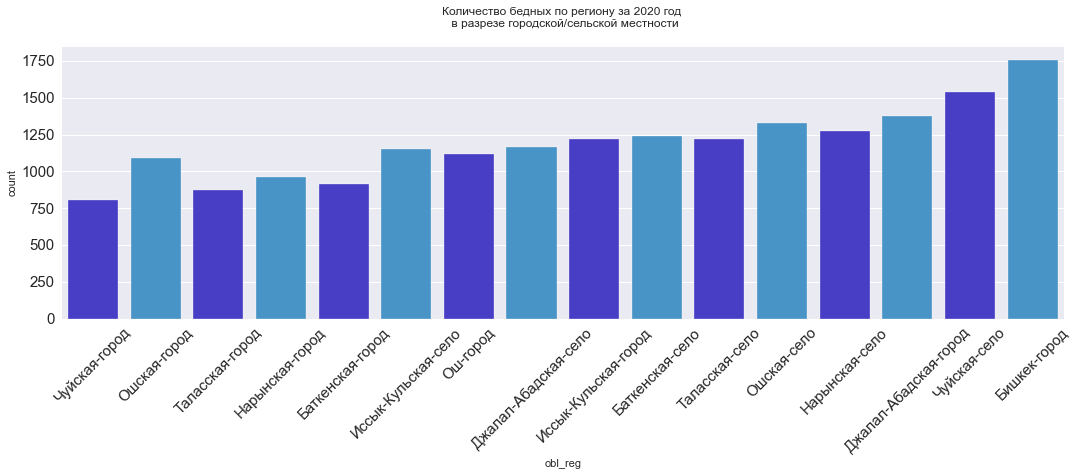

<Figure size 576x396 with 0 Axes>

In [557]:
plt.style.use('seaborn')

plt.figure(figsize=(16,5))
sns.countplot(
    'obl_reg',  data=all_poverty_data[all_poverty_data.data_year==2020] ,  palette=["#3428db", "#3498db"],
    order = all_poverty_data['obl_reg'].value_counts(ascending=True).index
    )


plt.xticks(rotation=45, fontsize=15)
plt.yticks( fontsize=15)
plt.title("Количество бедных по региону за 2020 год \n в разрезе городской/сельской местности")

plt.show()
plt.savefig('количество_obl.svg')

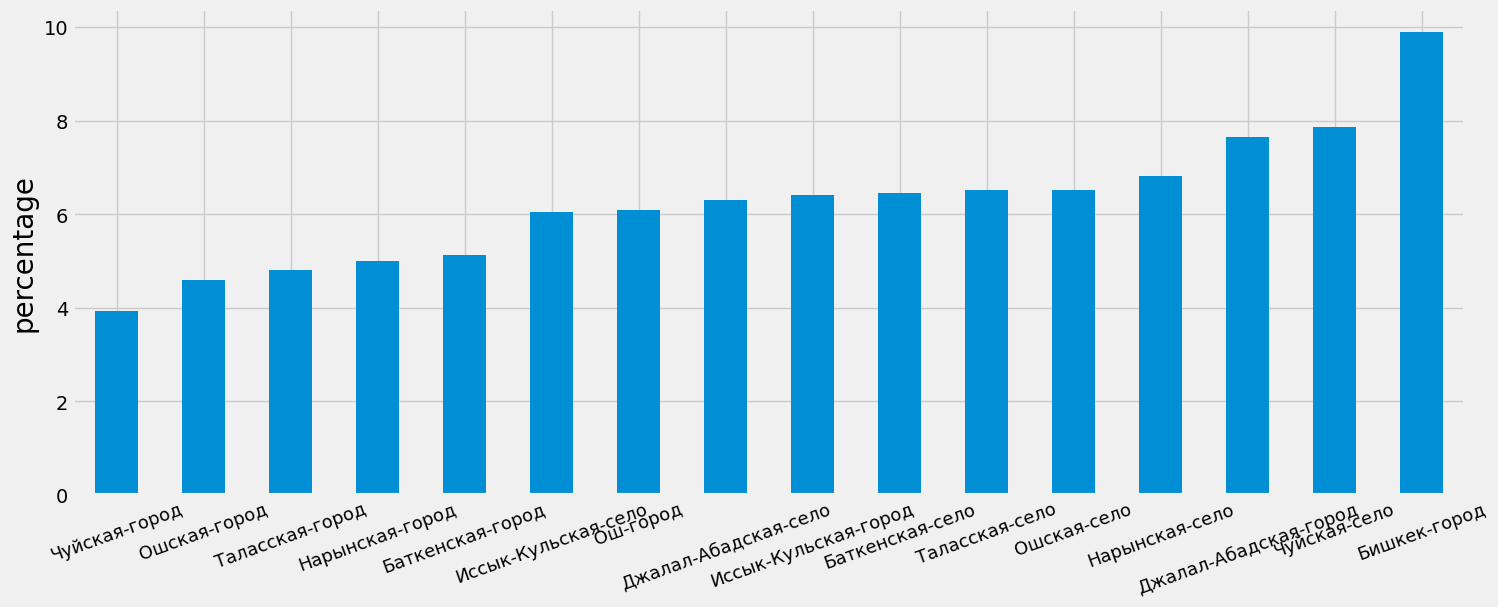

In [558]:
plt.style.use('default')
plt.style.use( 'fivethirtyeight')
np.round(all_poverty_data.obl_reg.value_counts(normalize=True)\
         .sort_values(ascending=True)*100, 2).plot(kind='bar', figsize=(16,6))
plt.ylabel('percentage', fontsize=20)
plt.xticks(rotation=20, fontsize=13)
None

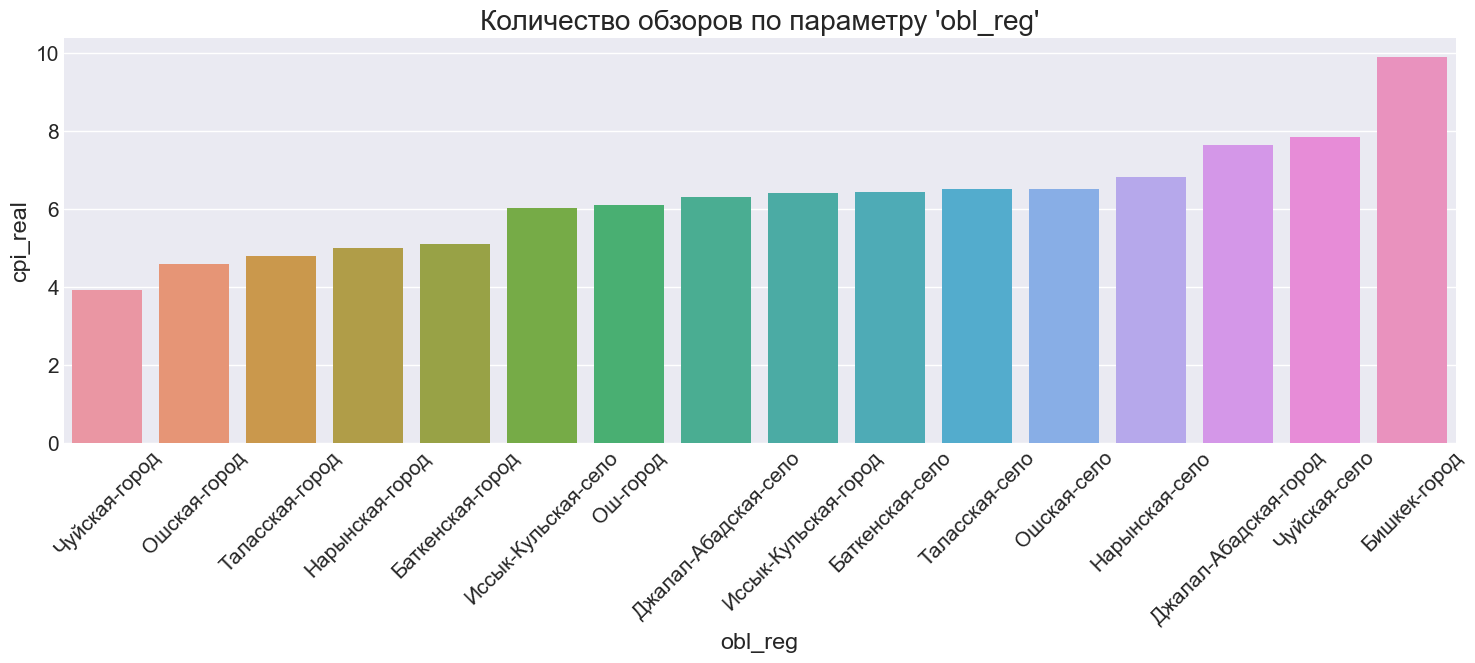

<Figure size 640x480 with 0 Axes>

In [559]:
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(16,5))
sns.barplot(x='obl_reg', y='cpi_real',  data=all_poverty_data , 
            estimator=lambda x: len(x) / len(all_poverty_data) * 100,
           order = all_poverty_data['obl_reg'].value_counts(ascending=True).index)



    
    
plt.xticks(rotation=45, fontsize=15)
plt.yticks( fontsize=15)
plt.title("Количество обзоров по параметру 'obl_reg'")

plt.show()
plt.savefig('количество_obl.svg')

Теперь когда, мы знаем, что CPI распределяется по каждой obl_reg(область_местность)</br>
построим гистограмму распределения CPI 


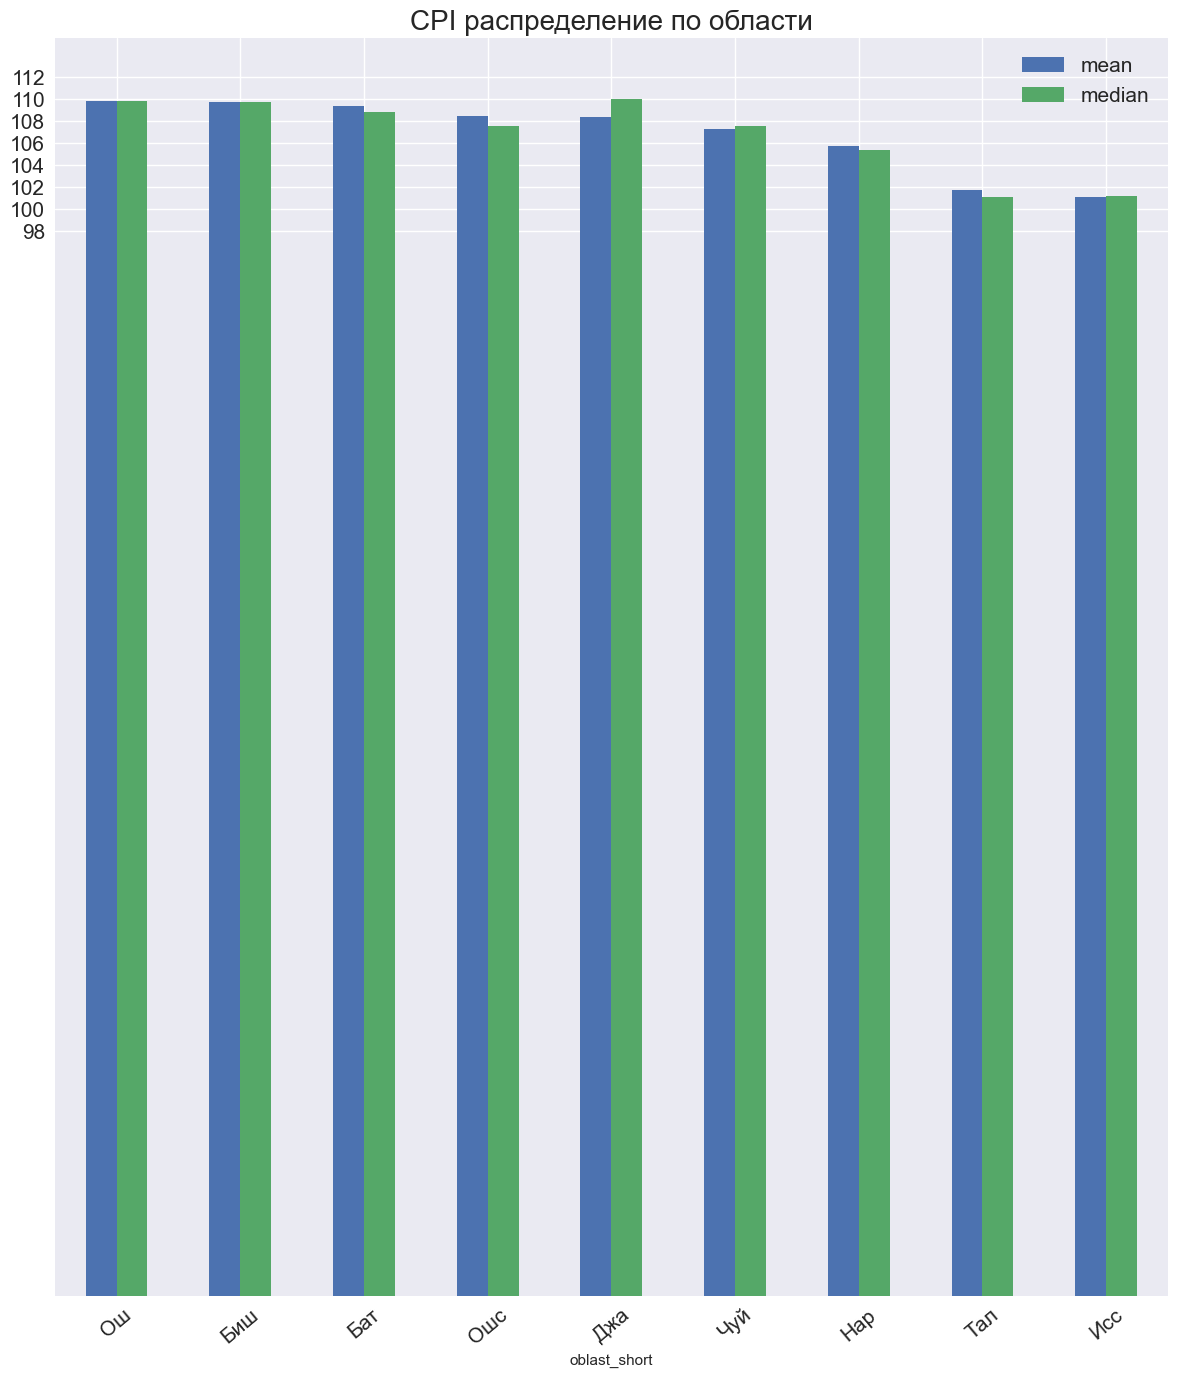

mean  median
oblast_short                
Ош           109.843 109.843
Биш          109.738 109.738
Бат          109.354 108.803
Ошс          108.441 107.617
Джа          108.362 110.037
Чуй          107.291 107.597
Нар          105.743 105.407
Тал          101.808 101.120
Исс          101.132 101.263

In [560]:
plt.style.use('seaborn')

meanmedian = all_poverty_data[all_poverty_data.data_year==2015].groupby(['oblast_short']).cpi_real\
            .agg(['mean','median'])\
            .sort_values(by='mean', ascending=False)\
 
meanmedian.plot(kind='bar', figsize=(12,14), grid=True, ylim=1.3)

plt.xticks(rotation=40,fontsize=15)


plt.yticks(range(98,113,2),fontsize=15,linespacing=5.5)


plt.title('CPI распределение по области', fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()

plt.show()



meanmedian

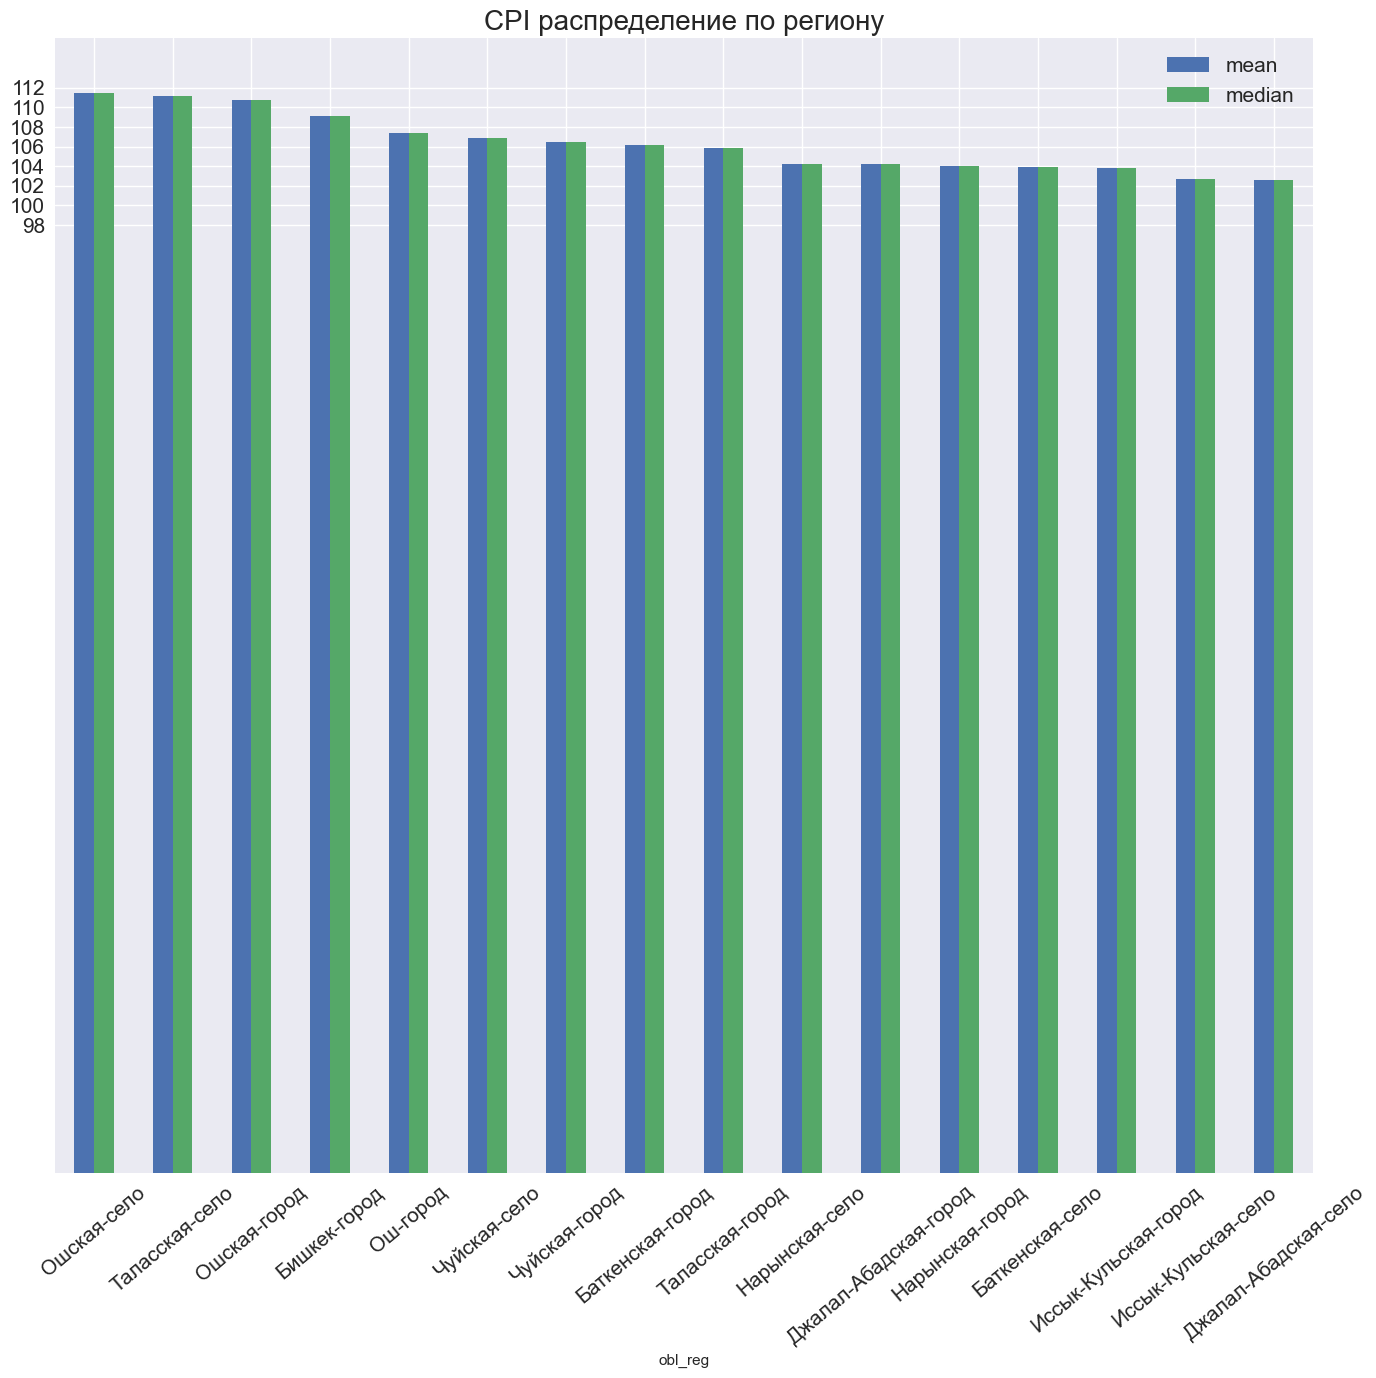

mean  median
obl_reg                              
Ошская-село           111.471 111.471
Таласская-село        111.132 111.132
Ошская-город          110.784 110.784
Бишкек-город          109.106 109.106
Ош-город              107.399 107.399
Чуйская-село          106.851 106.851
Чуйская-город         106.420 106.420
Баткенская-город      106.180 106.180
Таласская-город       105.869 105.869
Нарынская-село        104.247 104.247
Джалал-Абадская-город 104.197 104.197
Нарынская-город       104.055 104.055
Баткенская-село       103.949 103.949
Иссык-Кульская-город  103.829 103.829
Иссык-Кульская-село   102.708 102.708
Джалал-Абадская-село  102.604 102.604

In [561]:
plt.style.use('seaborn')

meanmedian = all_poverty_data[all_poverty_data.data_year==2020].groupby(['obl_reg']).cpi_real\
            .agg(['mean','median'])\
            .sort_values(by='mean', ascending=False)\
 
meanmedian.plot(kind='bar', figsize=(14,14), grid=True, ylim=1.3)

plt.xticks(rotation=40,fontsize=15)


plt.yticks(range(98,113,2),fontsize=15,linespacing=5.5)


plt.title('CPI распределение по региону', fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()

plt.show()



meanmedian

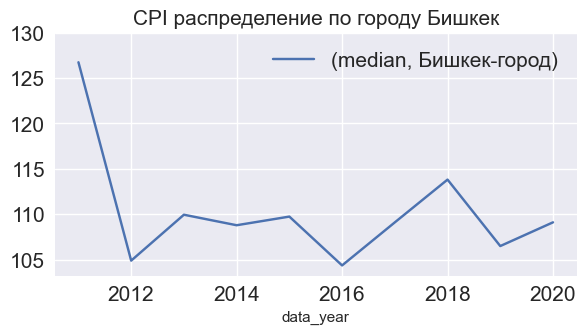

In [562]:
# Issyk kul region CPI

plt.style.use('seaborn')

meanmedian = all_poverty_data[all_poverty_data.oblast_short=='Биш'].groupby(['data_year','obl_reg']).cpi_real\
            .agg(['mean','median'])\
            .sort_values(by='data_year')\
 
meanmedian.reset_index().pivot_table(index='data_year', columns=['obl_reg'], values=['median']).plot(figsize=(6,3))
#                 kind='bar', figsize=(12,7), grid=True, ylim=1.3)

# df.plot(x="X", y=["A", "B", "C"], kind="bar")

plt.xticks(rotation='horizontal',fontsize=15)


plt.yticks(range(105,135,5),fontsize=15,linespacing=4)


plt.title('CPI распределение по городу Бишкек', fontsize=15)
plt.legend(fontsize=15)
# plt.tight_layout()

# plt.show()


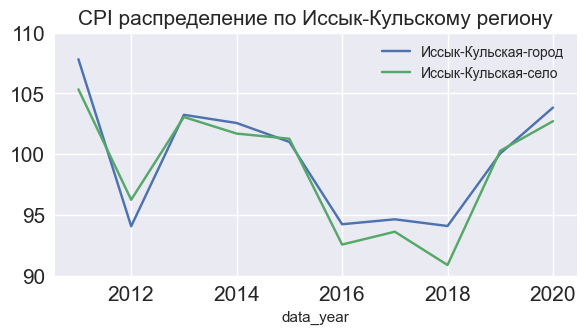

In [563]:
# Issyk kul region CPI

plt.style.use('seaborn')

meanmedian = all_poverty_data[all_poverty_data.oblast_short=='Исс'].groupby(['data_year','obl_reg']).cpi_real\
            .agg(['median'])\
            .sort_values(by='data_year')\
 
meanmedian.reset_index().pivot_table(index='data_year', columns=['obl_reg'], values='median').plot(figsize=(6,3))
#                 kind='bar', figsize=(12,7), grid=True, ylim=1.3)

# df.plot(x="X", y=["A", "B", "C"], kind="bar")

plt.xticks(rotation='horizontal',fontsize=15)


plt.yticks(range(90,113,5),fontsize=15,linespacing=5.5)


plt.title('CPI распределение по Иссык-Кульскому региону', fontsize=15)
plt.legend(fontsize=10)
# plt.tight_layout()

# plt.show()




In [564]:

meanmedian.reset_index()



data_year               obl_reg  median
0        2011  Иссык-Кульская-город 107.805
1        2011   Иссык-Кульская-село 105.327
2        2012  Иссык-Кульская-город  94.060
3        2012   Иссык-Кульская-село  96.240
4        2013  Иссык-Кульская-город 103.231
5        2013   Иссык-Кульская-село 103.051
6        2014  Иссык-Кульская-город 102.558
7        2014   Иссык-Кульская-село 101.687
8        2015   Иссык-Кульская-село 101.263
9        2015  Иссык-Кульская-город 101.000
10       2016  Иссык-Кульская-город  94.225
11       2016   Иссык-Кульская-село  92.553
12       2017  Иссык-Кульская-город  94.632
13       2017   Иссык-Кульская-село  93.611
14       2018  Иссык-Кульская-город  94.079
15       2018   Иссык-Кульская-село  90.870
16       2019  Иссык-Кульская-город 100.051
17       2019   Иссык-Кульская-село 100.273
18       2020  Иссык-Кульская-город 103.829
19       2020   Иссык-Кульская-село 102.708

In [699]:
all_poverty_data.age.quantile(q=0.9)

sns.style.available

AttributeError: module 'seaborn' has no attribute 'style'

Из графика: Самый высокий индекс CPI  в Бишкеке и городе Жалал-Абад, и городе Ош,<br>
которые  считаются первыми тремя большими городами страны.
В больших городах повышение цен на продукты питание и топливо прежде всего негативно вляет <br>
на бедный слой населения городов что логично,<br>
  

Верхняя гистограмма не дает полезную информацию
<br>
<br>
Посмотрим на среднюю и медианы CPI отдельно по региону.
Ниже значения корреляции и  графики показывают, что в Ошской и Баткенской области медиана и средняя коррелируют слабо

 корреляция между mean&median  в Исс: 0.99
 корреляция между mean&median  в Джа: 0.99
 корреляция между mean&median  в Нар: 0.98
 корреляция между mean&median  в Бат: 0.96
 корреляция между mean&median  в Ошс: 0.96
 корреляция между mean&median  в Тал: 0.98
 корреляция между mean&median  в Чуй: 1.0
 корреляция между mean&median  в Биш: 1.0
 корреляция между mean&median  в Ош: 1.0


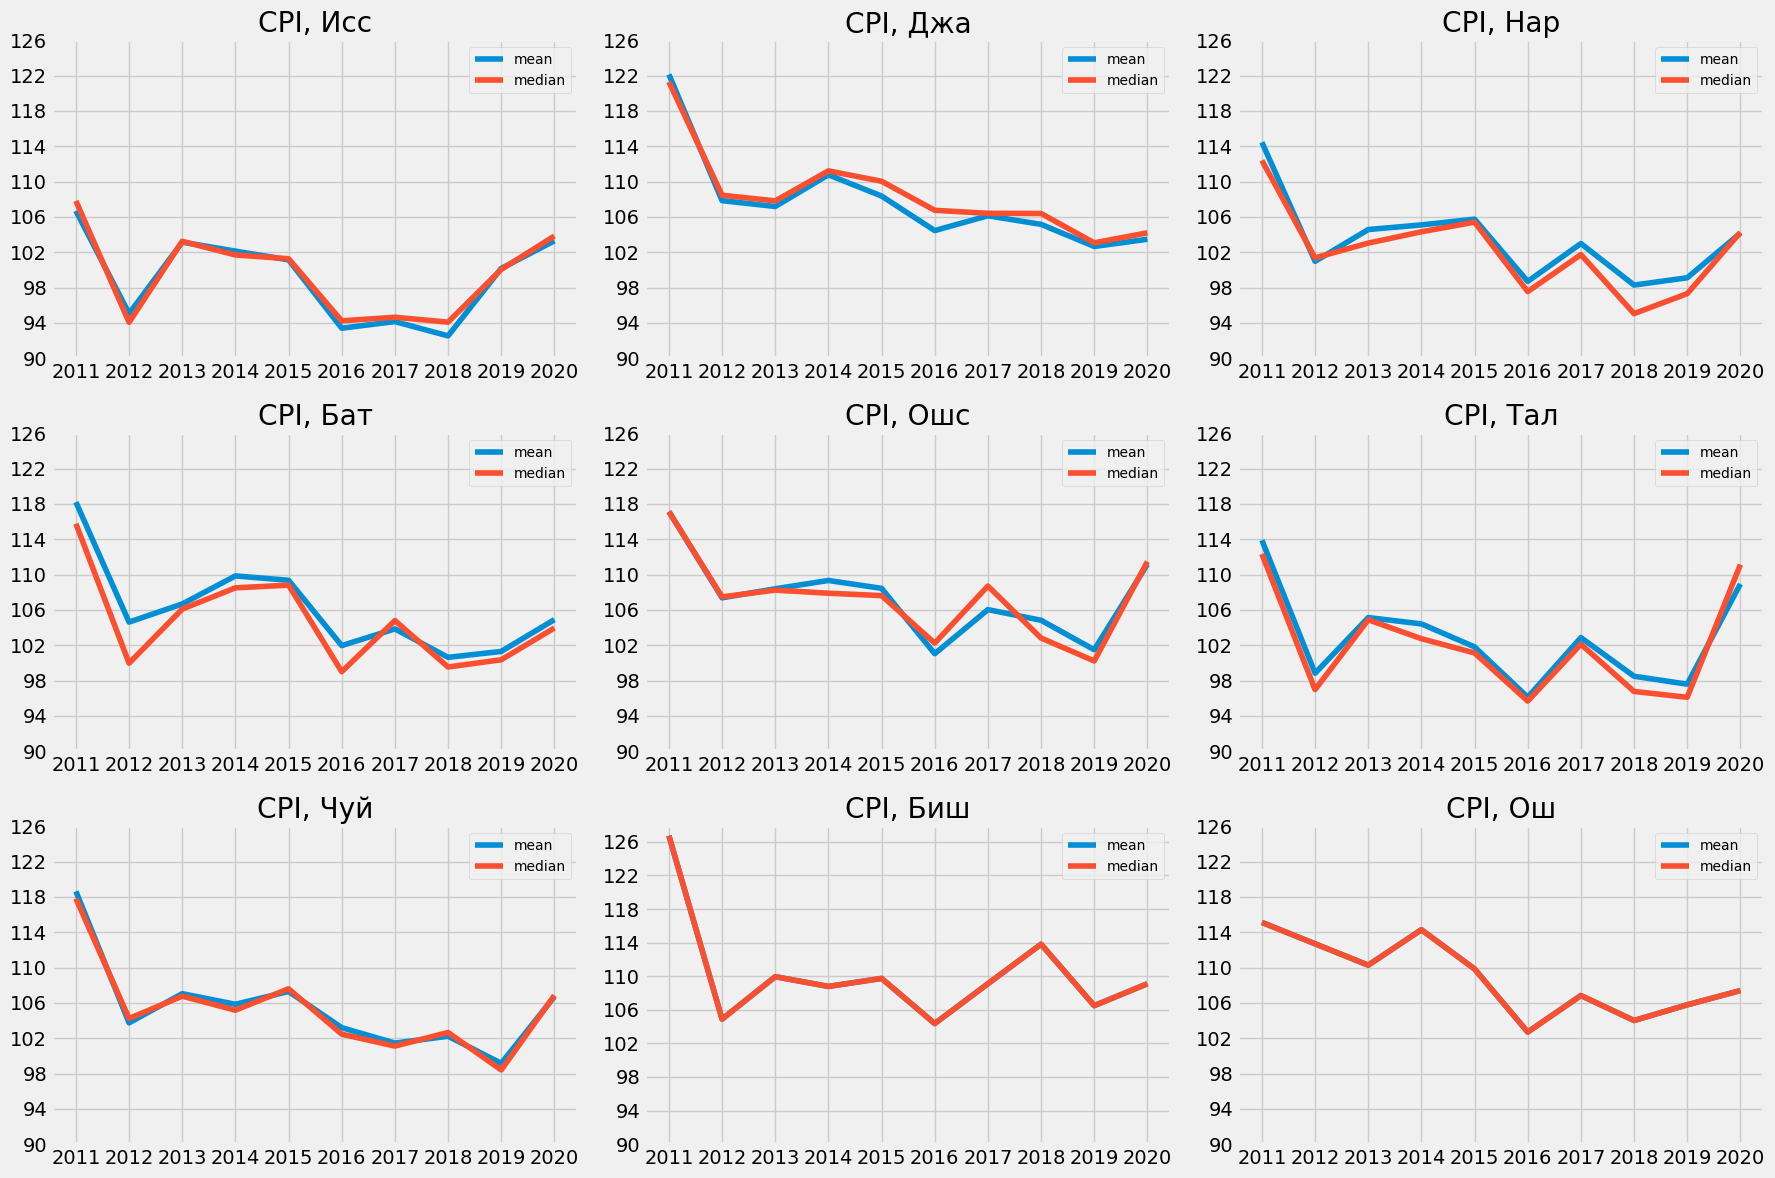

mean  median
data_year                
2011      115.115 115.115
2013      110.275 110.275
2014      114.288 114.288
2015      109.843 109.843
2016      102.697 102.697
2017      106.834 106.834
2018      104.005 104.005
2019      105.781 105.781
2020      107.399 107.399

In [730]:
#сократим название датасета
plt.style.use('default')
plt.style.use('fivethirtyeight')
all=all_poverty_data

fig, axes=plt.subplots(3,3, figsize=(18,12))

oblast_list=list(all.oblast_short.unique())
xticks=range(2011,2021)
yticks= range(90,130,4)
n=0
for i in range(3):
    for j in range(3):

        filt=(all['oblast_short']==oblast_list[n])
        oblast_mean=all.loc[filt].groupby('data_year')['cpi_real'].agg(['mean','median'])

        axes[i][j].plot(oblast_mean,label=['mean','median'])
        axes[i][j].set_title(f'CPI, {oblast_list[n]}')
        axes[i][j].legend(fontsize=10)
        axes[i][j].set_xticks(xticks,fontsize=10, rotation=20)
        axes[i][j].set_yticks(yticks,fontsize=10)
   

        corr=(oblast_mean.corr()['median'][0]).round(2)
        print(f' корреляция между mean&median  в {oblast_list[n]}: {corr}')
        n+=1

        
fig.tight_layout()


plt.show()

oblast_mean

Исс -1.1365
Джа 1.3304
Нар 0.3918
Бат 0.3835
Ошс -0.6174
Тал 0.7119
Чуй 0.7117
Биш 1.4632
Ош 1.2594


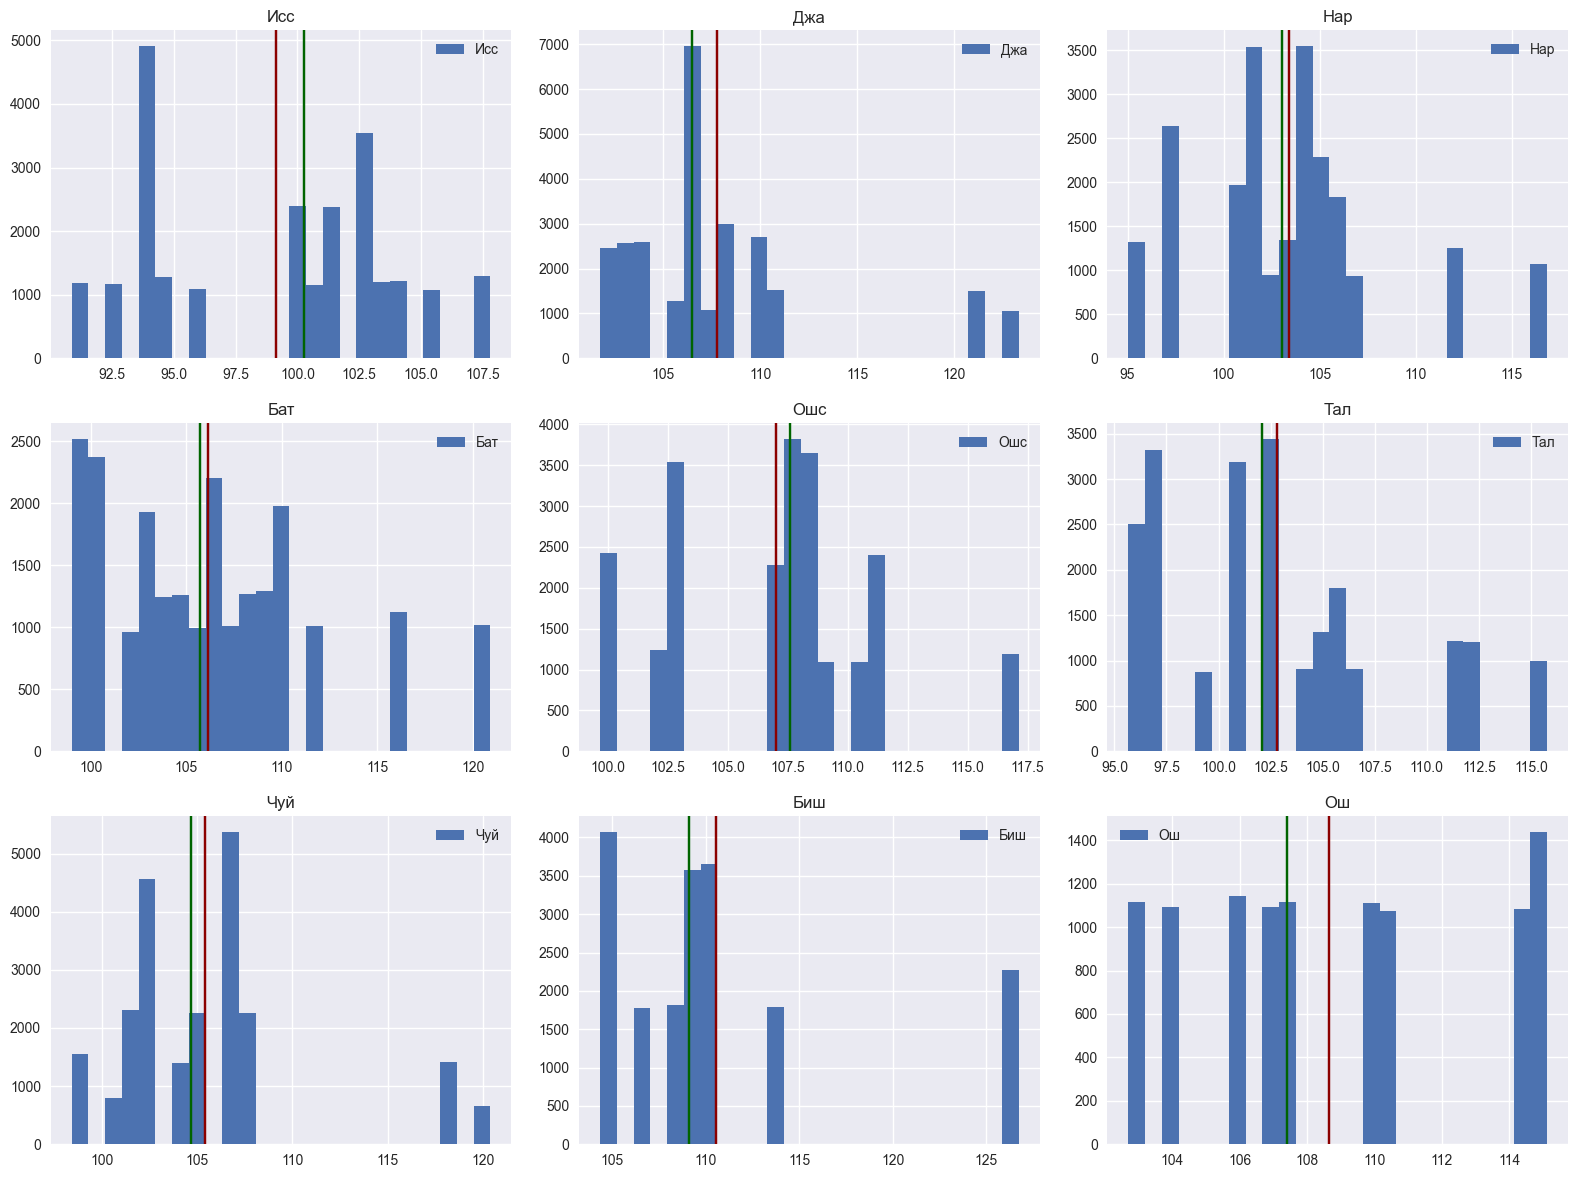

In [567]:
# filt_year=all_poverty_data.data_year==2016
all=all_poverty_data

fig, axes=plt.subplots(3,3, figsize=(16,12))

oblast_list=list(all.oblast_short.unique())

n=0
for i in range(3):
    for j in range(3):

        filt = (all['oblast_short']==oblast_list[n])
        CPI_by_oblast = all.loc[filt].cpi_real
        diff = all[filt].cpi_real.mean()-all[filt].cpi_real.median()
        mean_cpi = all[filt]['cpi_real'].mean()
        median_cpi = all[filt]['cpi_real'].median()

        axes[i][j].hist(CPI_by_oblast, bins=25, label=oblast_list[n])
        axes[i][j].set_title(oblast_list[n])
        axes[i][j].legend()
                
        axes[i][j].axvline(mean_cpi, color='darkred', label='CPI mean')
        axes[i][j].axvline(median_cpi, color='darkgreen', label='CPI median')
        print(f'{oblast_list[n]} {diff.round(4)}')
        n+=1

plt.tight_layout()
plt.show()

<h3> CPI  в разрезе города и села по годам</h3>

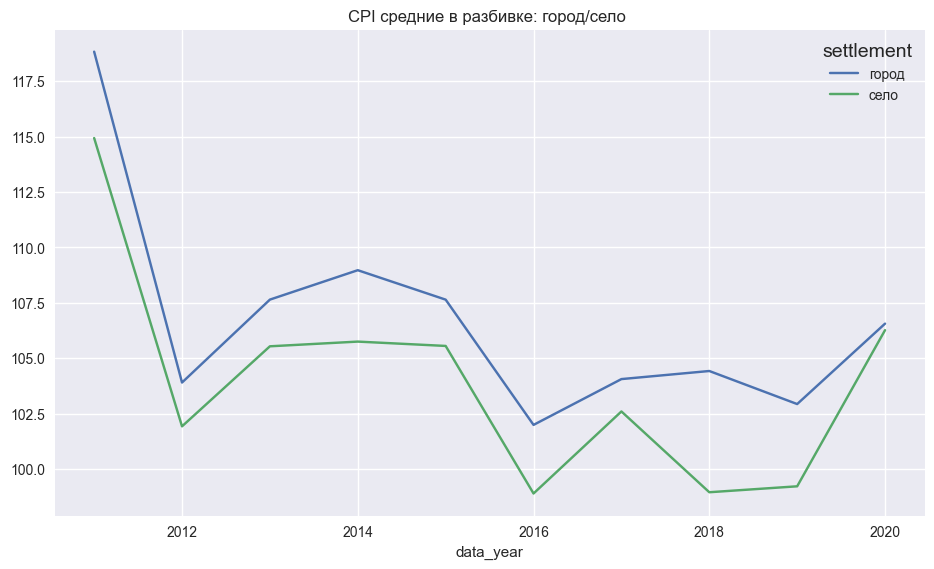

In [568]:
CPI_year_and_settle=all_poverty_data\
    .groupby(['data_year','settlement'])['cpi_real']\
    .mean()

corr=pd.DataFrame(CPI_year_and_settle)

pd.pivot_table(CPI_year_and_settle.reset_index(), index=['data_year'],
               columns='settlement',values='cpi_real')\
                .plot(
               figsize=(10,6),
                title='CPI средние в разбивке: город/село ',
                grid=True,
                )

# plt.yticks(fontstyle=15)
# plt.xticks(fontstyle=15)
# plt.savefig('CPI_urban_rural_mean.jpeg')
plt.show()


In [569]:
CPI_year_and_settle

data_year  settlement
2011       город        118.828
           село         114.931
2012       город        103.898
           село         101.921
2013       город        107.640
           село         105.533
2014       город        108.967
           село         105.745
2015       город        107.638
           село         105.549
2016       город        101.986
           село          98.891
2017       город        104.053
           село         102.593
2018       город        104.418
           село          98.947
2019       город        102.927
           село          99.215
2020       город        106.556
           село         106.261
Name: cpi_real, dtype: float64

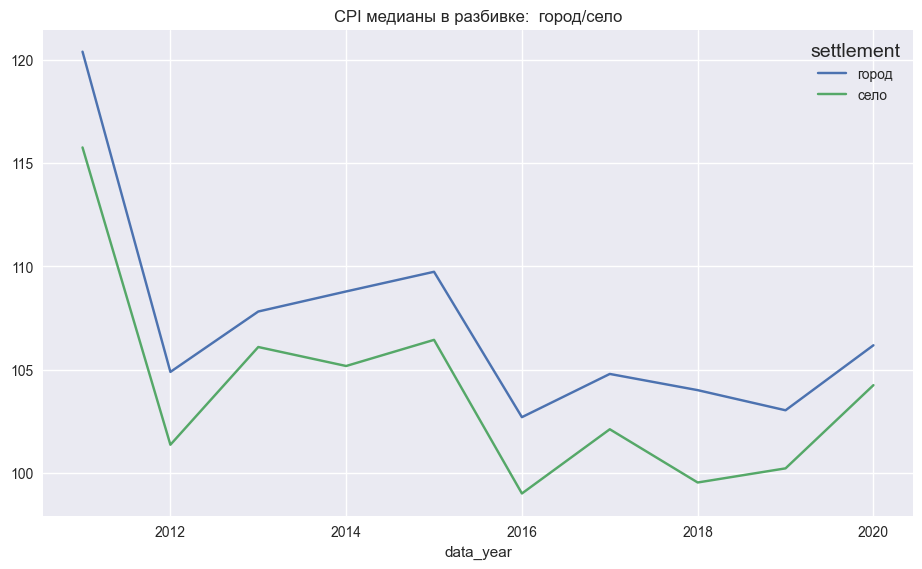

In [570]:
CPI_year_and_settle=all_poverty_data\
    .groupby(['data_year','settlement'])['cpi_real']\
    .median()

corr=pd.DataFrame(CPI_year_and_settle)

pd.pivot_table(CPI_year_and_settle.reset_index(), index=['data_year'],
               columns='settlement',values='cpi_real')\
                .plot(
               figsize=(10,6),
                title='CPI медианы в разбивке:  город/село',
                grid=True,
                )

# plt.yticks(fontstyle=15)
# plt.xticks(fontstyle=15)
# plt.savefig('CPI_urban_rural_mean.jpeg')
plt.show()

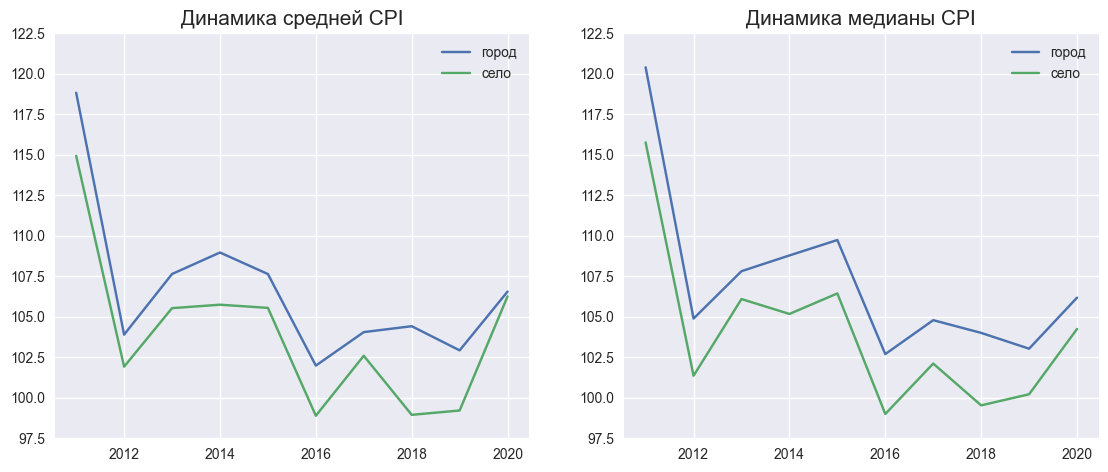

In [571]:
d_median=all_poverty_data.groupby(['data_year','settlement']).cpi_real.median().reset_index()\
    .rename(columns={'cpi_real':'CPI_median'})\
    .sort_values(by=['data_year','settlement','CPI_median'])

d_mean=all_poverty_data.groupby(['data_year','settlement']).cpi_real.mean().reset_index()\
    .rename(columns={'cpi_real':'CPI_mean'})\
    .sort_values(by=['data_year','settlement','CPI_mean'])


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
x=d_mean.data_year.unique()
y1=d_mean[d_mean.settlement=='город'].CPI_mean
y2=d_mean[d_mean.settlement=='село'].CPI_mean
y5=settl[settl.settlement=='город']['численность']

ax1.plot(x,y1,  x, y2, ) #mean
ax1.legend(['город','село'])

ax1.set_title('Динамика средней CPI', fontsize=15)
yticks=np.arange(97.5,125,2.5)
ax1.set_yticks(yticks)
# ax1.legend()

y3=d_median[d_median.settlement=='город'].CPI_median
y4=d_median[d_median.settlement=='село'].CPI_median
y6=settl[settl.settlement=='село']['численность']
ax2.plot(x,y3, x, y4) #median
ax2.set_title('Динамика медианы CPI', fontsize=15)
ax2.set_yticks(yticks)
ax2.legend(['город','село'])



None

data_year settlement  численность
0        2011      город        0.551
1        2011       село        0.449
2        2012      город        0.552
3        2012       село        0.448
4        2013      город        0.529
5        2013       село        0.471
6        2014      город        0.534
7        2014       село        0.466
8        2015      город        0.529
9        2015       село        0.471
10       2016      город        0.531
11       2016       село        0.469
12       2017      город        0.532
13       2017       село        0.468
14       2018      город        0.530
15       2018       село        0.470
16       2019      город        0.531
17       2019       село        0.469
18       2020      город        0.531
19       2020       село        0.469

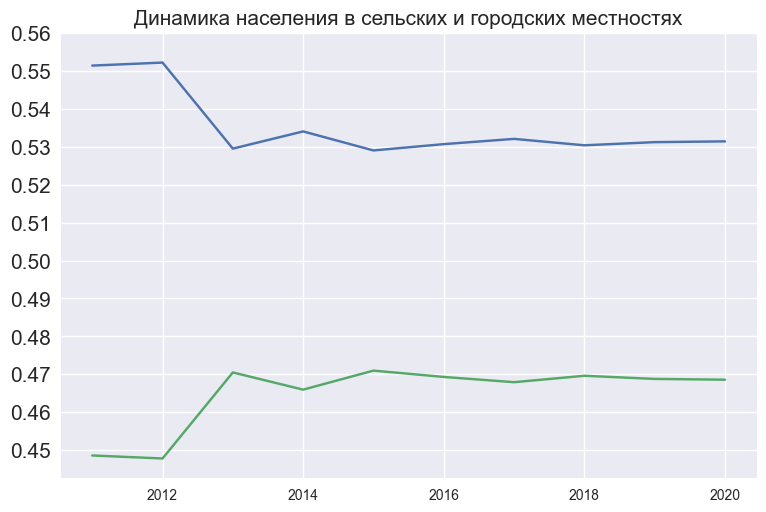

In [572]:
settl=all_poverty_data.groupby('data_year').settlement.value_counts(normalize=True).reset_index(name='численность')

x=settl[d_median.settlement=='город']['data_year']
y=settl[d_median.settlement=='город']['численность']
x1=settl[d_median.settlement=='село']['data_year']
y1=settl[d_median.settlement=='село']['численность']

plt.plot(x, y, x1,y1)
yticks=np.arange(0.45,0.56, 0.01)
plt.title('Динамика населения в сельских и городских местностях', fontsize=15)
plt.yticks(yticks, fontsize=15)

# plt.tight_layout()
None
settl

In [573]:

settl_num = all_poverty_data.groupby(['data_year','settlement']).expfact.sum().reset_index(name='number')

settl_num.head(5)




data_year settlement      number
0       2011      город 2070055.504
1       2011       село 3481832.496
2       2012      город 2075478.354
3       2012       село 3587654.646
4       2013      город 2045383.158

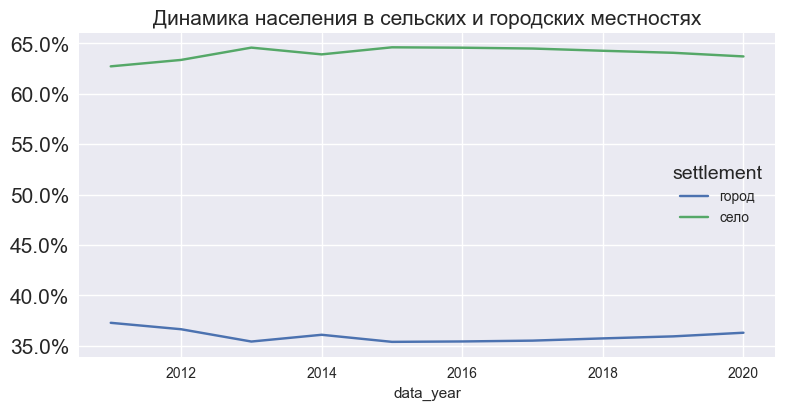

In [574]:
from matplotlib.ticker import PercentFormatter

settl_num['%']= 100*settl_num.number/ settl_num.groupby(['data_year']).number.transform('sum')
settl_num.pivot_table(index='data_year', columns='settlement',values='%').plot(figsize=(8,4))




plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.title('Динамика населения в сельских и городских местностях', fontsize=15)
plt.yticks( fontsize=15)

# plt.legend(fontsize=15)
plt.show()


In [575]:

mean_2015=all_poverty_data[all_poverty_data.data_year==2015].cpi_real.mean()
median_2015=all_poverty_data[all_poverty_data.data_year==2015].cpi_real.median()
print(mean_2015, median_2015)
all_poverty_data[all_poverty_data.data_year==2015].groupby(['settlement','obl_reg'])\
                                                    .cpi_real.agg(['mean','median'])\
                                                    .sort_values(by=['settlement','mean'],ascending=False)

all_poverty_data[all_poverty_data.data_year==2015].groupby('settlement').cpi_real.agg(['mean','median'])

106.65447518237005 107.59696972716665


mean  median
settlement                
город      107.638 109.738
село       105.549 106.441

2015 год: Медиана выше чем средняя!

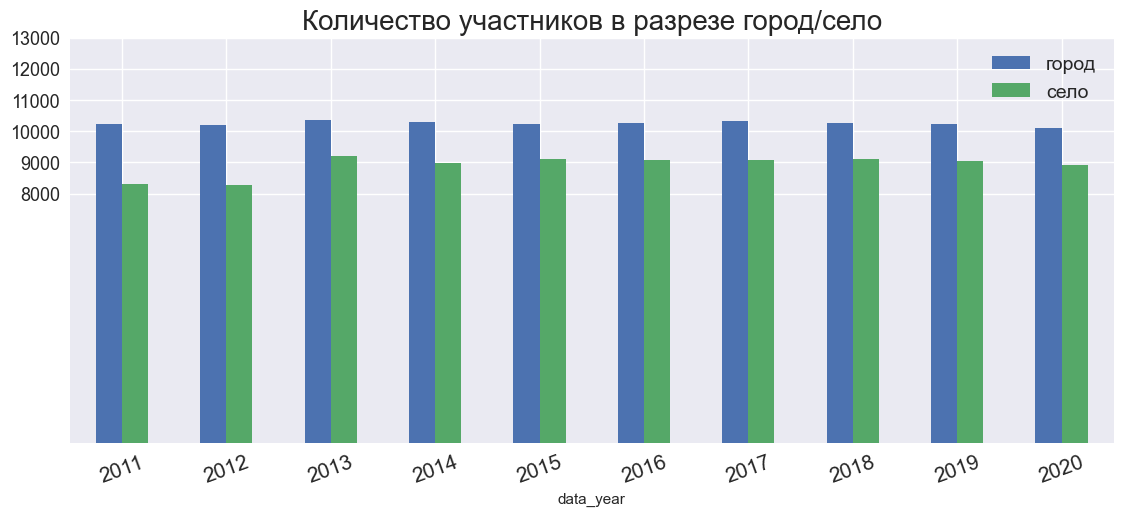

In [576]:
data_settl=all_poverty_data.groupby(['data_year','settlement'])\
                .hh_code.count().reset_index().rename(columns={'hh_code':'people_num'})

data_settl.pivot_table(index='data_year', columns='settlement', values='people_num').plot(kind='bar', figsize=(12,5) )

plt.xticks(rotation=20, fontsize=(15))
plt.title('Количество участников в разрезе город/село', fontsize=(20))

plt.yticks(range(8000,14000, 1000), fontsize=13)
plt.legend(fontsize=14)

None


C:\Users\user\AppData\Local\Temp\ipykernel_14516\1723929516.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(settl1.obl_reg,rotation=20, fontsize=15)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1723929516.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(settl2.obl_reg,rotation=20, fontsize=15)


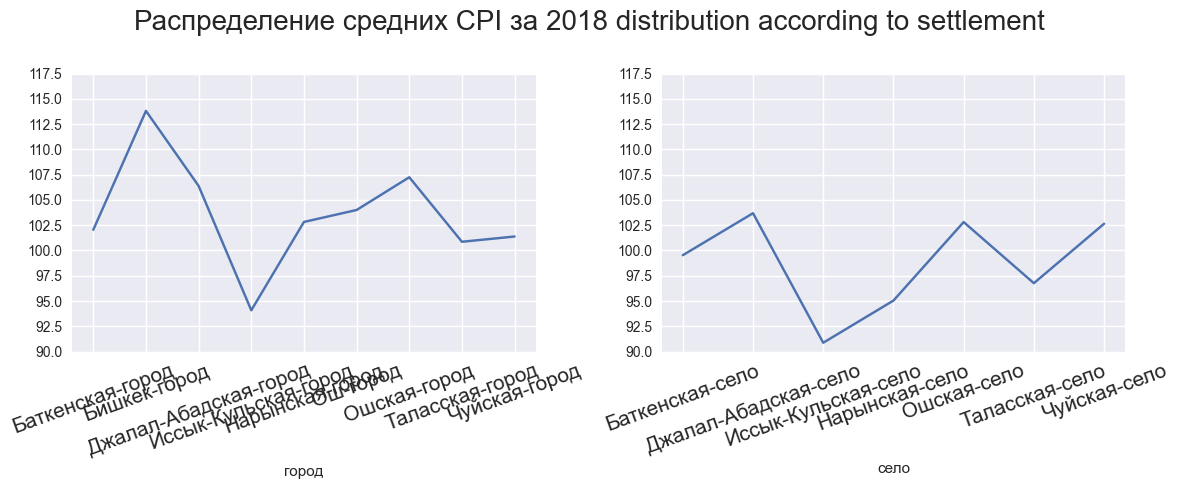

In [577]:
fig,(ax1,ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12,5))



settl_data=all_poverty_data[all_poverty_data.data_year==2018].groupby(['settlement','obl_reg'])\
                                                .cpi_real.agg(['mean','median']).reset_index()
settl1 = settl_data[settl_data.settlement=='город']
settl2 = settl_data[settl_data.settlement=='село']

ax1.plot(settl1.obl_reg,settl1['mean'])
ax1.set_xticklabels(settl1.obl_reg,rotation=20, fontsize=15)
ax1.set_xlabel('город')
yticks=np.arange(90,120,2.5)
ax1.set_yticks(yticks)

ax2.plot(settl2.obl_reg,settl2['mean'])
ax2.set_xticklabels(settl2.obl_reg,rotation=20, fontsize=15)
ax2.set_xlabel('село')
ax2.set_yticks(yticks)

plt.suptitle('Распределение средних CPI за 2018 distribution according to settlement', fontsize=20)

fig.tight_layout()


C:\Users\user\AppData\Local\Temp\ipykernel_14516\1477927548.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(settl1.obl_reg,rotation=20, fontsize=12)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1477927548.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(settl2.obl_reg,rotation=20, fontsize=12)


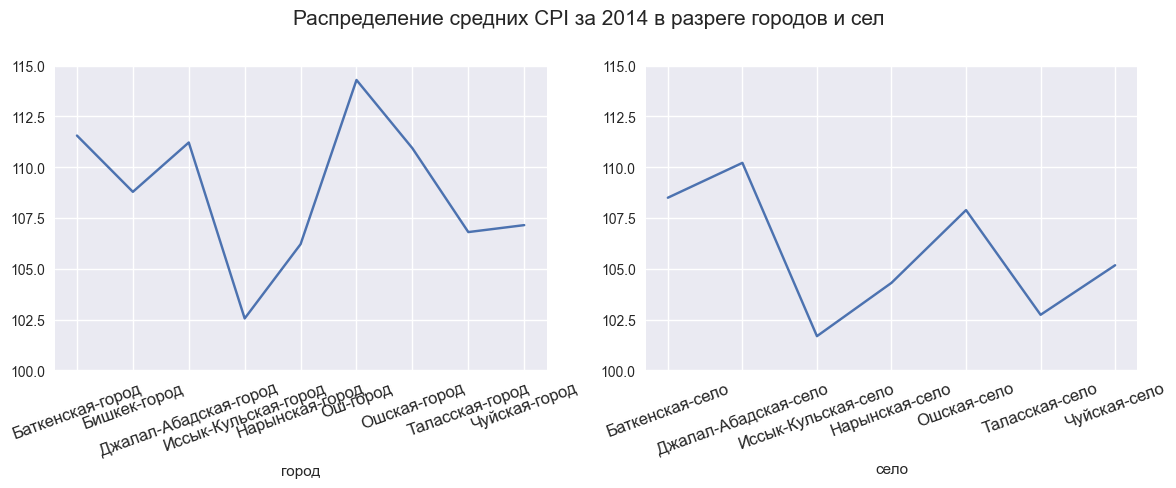

In [578]:
fig,(ax1,ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12,5))

plt.style.use('seaborn')


settl_data=all_poverty_data[all_poverty_data.data_year==2014].groupby(['settlement','obl_reg'])\
                                                .cpi_real.agg(['mean','median']).reset_index()
settl1 = settl_data[settl_data.settlement=='город']
settl2 = settl_data[settl_data.settlement=='село']

ax1.plot(settl1.obl_reg,settl1['mean'])
ax1.set_xticklabels(settl1.obl_reg,rotation=20, fontsize=12)
ax1.set_xlabel('город')
yticks=np.arange(100,116,2.5)
ax1.set_yticks(yticks)

ax2.plot(settl2.obl_reg,settl2['mean'])
ax2.set_xticklabels(settl2.obl_reg,rotation=20, fontsize=12)
ax2.set_xlabel('село')
ax2.set_yticks(yticks)

plt.suptitle('Распределение средних CPI за 2014 в разреге городов и сел', fontsize=15)

fig.tight_layout()


C:\Users\user\AppData\Local\Temp\ipykernel_14516\1024134611.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(settl1.obl_reg,rotation=20, fontsize=12)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1024134611.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(settl2.obl_reg,rotation=20, fontsize=12)


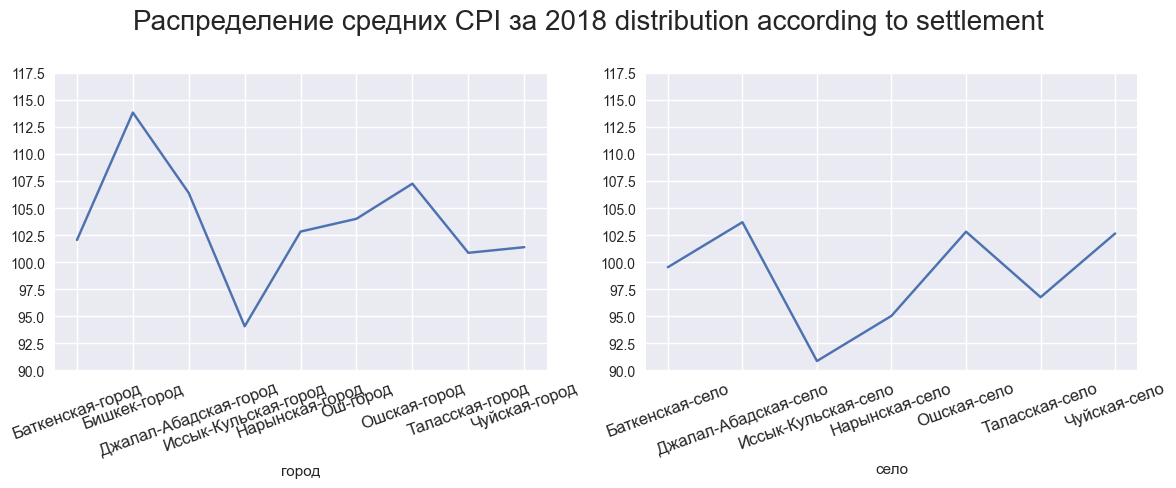

In [579]:
fig,(ax1,ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12,5))



settl_data=all_poverty_data[all_poverty_data.data_year==2018].groupby(['settlement','obl_reg'])\
                                                .cpi_real.agg(['mean','median']).reset_index()
settl1 = settl_data[settl_data.settlement=='город']
settl2 = settl_data[settl_data.settlement=='село']

ax1.plot(settl1.obl_reg,settl1['mean'])
ax1.set_xticklabels(settl1.obl_reg,rotation=20, fontsize=12)
ax1.set_xlabel('город')
yticks=np.arange(90,120,2.5)
ax1.set_yticks(yticks)



ax2.plot(settl2.obl_reg,settl2['mean'])
ax2.set_xticklabels(settl2.obl_reg,rotation=20, fontsize=12)
ax2.set_xlabel('село')
ax2.set_yticks(yticks)

plt.suptitle('Распределение средних CPI за 2018 distribution according to settlement', fontsize=20)

fig.tight_layout()


In [580]:
meanmedian = all_poverty_data.groupby(['data_year','obl_reg',])\
            .cpi_real.agg(['mean','median']).reset_index()
            
meanmedian['mean'].mean()
meanmedian 


data_year                obl_reg    mean  median
0         2011       Баткенская-город 120.922 120.922
1         2011        Баткенская-село 115.761 115.761
2         2011           Бишкек-город 126.732 126.732
3         2011  Джалал-Абадская-город 121.291 121.291
4         2011   Джалал-Абадская-село 123.341 123.341
..         ...                    ...     ...     ...
153       2020            Ошская-село 111.471 111.471
154       2020        Таласская-город 105.869 105.869
155       2020         Таласская-село 111.132 111.132
156       2020          Чуйская-город 106.420 106.420
157       2020           Чуйская-село 106.851 106.851

[158 rows x 4 columns]

In [581]:
all_poverty_data.groupby('obl_reg').expfact.sum().sort_values()

obl_reg
Таласская-город           370816.320
Нарынская-город           393928.377
Ошская-город              798440.851
Иссык-Кульская-город     1365758.323
Баткенская-город         1416408.102
Чуйская-город            1639642.580
Таласская-село           2161026.694
Нарынская-село           2393146.623
Джалал-Абадская-город    3012007.975
Ош-город                 3175867.417
Иссык-Кульская-село      3375621.677
Баткенская-село          3562120.898
Чуйская-село             7340264.977
Джалал-Абадская-село     8562194.830
Бишкек-город             9712753.100
Ошская-село             11570028.732
Name: expfact, dtype: float64

In [723]:
l=list(all_poverty_data[all_poverty_data.settlement=='село'].obl_reg.unique())
l

['Иссык-Кульская-село',
 'Джалал-Абадская-село',
 'Нарынская-село',
 'Баткенская-село',
 'Ошская-село',
 'Таласская-село',
 'Чуйская-село']

<Figure size 1800x500 with 0 Axes>

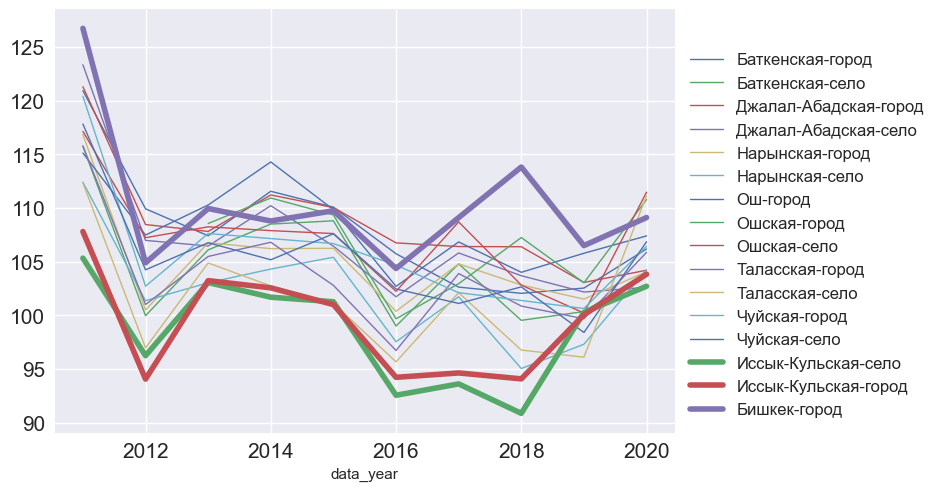

In [752]:
plt.style.use('default')
plt.style.use('seaborn')
plt.figure(figsize=(18,5))
params = {'axes.titlesize':'20',
          'xtick.labelsize':'15',
          'ytick.labelsize':'15',
        }
plt.rcParams.update(params)


data_by_year=all_poverty_data.groupby(['data_year','obl_reg']).agg({'cpi_exp':'sum', 'expfact':'sum'}).reset_index()
data_by_year['CPI_weighted']=data_by_year.cpi_exp/data_by_year.expfact
# data_by_year.reset_index().plot(x='data_year', y='CPI_weighted')

# all_poverty_data.groupby('data_year').agg({'cpi_real':['mean','median']}).plot()

# plt.title('Средневзвешанная CPI по годам')
# plt.legend(fontsize=15)

None
filt2=data_by_year.obl_reg.isin(['Бишкек-город','Иссык-Кульская-село', 'Иссык-Кульская-город'])
data_by_year[~filt2].pivot_table(index='data_year', columns='obl_reg', values='CPI_weighted').plot(linewidth=1.)


data_by_year.pivot_table(index='data_year', columns='obl_reg', values='CPI_weighted', )['Иссык-Кульская-село'].plot(linewidth=4)
data_by_year.pivot_table(index='data_year', columns='obl_reg', values='CPI_weighted', )['Иссык-Кульская-город'].plot(linewidth=4)
data_by_year.pivot_table(index='data_year', columns='obl_reg', values='CPI_weighted', )[ 'Бишкек-город'].plot(linewidth=4)


plt.legend(fontsize=12,loc=3,bbox_to_anchor=(1., 0.0))


In [741]:
filt2=data_by_year.obl_reg.isin(['Бишкек-город','Иссык-Кульская-село', 'Иссык-Кульская-город'])

data_by_year[~filt2].obl_reg.unique()

array(['Баткенская-город', 'Баткенская-село', 'Джалал-Абадская-город',
       'Джалал-Абадская-село', 'Нарынская-город', 'Нарынская-село',
       'Ош-город', 'Ошская-село', 'Таласская-город', 'Таласская-село',
       'Чуйская-город', 'Чуйская-село', 'Ошская-город'], dtype=object)

In [583]:
# meanmedian = all_poverty_data.groupby(['data_year','obl_reg',])\
#             .cpi_real.agg(['mean']).reset_index()

# meanmedian.pivot_table(index='data_year', columns='obl_reg', values='mean', ).plot(linewidth=0.8)

# meanmedian.pivot_table(index='data_year', columns='obl_reg', values='mean', )['Иссык-Кульская-село'].plot(linewidth=4)
# meanmedian.pivot_table(index='data_year', columns='obl_reg', values='mean', )['Иссык-Кульская-город'].plot(linewidth=4)
# meanmedian.pivot_table(index='data_year', columns='obl_reg', values='mean', )[ 'Бишкек-город'].plot(linewidth=4)


# plt.legend(fontsize=10,loc=3,bbox_to_anchor=(1., 0.0))

# plt.yticks(fontsize=15)

# plt.yticks(fontsize=15)
None

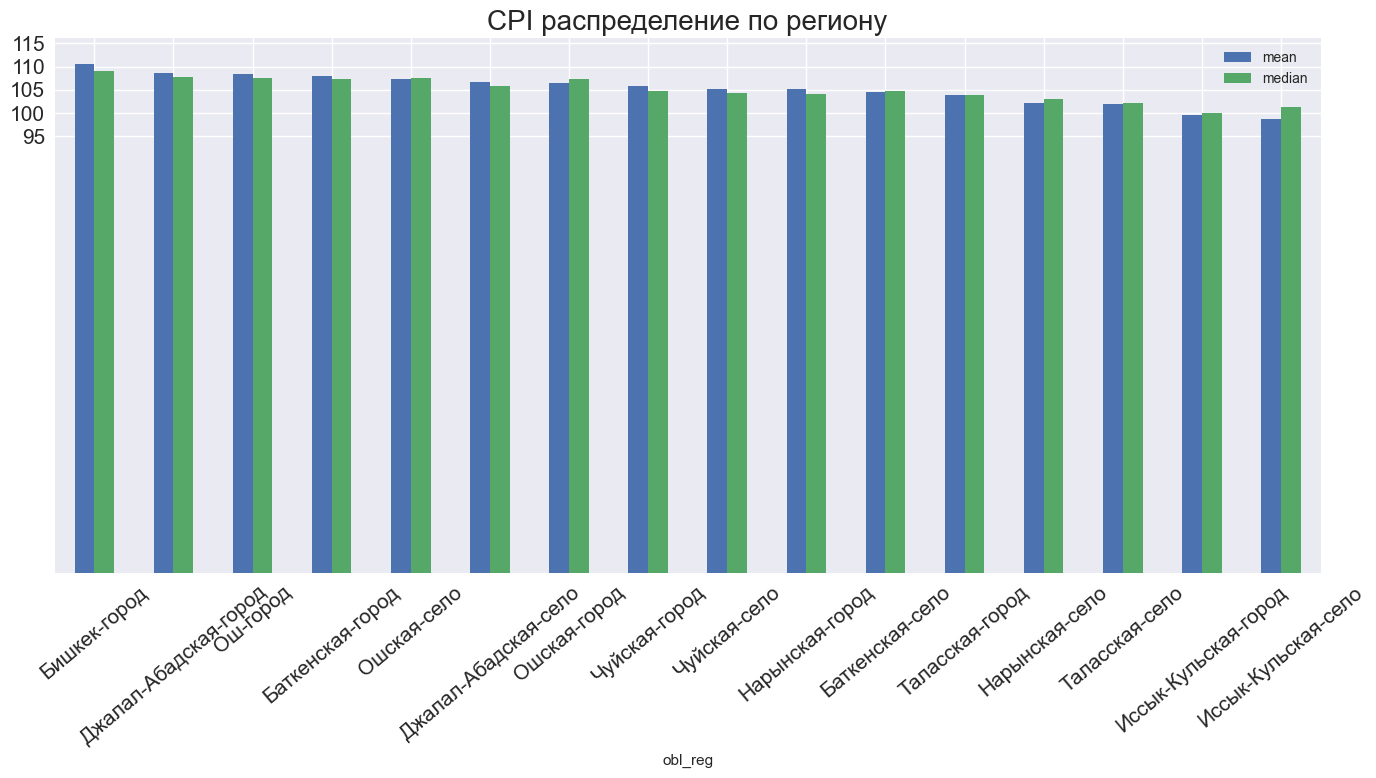

mean  median
obl_reg                              
Бишкек-город          110.565 109.102
Джалал-Абадская-город 108.650 107.814
Ош-город              108.513 107.476
Баткенская-город      107.995 107.407
Ошская-село           107.257 107.617
Джалал-Абадская-село  106.739 105.811
Ошская-город          106.557 107.245
Чуйская-город         105.765 104.678
Чуйская-село          105.201 104.237
Нарынская-город       105.107 104.055
Баткенская-село       104.627 104.794
Таласская-город       103.990 103.889
Нарынская-село        102.188 103.032
Таласская-село        101.963 102.111
Иссык-Кульская-город   99.523 100.051
Иссык-Кульская-село    98.724 101.263

In [584]:
meanmedian = all_poverty_data.groupby(['obl_reg']).cpi_real\
            .agg(['mean','median'])\
            .sort_values(by='mean', ascending=False)\
 
meanmedian.plot(kind='bar', figsize=(14,8), grid=True, ylim=0.9)

plt.xticks(rotation=40,fontsize=15)
plt.yticks(np.arange(95,120,5),fontsize=15)


plt.title('CPI распределение по региону', fontsize=20)
plt.tight_layout()
plt.savefig('CPI распределение по региону.jpeg', dpi=150)
plt.savefig('CPI распределение по региону.svg')
plt.show()



meanmedian

In [585]:
all_poverty_data[all_poverty_data.data_year==2015].groupby('obl_reg').cpi_real.value_counts().sort_values()

obl_reg                cpi_real
Чуйская-город          106.682      757
Таласская-город        102.790      902
Нарынская-город        106.241      918
Баткенская-город       110.072      990
Ошская-город           109.348     1094
Ош-город               109.843     1109
Иссык-Кульская-город   101.000     1160
Иссык-Кульская-село    101.263     1170
Ошская-село            107.617     1204
Джалал-Абадская-село   106.441     1286
Таласская-село         101.120     1288
Баткенская-село        108.803     1289
Нарынская-село         105.407     1361
Джалал-Абадская-город  110.037     1475
Чуйская-село           107.597     1505
Бишкек-город           109.738     1819
Name: cpi_real, dtype: int64

Выводы<br>
В целом CPI в городах выше чем в сельской местности.<br>
Из графиков видна обратная зависимость CPI индексов, то есть возможно подумать, что когда СPI растет в городе, то CPI уменьшается в сельской местности.<br>
В 2020 году во время пандемии многие люди переехали в сельскую местность, где потребление выросло, соответсвенно в городе упало.


In [586]:
#Корреляция между CPI  в городах и селах на протяжении 2011-2020 
CPI_settle=corr.reset_index()
gorod_CPI=CPI_settle[CPI_settle['settlement']=='город']
selo_CPI=CPI_settle[CPI_settle['settlement']=='село']


print(f'корреляция между cредними CPI городов и сельской местности:\n\
        {np.corrcoef(gorod_CPI.cpi_real,selo_CPI.cpi_real)[0,1].round(2)}')

корреляция между cредними CPI городов и сельской местности:
        0.98


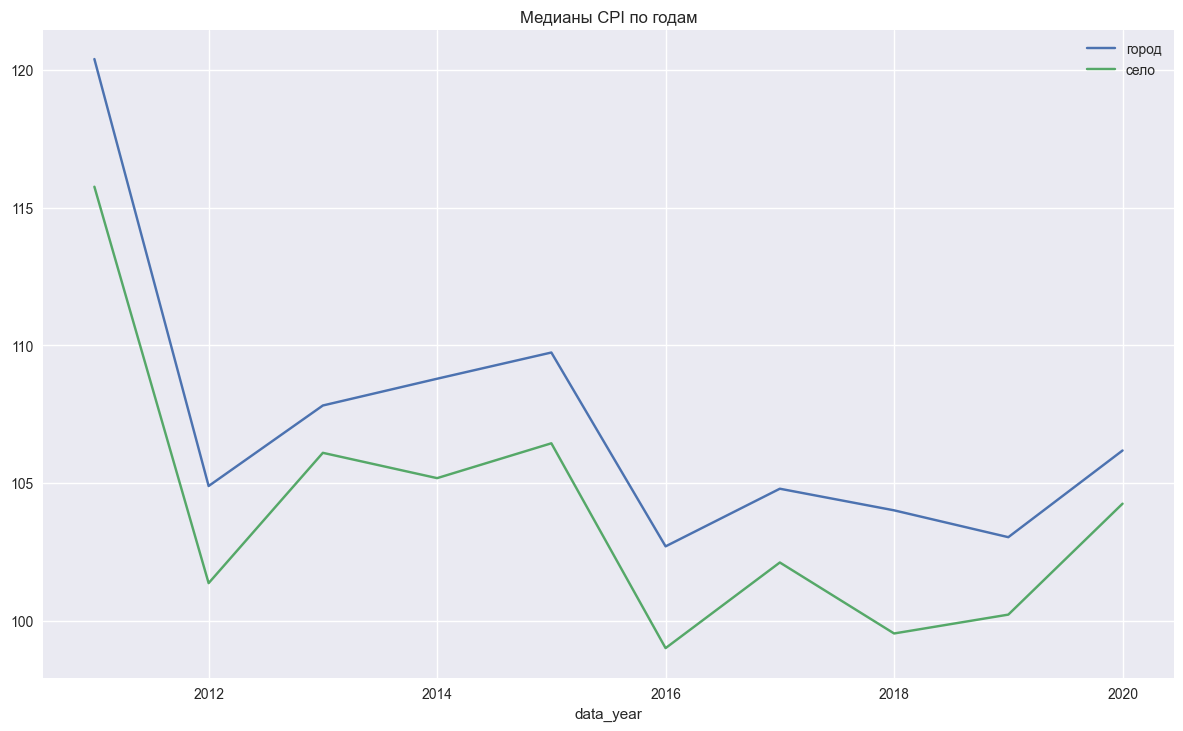

In [587]:
plt.figure(figsize=(13,8))
CPI_year_and_settle_1=all_poverty_data[all_poverty_data['settlement']=='город'].groupby(
    ['data_year'])

CPI_year_and_settle_2=all_poverty_data[all_poverty_data['settlement']=='село'].groupby(
    ['data_year'])

# CPI_year_and_settle[CPI_year_and_settle['settlement']==1]
CPI_year_and_settle_1['cpi_real'].median().plot(label='город')


# CPI_year_and_settle[CPI_year_and_settle['settlement']==2]
CPI_year_and_settle_2['cpi_real'].median().plot(label='село')

plt.title('Медианы CPI по годам')
plt.legend()

plt.grid(True)

In [588]:
x=list(CPI_year_and_settle_1['cpi_real'].median())
y=list(CPI_year_and_settle_2['cpi_real'].median())

print(f'корреляция между медианами городов и сельской местности:\n\
        {np.corrcoef(x,y)[0,1].round(2)}')


корреляция между медианами городов и сельской местности:
        0.98


<h5>Корреляции между числовыми параметрами в нашем датасете</h5>

In [589]:
# Посмотрим какие числовые параметры коррелирует между собой
# Те,у которых корреляция будет свыше 0.7 будут иметь boolean  значения True

d=all_poverty_data[num_cols[0:10]].corr().ge(0.7)

d[d[['c1', 'age', 'kv', 'expfact', 'weight', 'pcc', 'pccf',
       'pline_dc', 'f_linec']]]



c1   age    kv expfact weight   pcc  pccf pline_dc f_linec  CPI
c1        True   NaN   NaN     NaN    NaN   NaN   NaN      NaN     NaN  NaN
age        NaN  True   NaN     NaN    NaN   NaN   NaN      NaN     NaN  NaN
kv         NaN   NaN  True     NaN    NaN   NaN   NaN      NaN     NaN  NaN
expfact    NaN   NaN   NaN    True   True   NaN   NaN      NaN     NaN  NaN
weight     NaN   NaN   NaN    True   True   NaN   NaN      NaN     NaN  NaN
pcc        NaN   NaN   NaN     NaN    NaN  True  True      NaN     NaN  NaN
pccf       NaN   NaN   NaN     NaN    NaN  True  True      NaN     NaN  NaN
pline_dc   NaN   NaN   NaN     NaN    NaN   NaN   NaN     True    True  NaN
f_linec    NaN   NaN   NaN     NaN    NaN   NaN   NaN     True    True  NaN
CPI        NaN   NaN   NaN     NaN    NaN   NaN   NaN      NaN     NaN  NaN

In [590]:
all_poverty_data[num_cols[0:10]].corr().ge(0.7)

c1    age     kv  expfact  weight    pcc   pccf  pline_dc  \
c1         True  False  False    False   False  False  False     False   
age       False   True  False    False   False  False  False     False   
kv        False  False   True    False   False  False  False     False   
expfact   False  False  False     True    True  False  False     False   
weight    False  False  False     True    True  False  False     False   
pcc       False  False  False    False   False   True   True     False   
pccf      False  False  False    False   False   True   True     False   
pline_dc  False  False  False    False   False  False  False      True   
f_linec   False  False  False    False   False  False  False      True   
CPI       False  False  False    False   False  False  False     False   

          f_linec    CPI  
c1          False  False  
age         False  False  
kv          False  False  
expfact     False  False  
weight      False  False  
pcc         False  False  
pccf        False  False  
pline_dc     True  False  
f_linec      True  False  
CPI         False   True

Те которые имеют корелляцию свыше 0.7  имеют значениt True</br>
Коррелируют:   -  pcc&pccf</br>
               -  f_linec & pline_dc   -    food line & povery line by consumption</br>
               -  expfact_weight   -    hhweight & population weight</br>

In [591]:
all_poverty_data[num_cols[10:30]].corr().ge(0.7)

pccddc   cpsc   fpsc    pgc    p2c   fpgc   fp2c  pccserv  pccnf  \
pccddc      True  False  False  False  False  False  False     True  False   
cpsc       False   True  False   True  False  False  False    False  False   
fpsc       False  False   True  False   True   True  False    False  False   
pgc        False   True  False   True   True  False  False    False  False   
p2c        False  False   True   True   True  False  False    False  False   
fpgc       False  False   True  False  False   True   True    False  False   
fp2c       False  False  False  False  False   True   True    False  False   
pccserv     True  False  False  False  False  False  False     True  False   
pccnf      False  False  False  False  False  False  False    False   True   
pccdur     False  False  False  False  False  False  False    False  False   
incpcd     False  False  False  False  False  False  False    False  False   
cpi_real   False  False  False  False  False  False  False    False  False   
cpi_exp    False  False  False  False  False  False  False    False  False   

          pccdur  incpcd  cpi_real  cpi_exp  
pccddc     False   False     False    False  
cpsc       False   False     False    False  
fpsc       False   False     False    False  
pgc        False   False     False    False  
p2c        False   False     False    False  
fpgc       False   False     False    False  
fp2c       False   False     False    False  
pccserv    False   False     False    False  
pccnf      False   False     False    False  
pccdur      True   False     False    False  
incpcd     False    True     False    False  
cpi_real   False   False      True    False  
cpi_exp    False   False     False     True

Коррелируют: 
    </br>pccserv_pccddc -</br>
p2c & fpsc     poverty severity & food poverty status
-</br> fp2c & fpgc    extreme povery severity & extreme poverty gap
</br> pccddc &       pccserv Per capita daily consumption deflated 


<h3>Рассмотрим тенденции по годам</h3> 

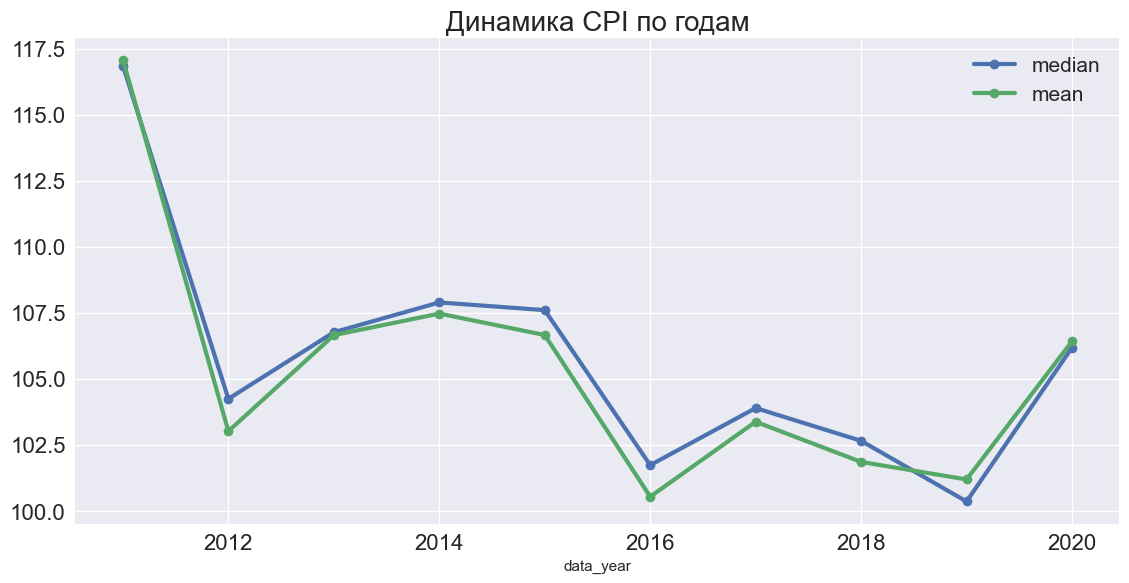

median  mean
data_year              
2011        1.002 1.004
2012        1.014 1.002
2013        1.001 1.000
2014        1.004 1.000
2015        1.010 1.001
2016        1.013 1.001
2017        1.007 1.002
2018        1.011 1.003
2019        0.993 1.001
2020        0.999 1.001

In [592]:
year_group = all_poverty_data.groupby(['data_year'])

year_group.cpi_real.agg(['median', 'mean']).plot(
    marker='o', linewidth=3,
    figsize=(12,6), fontsize=16
    )
plt.title('Динамика CPI по годам',fontsize=20)
plt.legend(fontsize=15)
plt.grid(True)


plt.show()
year_group.CPI.agg(['median','mean'])

In [593]:
all_poverty_data.loc[filt]['cpi_real']

18218   109.843
18219   109.843
18220   109.843
18221   109.843
18222   109.843
          ...  
11997   115.115
11998   115.115
11999   115.115
12000   115.115
12001   115.115
Name: cpi_real, Length: 10264, dtype: float64

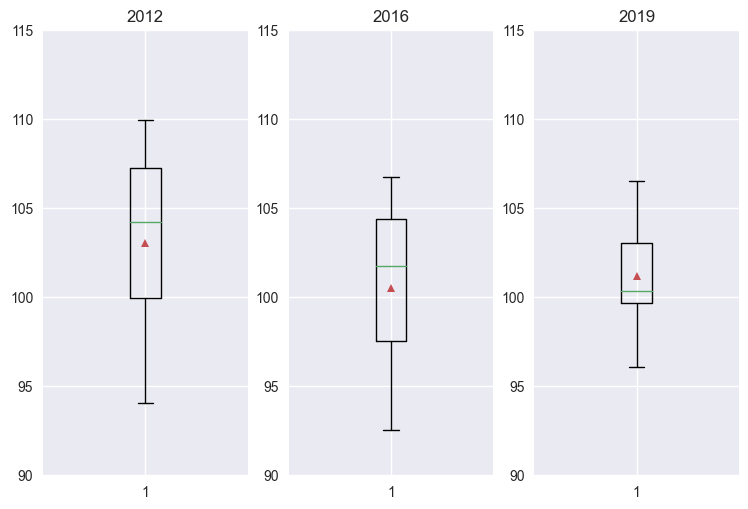

In [594]:
#Фильтр датасета за определенный год
fig,ax=plt.subplots(1,3)
# fig.subtitle('CPI для 2012 2016 и 2020' )
filt = (all_poverty_data['data_year']==2012) #&(all_poverty_data['settlement']==1)
filt2 = (all_poverty_data['data_year']==2016)
filt3 = (all_poverty_data['data_year']==2019)

ax[0].boxplot(all_poverty_data.loc[filt]['cpi_real'], showmeans=True, )
ax[0].set_title('2012')
ax[0].set_yticks(np.arange(90,120,5))

ax[1].boxplot(all_poverty_data.loc[filt2]['cpi_real'], showmeans=True)
ax[1].set_title('2016')
ax[1].set_yticks(np.arange(90,120,5))

ax[2].boxplot(all_poverty_data.loc[filt3]['cpi_real'], showmeans=True)
ax[2].set_title('2019')
ax[2].set_yticks(np.arange(90,120,5))

plt.show()




 корреляция между mean&median  в Исс: 0.99
 корреляция между mean&median  в Джа: 0.99
 корреляция между mean&median  в Нар: 0.98
 корреляция между mean&median  в Бат: 0.96
 корреляция между mean&median  в Ошс: 0.96
 корреляция между mean&median  в Тал: 0.98
 корреляция между mean&median  в Чуй: 1.0
 корреляция между mean&median  в Биш: 1.0
 корреляция между mean&median  в Ош: 1.0


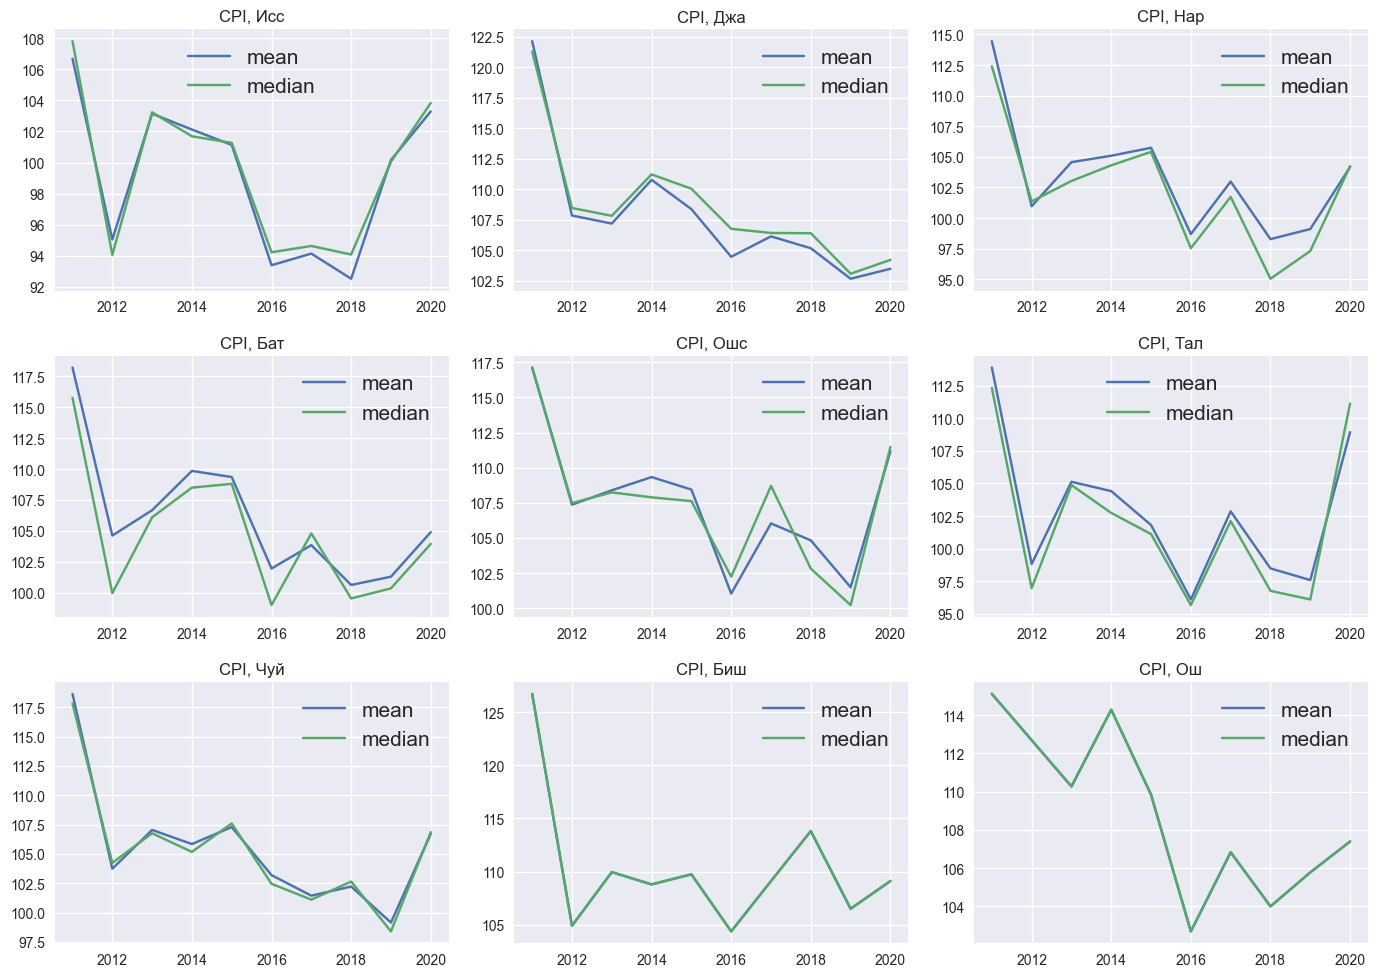

In [595]:
plt.style.use('seaborn')

#сократим название датасета
all=all_poverty_data

fig, axes=plt.subplots(3,3, figsize=(14,10))

oblast_list=list(all.oblast_short.unique())

n=0
for i in range(3):
    for j in range(3):

        filt=(all['oblast_short']==oblast_list[n])
        oblast_mean=all.loc[filt].groupby('data_year')['cpi_real'].agg(['mean','median'])

        axes[i][j].plot(oblast_mean,label=['mean','median'])
        axes[i][j].set_title(f'CPI, {oblast_list[n]}')
        axes[i][j].legend(fontsize=15)
        
   

        corr=(oblast_mean.corr()['median'][0]).round(2)
        print(f' корреляция между mean&median  в {oblast_list[n]}: {corr}')
        n+=1

        
fig.tight_layout()
plt.show()

Из графиков выше видно, что в 2016 году разницу в медиане и средней дает регион: Баткен, Джалал-Абад Ош и Нарын.
    В 2012 году это были:Баткен, Талас. 

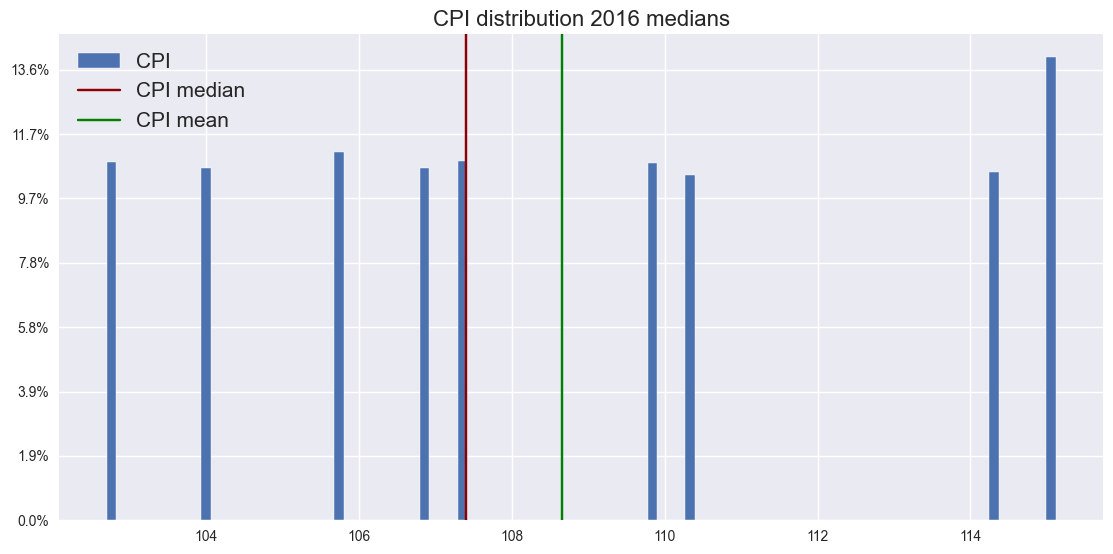

standart deviation: 4.15
mean 108.658, median 107.399


In [596]:
from matplotlib.ticker import PercentFormatter


CPI_dist = all_poverty_data.loc[filt]['cpi_real']
CPI_dist.hist(bins=100, figsize=(12,6), ec='w', label='CPI')
plt.axvline(median_cpi, color='darkred', label='CPI median')
plt.axvline(mean_cpi, color='green', label='CPI mean')
plt.title('CPI distribution 2016 medians', fontsize=16)

plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=len(CPI_dist)))
plt.legend(fontsize=15)
plt.show()

std=all_poverty_data.loc[filt]['cpi_real'].std().round(3)
print(f'standart deviation: {std}')
print(f'mean {mean_cpi.round(3)}, median {median_cpi.round(3)}')
CPI_dist=all_poverty_data.loc[filt]['cpi_real']


In [597]:
filt=all_poverty_data.data_year==2013
for col in all_poverty_data.loc[filt].columns:
    uniq=all_poverty_data.loc[filt][col].nunique()
    print(f'{col}:   {uniq}\n ') #{uniq}\n


hh_code:   5013
 
kvartal:   1
 
mon:   3
 
c1:   17
 
gender:   2
 
relative:   14
 
age:   100
 
merital_st:   7
 
education:   11
 
settlement:   2
 
oblast:   9
 
obl_reg:   16
 
kv:   4
 
expfact:   3865
 
weight:   3882
 
pcc:   5013
 
pccf:   5013
 
pline_dc:   1
 
f_linec:   1
 
CPI:   16
 
pccddc:   5013
 
cpsc:   2
 
fpsc:   2
 
pgc:   1273
 
p2c:   1273
 
fpgc:   85
 
fp2c:   85
 
pccserv:   4818
 
pccnf:   4780
 
pccdur:   4920
 
incpcd:   4531
 
data_year:   1
 
cpi_real:   16
 
cpi_exp:   3853
 
oblast_short:   9
 
age_range:   4
 


obl_reg column имеет тоже количество уникальных значений как CPI
Попробуем группировать по obl_reg

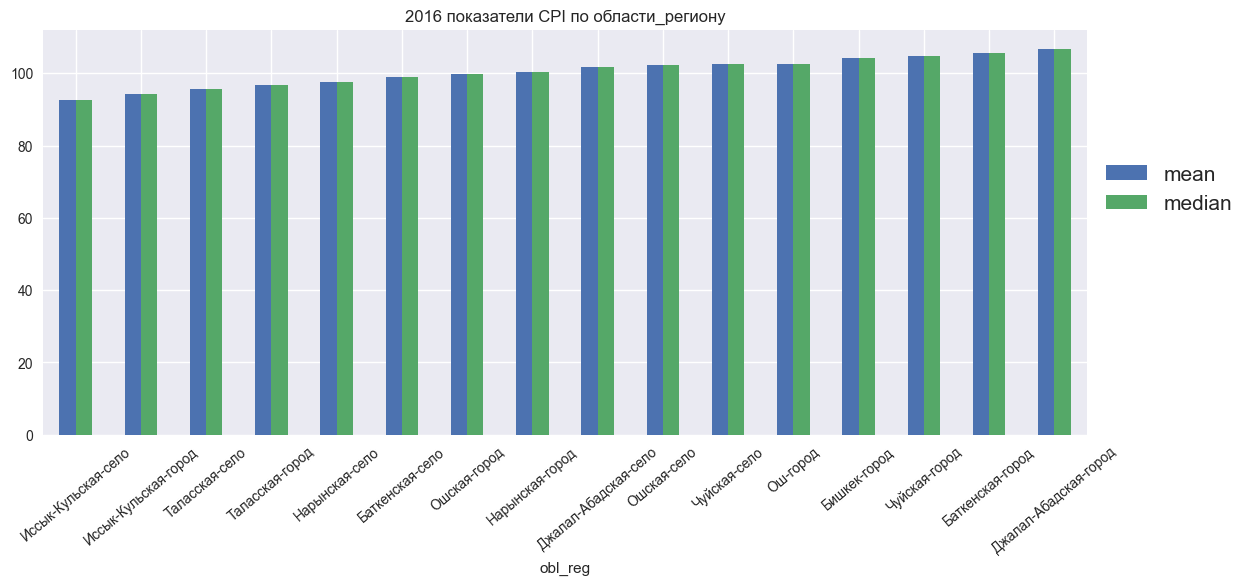

In [598]:
filt=all_poverty_data.data_year==2016
all_poverty_data.loc[filt].groupby(['obl_reg']).cpi_real\
                .agg(['mean','median']).sort_values(by='mean')\
                .plot(kind='bar', figsize=(12,5))

plt.xticks(rotation=40)
plt.title('2016 показатели CPI по области_региону')
plt.legend(fontsize=15,loc=3,bbox_to_anchor=(1., 0.5))
plt.grid(True)
plt.savefig('')
plt.show()

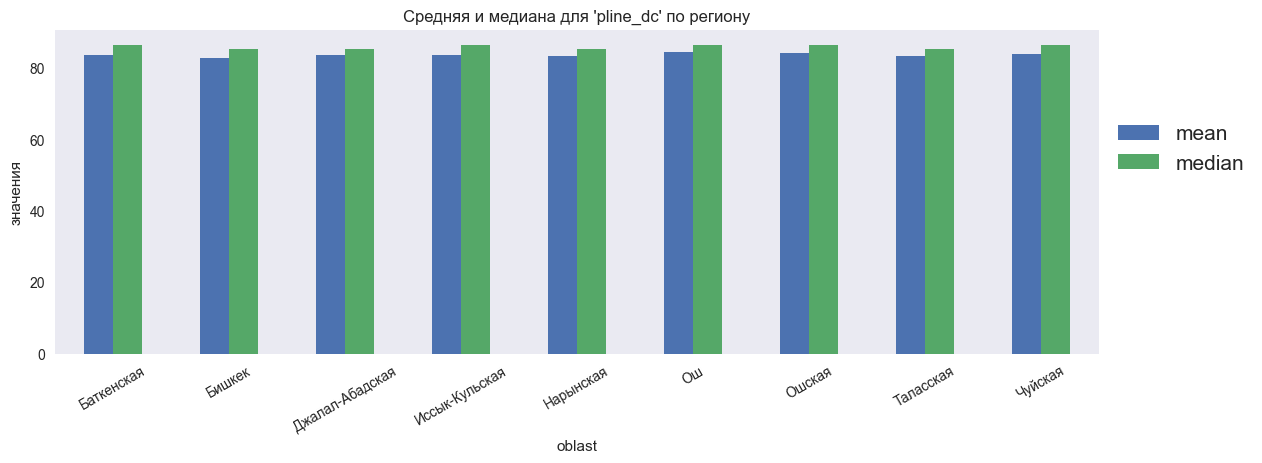

In [599]:
# "Средняя и медиана для 'pline_dc' по региону"

oblast_grp = all_poverty_data.groupby('oblast')

oblast_grp['pline_dc'].agg(['mean','median']).plot(kind='bar', linewidth=1, figsize=(12,4))
plt.title("Средняя и медиана для 'pline_dc' по региону")
plt.ylabel("значения")
plt.xticks(rotation=30)

plt.legend(fontsize=15,loc=3,bbox_to_anchor=(1., 0.5))
plt.grid()

plt.show()


In [600]:
oblast_grp['pline_dc'].agg(['mean','median']).mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of                   mean  median
oblast                        
Баткенская      83.701  86.500
Бишкек          83.010  85.330
Джалал-Абадская 83.643  85.330
Иссык-Кульская  83.664  86.500
Нарынская       83.602  85.330
Ош              84.584  86.500
Ошская          84.258  86.500
Таласская       83.530  85.330
Чуйская         83.964  86.500>

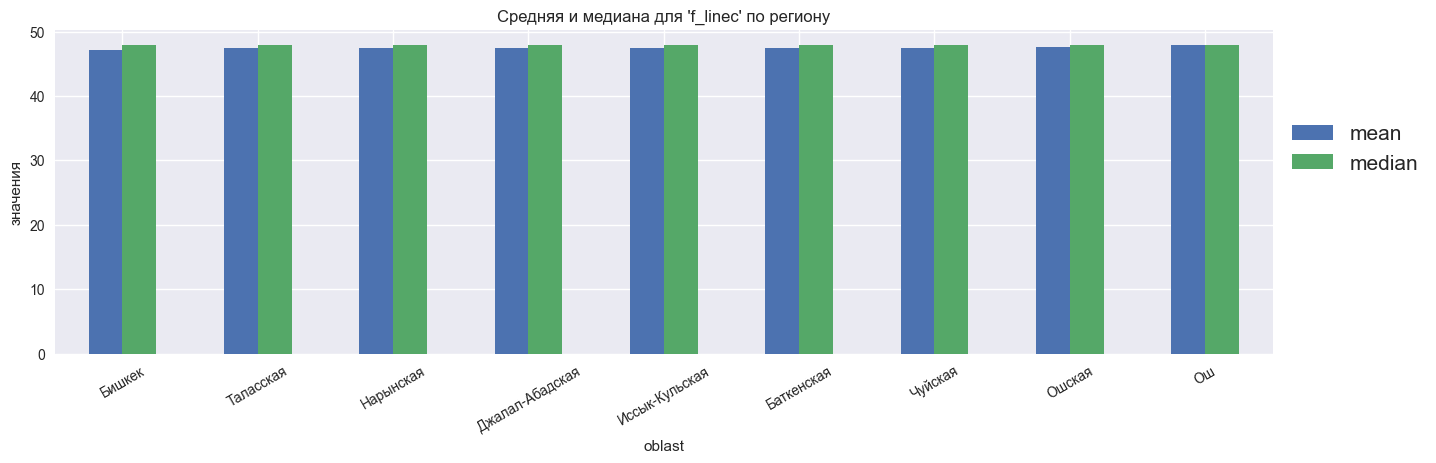

In [601]:
# "Средняя и медиана для 'f_linec' по региону"
oblast_grp['f_linec'].agg(['mean','median']).sort_values(by='mean').plot(kind='bar', figsize=(14,4), grid=True)
plt.title("Средняя и медиана для 'f_linec' по региону")
plt.ylabel("значения")
plt.xticks(rotation=30,alpha=1)
plt.legend(fontsize=15,loc=3,bbox_to_anchor=(1., 0.5))

plt.show()

In [602]:
oblast_grp['f_linec'].agg(['mean','median'])

mean  median
oblast                        
Баткенская      47.430  47.860
Бишкек          47.193  47.860
Джалал-Абадская 47.407  47.860
Иссык-Кульская  47.408  47.860
Нарынская       47.393  47.860
Ош              47.874  47.860
Ошская          47.541  47.860
Таласская       47.373  47.860
Чуйская         47.511  47.860

In [603]:
#Убедимся, что медиана  'f_linec' имеет одинаковое значение
oblast_grp['f_linec'].median()

oblast
Баткенская        47.860
Бишкек            47.860
Джалал-Абадская   47.860
Иссык-Кульская    47.860
Нарынская         47.860
Ош                47.860
Ошская            47.860
Таласская         47.860
Чуйская           47.860
Name: f_linec, dtype: float64

In [604]:
all_poverty_data.columns

Index(['hh_code', 'kvartal', 'mon', 'c1', 'gender', 'relative', 'age',
       'merital_st', 'education', 'settlement', 'oblast', 'obl_reg', 'kv',
       'expfact', 'weight', 'pcc', 'pccf', 'pline_dc', 'f_linec', 'CPI',
       'pccddc', 'cpsc', 'fpsc', 'pgc', 'p2c', 'fpgc', 'fp2c', 'pccserv',
       'pccnf', 'pccdur', 'incpcd', 'data_year', 'cpi_real', 'cpi_exp',
       'oblast_short', 'age_range'],
      dtype='object')

Сгруппируем некоторые категории образования

In [605]:

all_poverty_data.education.replace({
                                    'Основное общее (неполное среднее)':'Среднее',
                                    'Среднее (полное) общее':'Среднее',
                                    'В возрасте от 0 до 5 лет включительно':'возраст 0-5 лет',
                                    'Нет  начального образования': 'Без образования',
                                    'Неграмотный':'Без образования',
                                    'Незаконченное высшее':'Высшее',
                                    'Начальное профессиональное без получениея среднего образования': 'Начальное профессиональное',
                                    'Начальное профессиональное с получением среднего образования': 'Начальное профессиональное'                                 
                                   },inplace=True)

all_poverty_data.education.unique()

['Среднее', 'возраст 0-5 лет', 'Начальное', 'Без образования', 'Высшее', 'Среднее профессиональное', 'Начальное профессиональное']
Categories (7, object): ['возраст 0-5 лет', 'Высшее', 'Начальное', 'Начальное профессиональное', 'Без образования', 'Среднее', 'Среднее профессиональное']

In [606]:
#Количественное распределение по уровню образования 

# no need


# params = {'axes.titlesize':'25',
#           'xtick.labelsize':'20',
#           'ytick.labelsize':'20',
#         }
# plt.rcParams.update(params)

# plt.figure(figsize=(16,6))


# #Если взять за один конкретный год
# data_edu=all_poverty_data[(all_poverty_data.education!='возраст 0-5 лет')&(all_poverty_data.data_year==2020)]

# data_edu.education.count()
# bars=sns.countplot('education',data=data_edu,
#              order = data_edu['education'].value_counts().index[:-1])

# plt.xticks(rotation=20, fontsize=20)


# for p in bars.patches:
#     print(p)
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy() 
#     bars.annotate(f'{height/data_edu.shape[0]:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize=20)


# plt.show()

# bars

In [607]:
data_edu.shape

(167242, 36)

Rectangle(xy=(-0.4, 0), width=0.8, height=281987, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=497426, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=764512, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=800971, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=858310, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=2.60712e+06, angle=0)


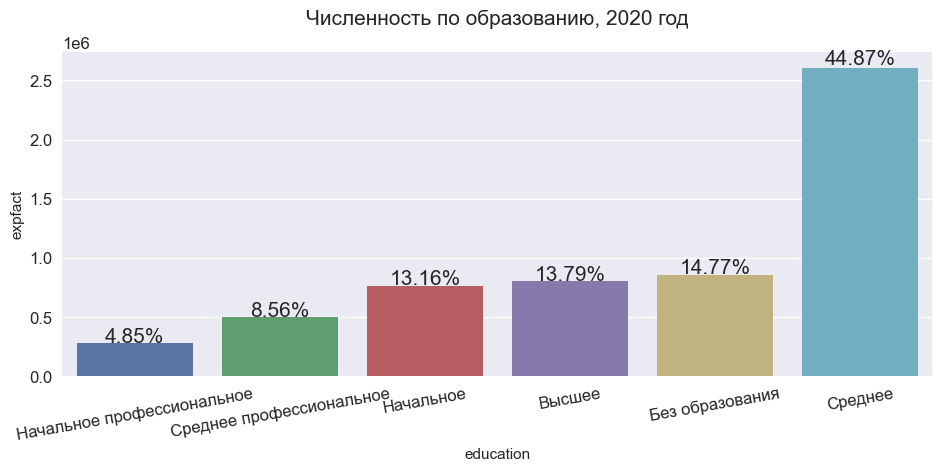

In [686]:
plt.figure(figsize=(10,4))


params = {'axes.titlesize':'15',
          'xtick.labelsize':'12',
          'ytick.labelsize':'12',

        }
plt.rcParams.update(params)

data_edu=all_poverty_data[(all_poverty_data.education!='возраст 0-5 лет')&(all_poverty_data.data_year==2020)]

filt=(all_poverty_data.education!='возраст 0-5 лет')&(all_poverty_data.data_year==2020)
order = all_poverty_data.loc[filt].groupby('education').agg({'expfact':'sum'}).sort_values(by='expfact')[1::]

bars = sns.barplot(x='education', y='expfact', data=data_edu, estimator=sum, order=order.index, ci=None )


for p in bars.patches:
    print(p)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    bars.annotate(f'{height/data_edu.expfact.sum():.2%}', (x + width/2, y + height*1.01), 
                  ha='center', fontsize=15)
plt.xticks(rotation=10,)

plt.title('Численность по образованию, 2020 год')
plt.show()



Rectangle(xy=(-0.4, 0), width=0.8, height=315574, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=483423, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=560010, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=610914, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=794048, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=2.16325e+06, angle=0)


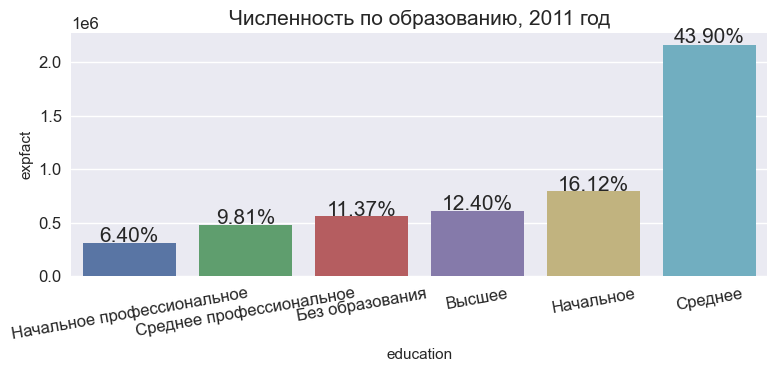

In [609]:
plt.figure(figsize=(8,3))


params = {'axes.titlesize':'15',
          'xtick.labelsize':'12',
          'ytick.labelsize':'12',

        }
plt.rcParams.update(params)

data_edu=all_poverty_data[(all_poverty_data.education!='возраст 0-5 лет')&(all_poverty_data.data_year==2011)]

filt=(all_poverty_data.education!='возраст 0-5 лет')&(all_poverty_data.data_year==2011)
order = all_poverty_data.loc[filt].groupby('education').agg({'expfact':'sum'}).sort_values(by='expfact')[1::]

bars = sns.barplot(x='education', y='expfact', data=data_edu, estimator=sum, order=order.index, ci=None )


for p in bars.patches:
    print(p)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    bars.annotate(f'{height/data_edu.expfact.sum():.2%}', (x + width/2, y + height*1.01), ha='center', fontsize=15)

plt.xticks(rotation=10,)
plt.title('Численность по образованию, 2011 год')
plt.show()

In [610]:
all_poverty_data[(all_poverty_data.age==28)&(all_poverty_data.data_year==2020)].expfact.value_counts()

median_age = sum(all_poverty_data.age*all_poverty_data.expfact)/all_poverty_data.expfact.sum()



all_poverty_data.age.value_counts()

all_poverty_data.age_range.value_counts()

18-61     95477
6-18      51165
0-6       24357
61-110    15451
Name: age_range, dtype: int64

Rectangle(xy=(-0.4, 0), width=0.8, height=3802.94, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=1226.21, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=1178.72, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=1166.98, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=841.809, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=511.003, angle=0)


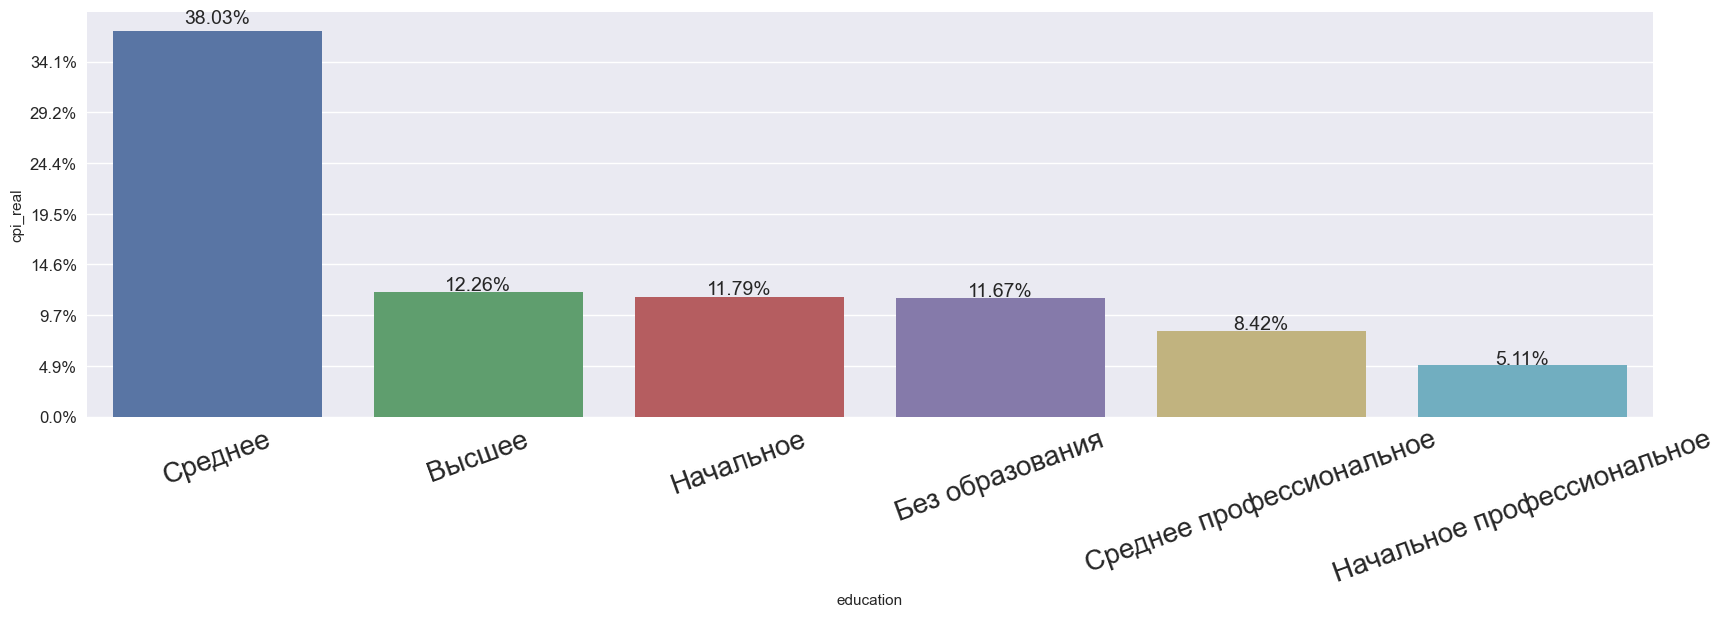

In [611]:
#Распределение по уровню образования(доля) 

from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(18,5))
order_list=[ 'Среднее', 'Высшее', 'Начальное', 'Без образования',
            'Среднее профессиональное','Начальное профессиональное']
data_edu=all_poverty_data[all_poverty_data.education!='возраст 0-5 лет']

plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=len(CPI_dist)))
s=sns.barplot(x='education', y='cpi_real',data=data_edu, estimator=lambda x: len(x)/ len(all_poverty_data)*10000 ,
       order =order_list )
plt.xticks(rotation=20, fontsize=20)

for p in s.patches:
    print(p)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    s.annotate(f'{height/10000:.2%}', (x + width/2, y + height*1.02), ha='center')


plt.show()



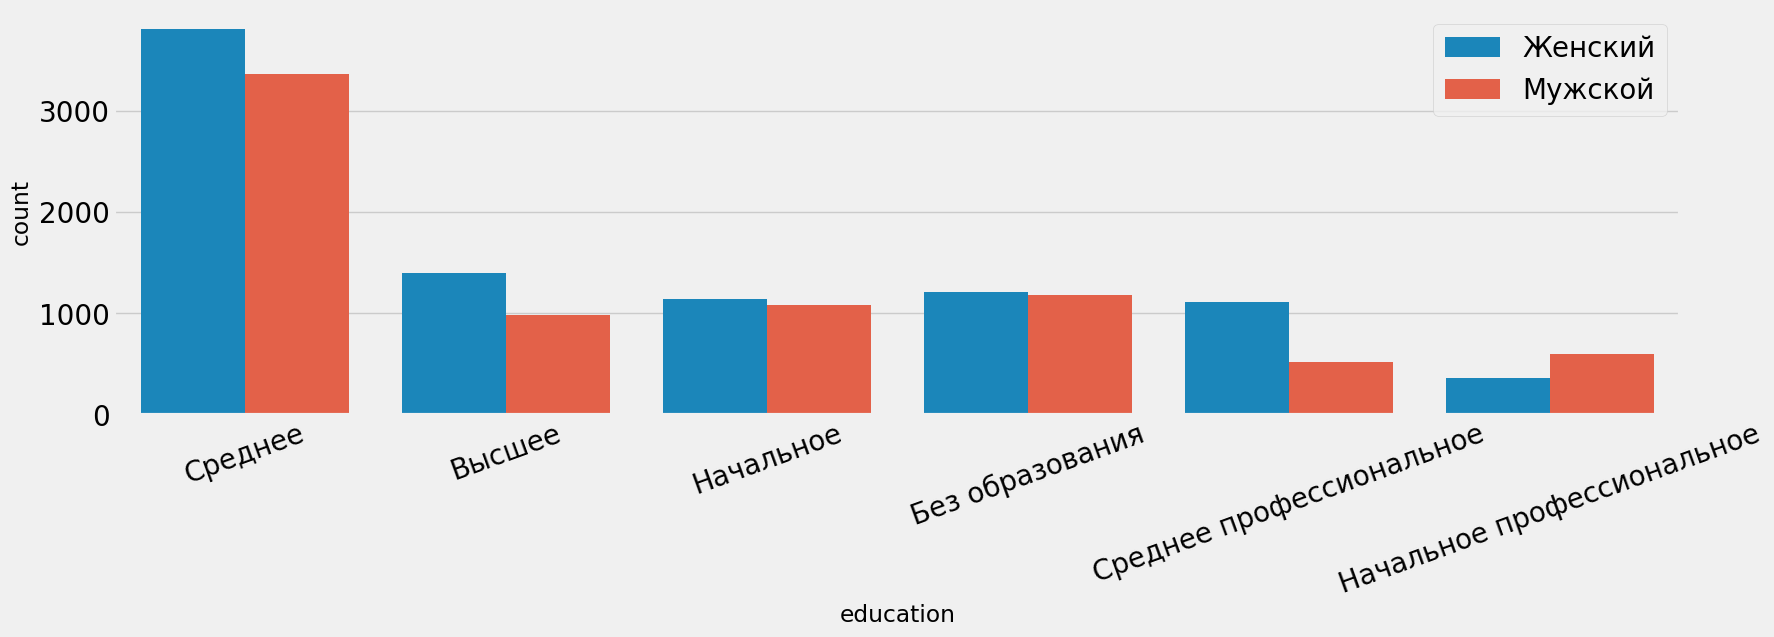

In [612]:
plt.style.use('default')
plt.style.use( 'fivethirtyeight')

plt.figure(figsize=(18,5))
params = {'axes.titlesize':'25',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20',
        }
plt.rcParams.update(params)


x_list=np.arange(0,100,5)
sns.countplot( x='education',hue='gender', data=all_poverty_data[all_poverty_data.data_year==2020],
             order =order_list)
plt.xticks(rotation=20, fontsize=20)
plt.legend(fontsize=20)

plt.show()

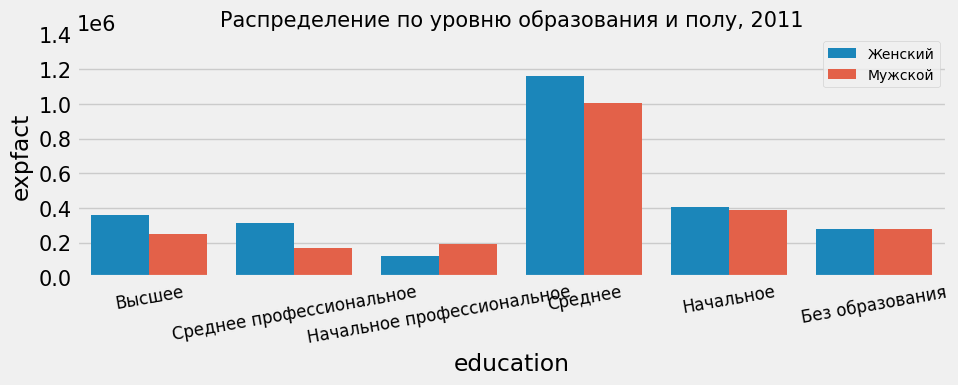

In [613]:
plt.style.use('default')
plt.style.use( 'fivethirtyeight')

plt.figure(figsize=(10,3))
params = {'axes.titlesize':'15',
          'xtick.labelsize':'12',
          'ytick.labelsize':'15',
        }
plt.rcParams.update(params)


x_list=np.arange(0,100,5)
sns.barplot( x='education',y='expfact',hue='gender',estimator=sum, 
            data=all_poverty_data[all_poverty_data.data_year==2011],
                         order =order_list2, ci=None)
plt.xticks(rotation=10)
plt.yticks(range(0,1500000,200000))
plt.title('Распределение по уровню образования и полу, 2011')
plt.legend(fontsize=10)

plt.show()

<Figure size 1800x1000 with 0 Axes>

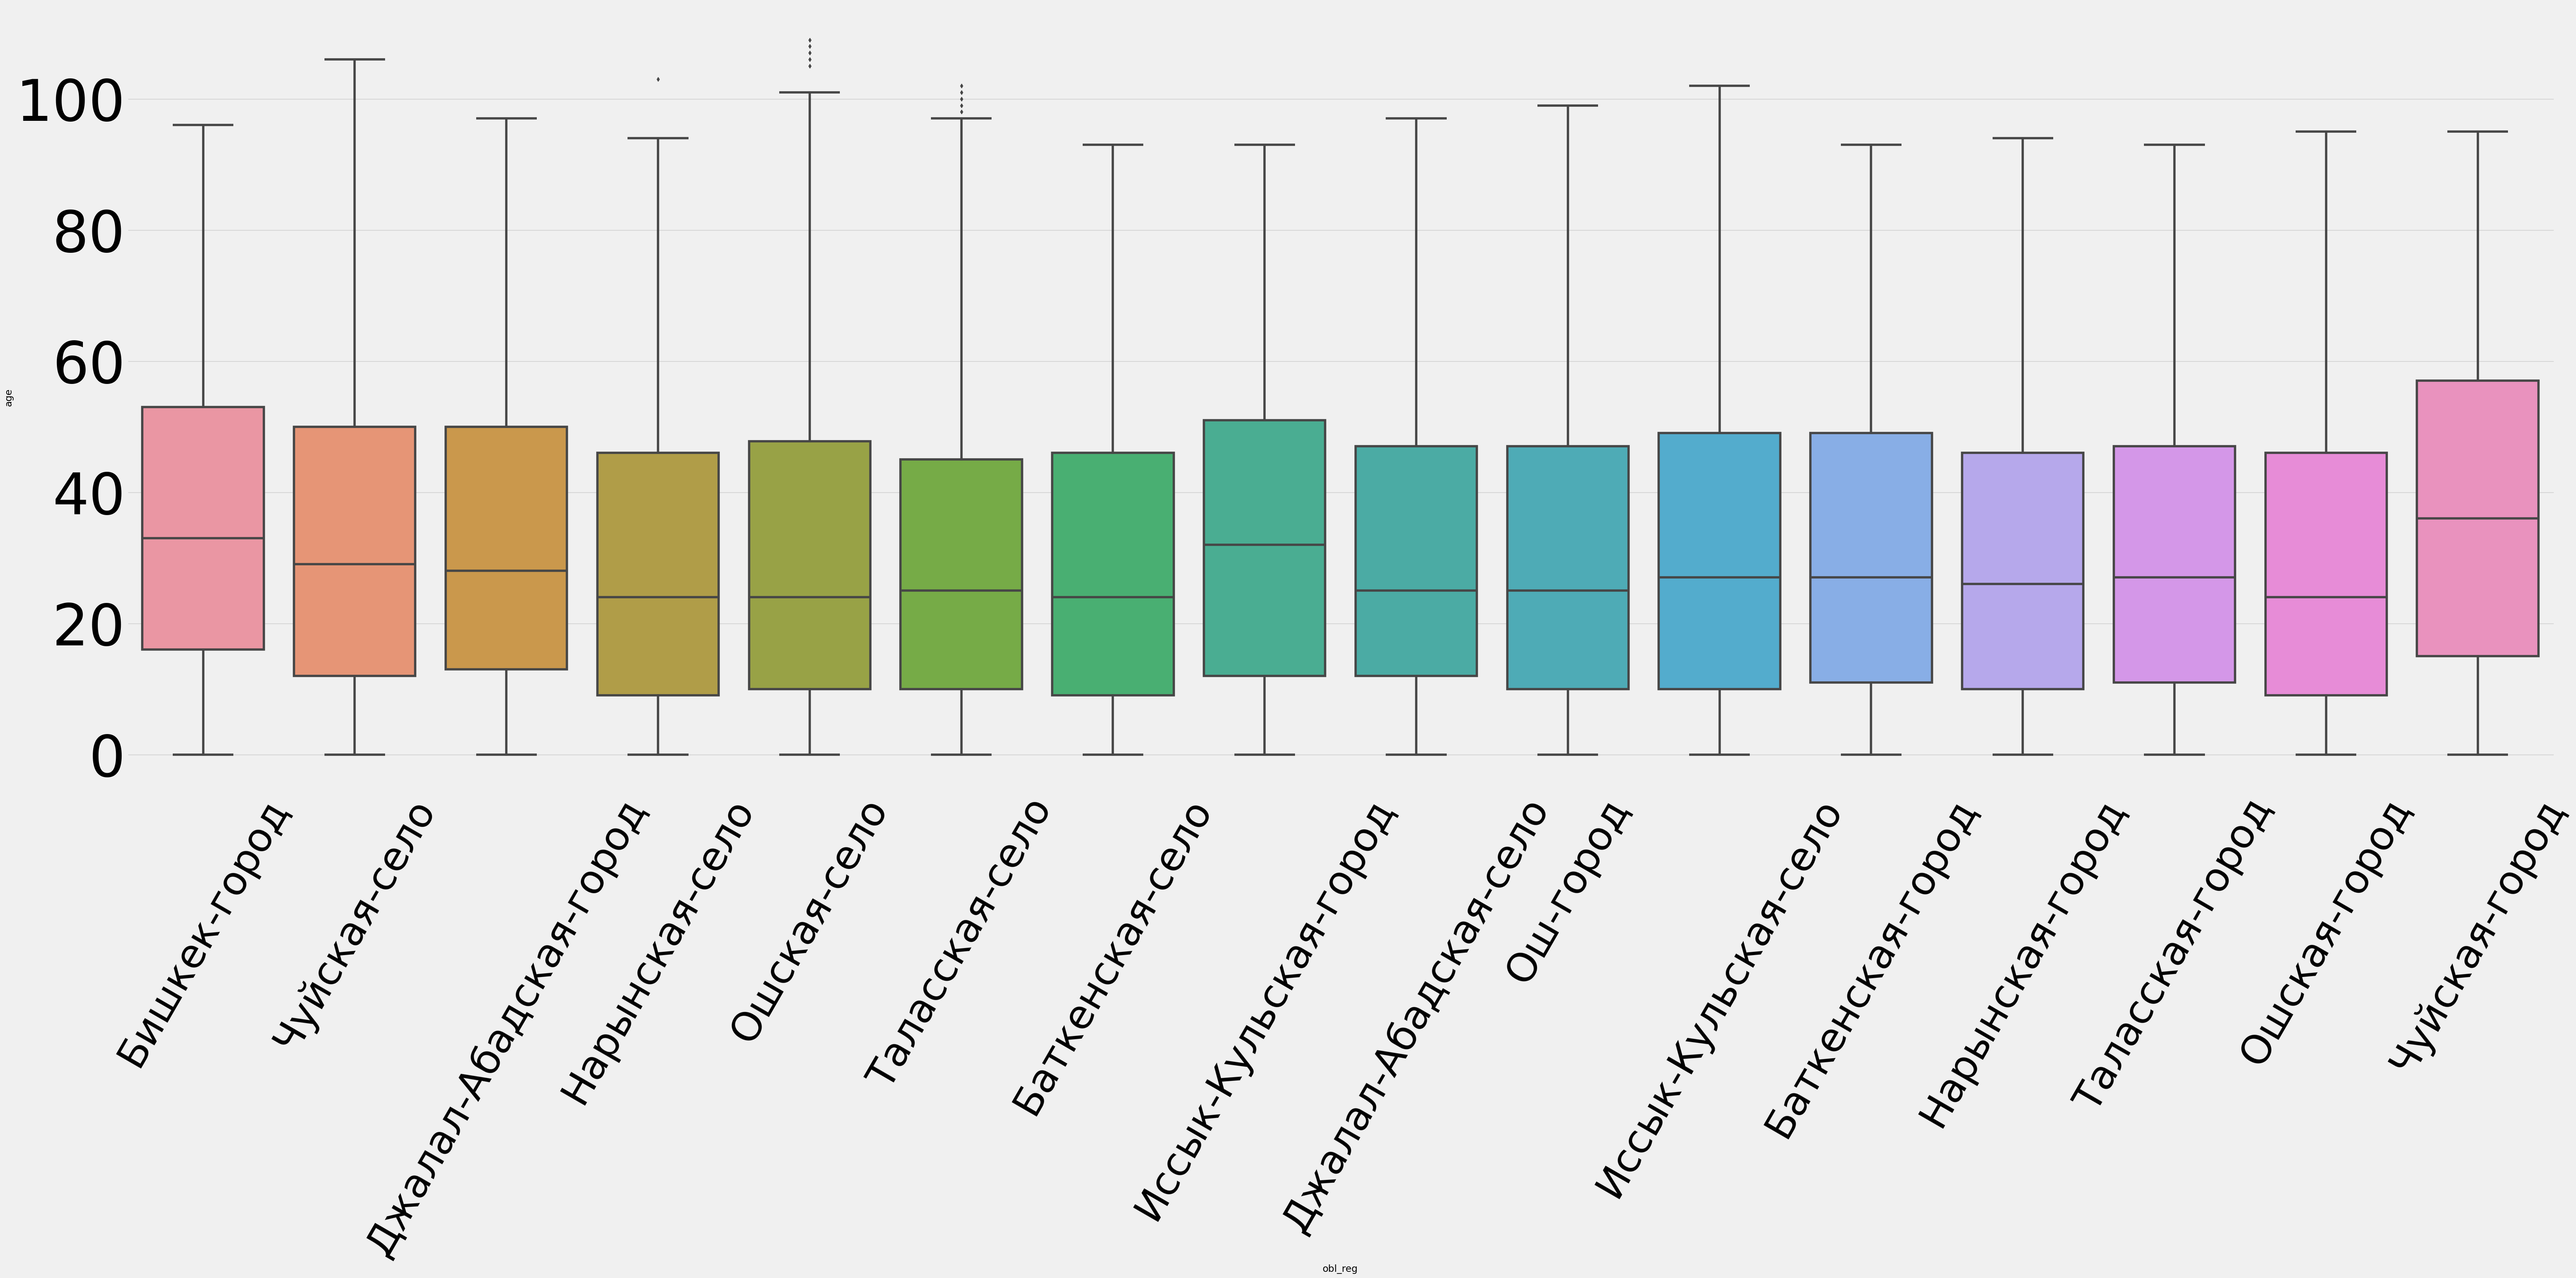

In [614]:
plt.figure(figsize=(18,10))

x_list=np.arange(0,100,5)
sns.catplot( x='obl_reg', y='age', data=all_poverty_data, kind='box',height=20, aspect=3,
             order = all_poverty_data['obl_reg'].value_counts().index)
plt.xticks(rotation=60, fontsize=70)
plt.yticks( fontsize=100)
plt.show()


In [615]:
all_poverty_data.age

0       17.000
1       45.000
2        3.000
3       49.000
4       40.000
         ...  
18452   65.000
18453   59.000
18454   49.000
18455    0.000
18456   85.000
Name: age, Length: 191623, dtype: float64

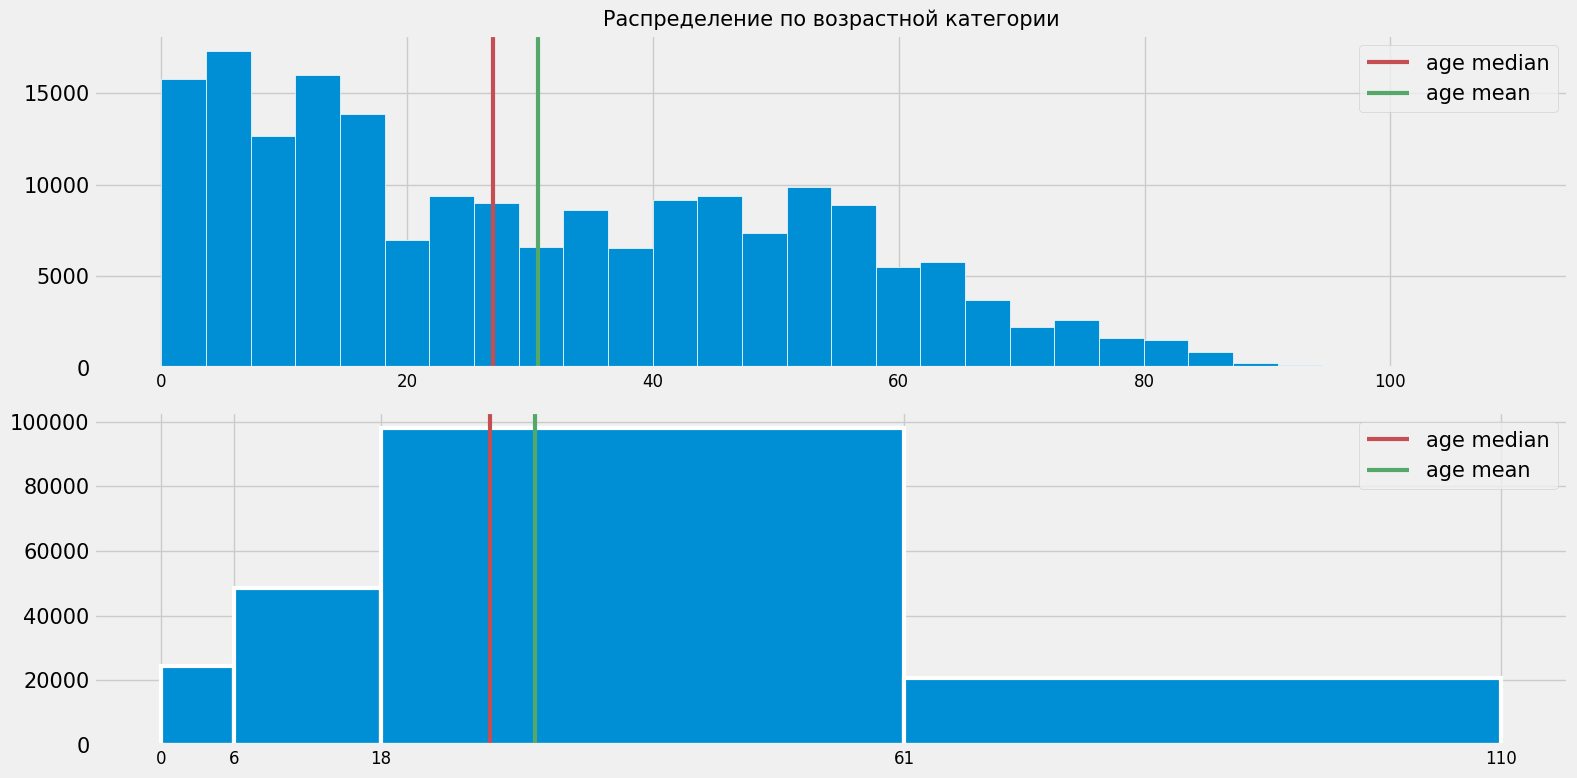

In [616]:

# all_poverty_data.groupby('age').CPI.mean().hist(bins=30)
fig, ax=plt.subplots(2,figsize=(16,8))

median_age=all_poverty_data.age.median()
mean_age=all_poverty_data.age.mean()

ax[0].axvline(median_age,color='r', label='age median', linewidth=3)
ax[0].axvline(mean_age,color='g', label='age mean', linewidth=3)
ax[1].axvline(median_age,color='r', label='age median', linewidth=3)
ax[1].axvline(mean_age,color='g', label='age mean', linewidth=3)

# ax[0].hist(all_poverty_data.age, bins=[0,10,20,30,40,50,60,70,80,90,100],  )
ax[0].hist(all_poverty_data.age, bins=30, edgecolor='white' )
ax[0].set_title('Распределение по возрастной категории')

ax[1].hist(all_poverty_data.age, bins=[0,6,18,61,110], edgecolor='white', linewidth=3)
# ax[1].hist(all_poverty_data.age, bins=20  )

ax[1].set_xticks(ticks=[0,6,18,61,110]) # 61- возраст где квантиль=0.9

ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

plt.tight_layout()
plt.show()
None

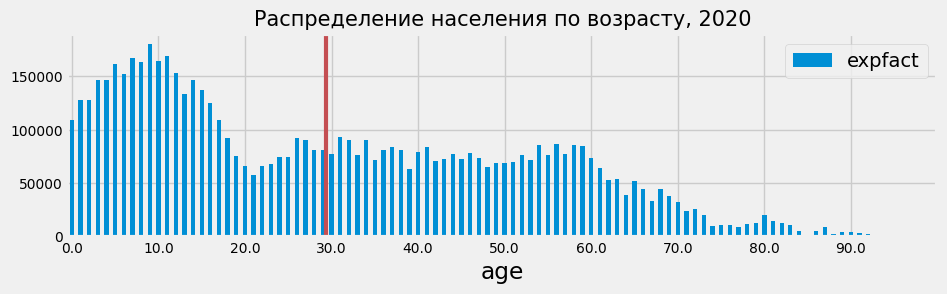

In [617]:

age_data=all_poverty_data[all_poverty_data.data_year==2020].groupby('age').expfact.sum().reset_index()

age_data.plot(x='age', kind='bar',figsize=(10,2.5))

weighted_age =sum(all_poverty_data.age*all_poverty_data.expfact)/all_poverty_data.expfact.sum()

plt.axvline(weighted_age,color='r', label='age median', linewidth=3)
plt.xticks(range(0,110,10), rotation='horizontal', fontsize=10)
plt.yticks( fontsize=10)
plt.title('Распределение населения по возрасту, 2020')

None

Rectangle(xy=(-0.25, 0), width=0.5, height=819287, angle=0)
Rectangle(xy=(0.75, 0), width=0.5, height=1.89573e+06, angle=0)
Rectangle(xy=(1.75, 0), width=0.5, height=3.23273e+06, angle=0)
Rectangle(xy=(2.75, 0), width=0.5, height=546248, angle=0)


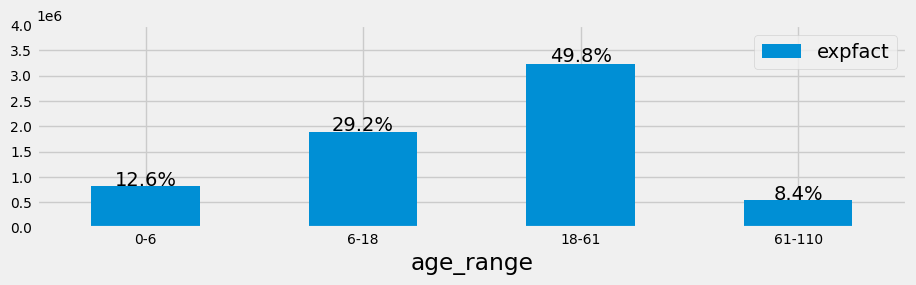

In [639]:
weighted_age =sum(all_poverty_data.age*all_poverty_data.expfact)/all_poverty_data.expfact.sum()

age_data=all_poverty_data[all_poverty_data.data_year==2020]\
            .groupby('age_range').expfact.sum().reset_index()
            
age_data.age_range=pd.Categorical(age_data.age_range,categories=['0-6','6-18', '18-61', '61-110'])
age_data=age_data.sort_values('age_range')

age_data_plt=age_data.plot(x='age_range', kind='bar',figsize=(10,2.5))

for p in age_data_plt.patches:
    print(p)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    age_data_plt.annotate(f'{height/age_data.expfact.sum():.1%}', (x + width/2, y + height*1.01), ha='center')


plt.axvline(weighted_age,color='r', label='age median', linewidth=3)
plt.xticks(rotation='horizontal', fontsize=10)
plt.yticks(range(0,4100000,500000), fontsize=10)

None


In [619]:
all_poverty_data[(all_poverty_data.age==28)&(all_poverty_data.data_year==2020)].expfact.value_counts()

sum(all_poverty_data.age*all_poverty_data.expfact)/all_poverty_data.expfact.sum()

median_age

all_poverty_data.age.value_counts()

all_poverty_data.age_range.value_counts()

18-61     95477
6-18      51165
0-6       24357
61-110    15451
Name: age_range, dtype: int64

In [620]:
all_poverty_data.age_range.unique()

array(['6-18', '18-61', '0-6', '61-110', None], dtype=object)

In [621]:
all_poverty_data.age.describe()

count   191623.000
mean        30.665
std         22.059
min          0.000
25%         11.000
50%         27.000
75%         49.000
max        109.000
Name: age, dtype: float64

In [622]:
all_poverty_data.age.quantile(0.9)

61.0

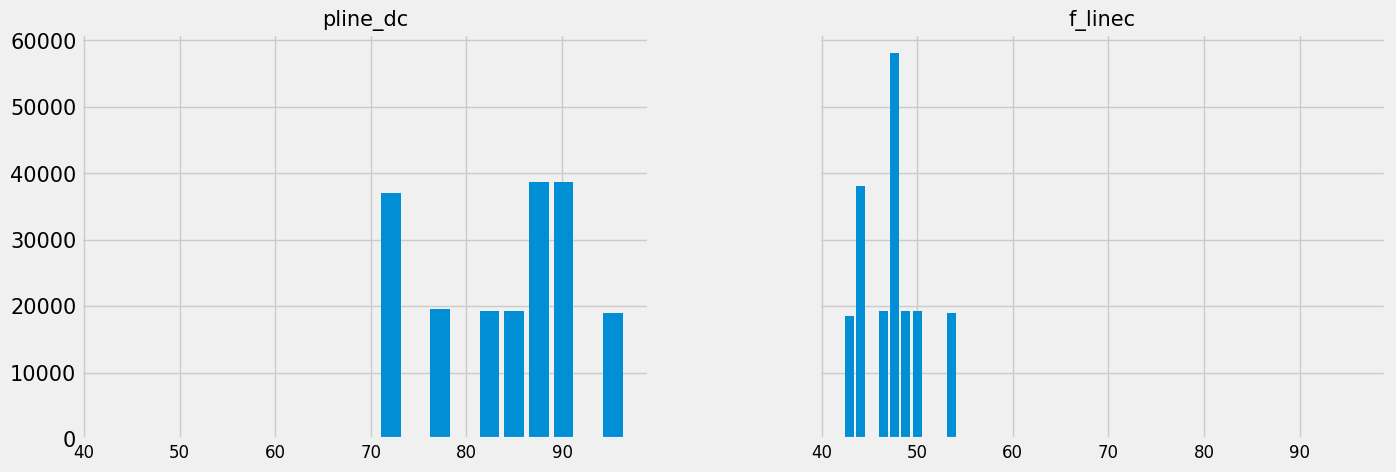

In [623]:

all_poverty_data[['pline_dc', 'f_linec']].hist(bins=10,figsize=(15,5),rwidth=0.8, sharex=True,sharey=True)
plt.show()

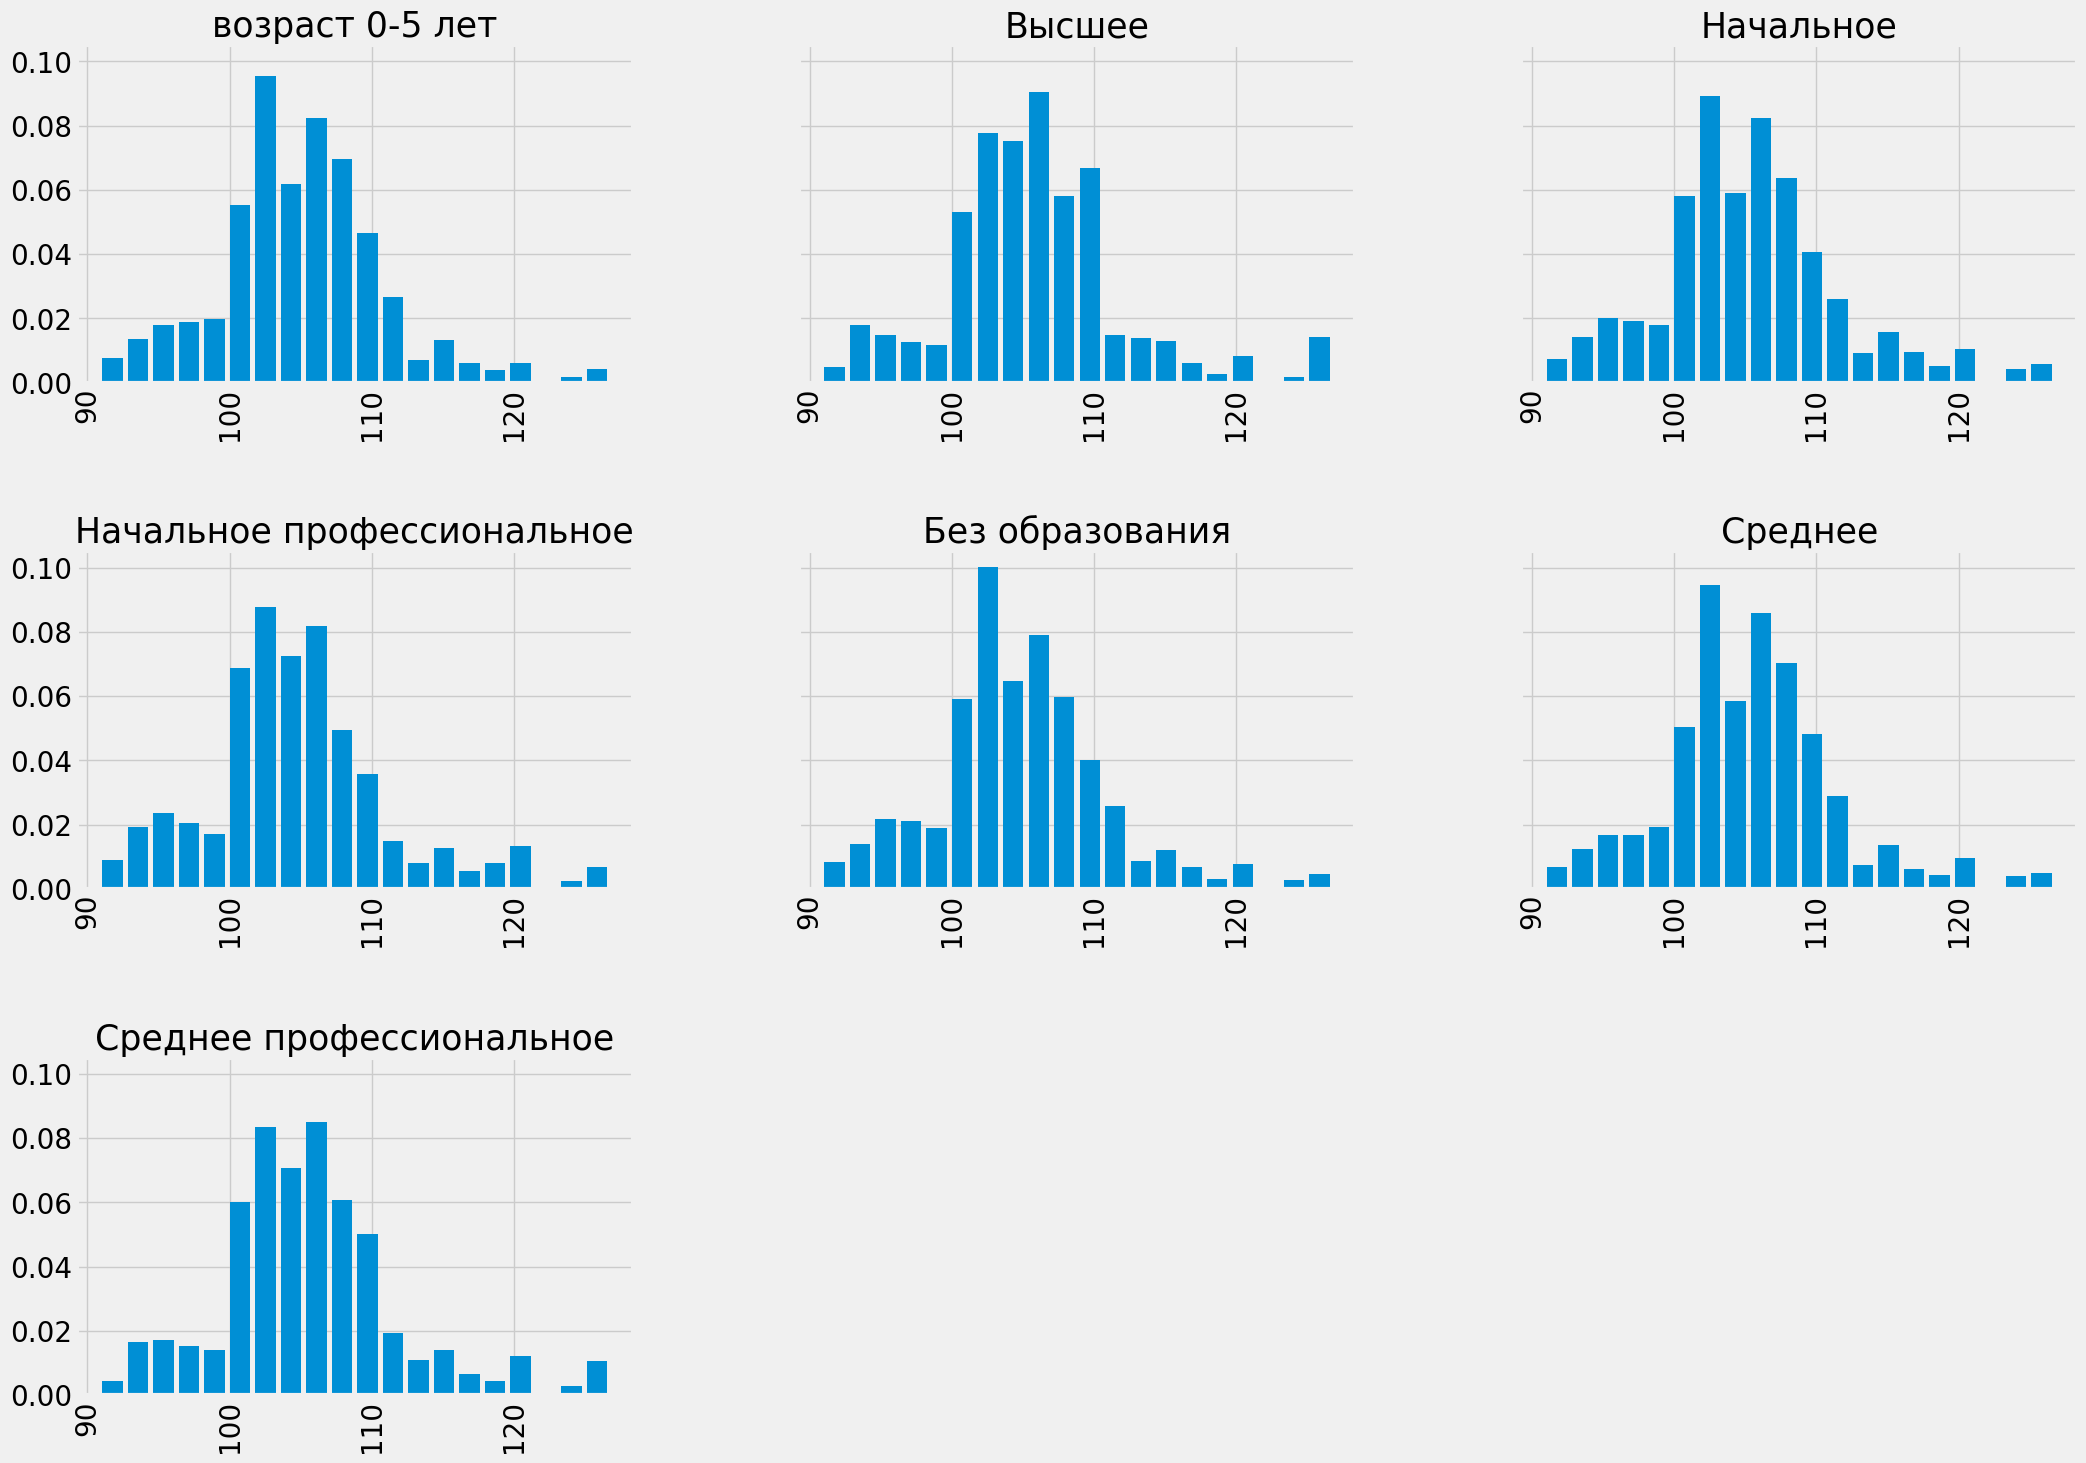

In [624]:
params = {'axes.titlesize':'25', 'xtick.labelsize':'20', 'ytick.labelsize':'20'}
plt.rcParams.update(params)

# edu_data = all_poverty_data[all_poverty_data.education!='возраст 0-5 лет']
ax=all_poverty_data.sort_values(by='education',ascending=False)\
                    .hist(column='cpi_real', by='education', bins=20, density=True,
                     figsize=(25,18),rwidth=0.8, sharey=True)


None

In [625]:
all_poverty_data.groupby('education').age_range.value_counts(normalize=True)

education                   age_range
возраст 0-5 лет             0-6         0.998
                            6-18        0.002
Высшее                      18-61       0.870
                            61-110      0.130
                            6-18        0.000
                            0-6         0.000
Начальное                   6-18        0.928
                            61-110      0.040
                            18-61       0.033
Начальное профессиональное  18-61       0.867
                            61-110      0.121
                            6-18        0.011
Без образования             6-18        0.964
                            18-61       0.019
                            61-110      0.016
                            0-6         0.001
Среднее                     18-61       0.752
                            6-18        0.144
                            61-110      0.104
                            0-6         0.000
Среднее профессиональное    18-61       0.

In [664]:
df=all_poverty_data.groupby(['education']).age_range.value_counts(normalize=True)\
    .reset_index(name='percentage')

df=df[df.education!='возраст 0-5 лет']

order_list2=['Высшее','Среднее профессиональное','Начальное профессиональное',
            'Среднее',  'Начальное', 'Без образования']

df.education = pd.Categorical(df.education, categories= order_list2[::-1])
                              
df=df.sort_values('education')
df                           

# df.A=pd.Categorical(df.A,categories= order_list2)
# df=df.sort_values('A')
# df

education age_range  percentage
12             Без образования      6-18       0.964
13             Без образования     18-61       0.019
14             Без образования    61-110       0.016
15             Без образования       0-6       0.001
6                    Начальное      6-18       0.928
7                    Начальное    61-110       0.040
8                    Начальное     18-61       0.033
19                     Среднее       0-6       0.000
18                     Среднее    61-110       0.104
17                     Среднее      6-18       0.144
16                     Среднее     18-61       0.752
9   Начальное профессиональное     18-61       0.867
10  Начальное профессиональное    61-110       0.121
11  Начальное профессиональное      6-18       0.011
20    Среднее профессиональное     18-61       0.823
22    Среднее профессиональное      6-18       0.002
21    Среднее профессиональное    61-110       0.176
5                       Высшее       0-6       0.000
4                       Высшее      6-18       0.000
3                       Высшее    61-110       0.130
2                       Высшее     18-61       0.870

In [670]:

df[df.age_range!='0-6']

# .pivot_table(index='education', 
#                                                 columns='age_range',
#                                                 values='percentage')

education age_range  percentage
12             Без образования      6-18       0.964
13             Без образования     18-61       0.019
14             Без образования    61-110       0.016
6                    Начальное      6-18       0.928
7                    Начальное    61-110       0.040
8                    Начальное     18-61       0.033
18                     Среднее    61-110       0.104
17                     Среднее      6-18       0.144
16                     Среднее     18-61       0.752
9   Начальное профессиональное     18-61       0.867
10  Начальное профессиональное    61-110       0.121
11  Начальное профессиональное      6-18       0.011
20    Среднее профессиональное     18-61       0.823
22    Среднее профессиональное      6-18       0.002
21    Среднее профессиональное    61-110       0.176
4                       Высшее      6-18       0.000
3                       Высшее    61-110       0.130
2                       Высшее     18-61       0.870

In [671]:
edu_age_data

education age_range  percentage
12             Без образования      6-18       0.964
6                    Начальное      6-18       0.928
17                     Среднее      6-18       0.144
11  Начальное профессиональное      6-18       0.011
22    Среднее профессиональное      6-18       0.002
4                       Высшее      6-18       0.000
14             Без образования    61-110       0.016
7                    Начальное    61-110       0.040
18                     Среднее    61-110       0.104
10  Начальное профессиональное    61-110       0.121
21    Среднее профессиональное    61-110       0.176
3                       Высшее    61-110       0.130
13             Без образования       NaN       0.019
8                    Начальное       NaN       0.033
16                     Среднее       NaN       0.752
9   Начальное профессиональное       NaN       0.867
20    Среднее профессиональное       NaN       0.823
2                       Высшее       NaN       0.870

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1323148434.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_age_data.age_range=pd.Categorical(edu_age_data.age_range,categories=['6-18', '18-61', '61-110'])


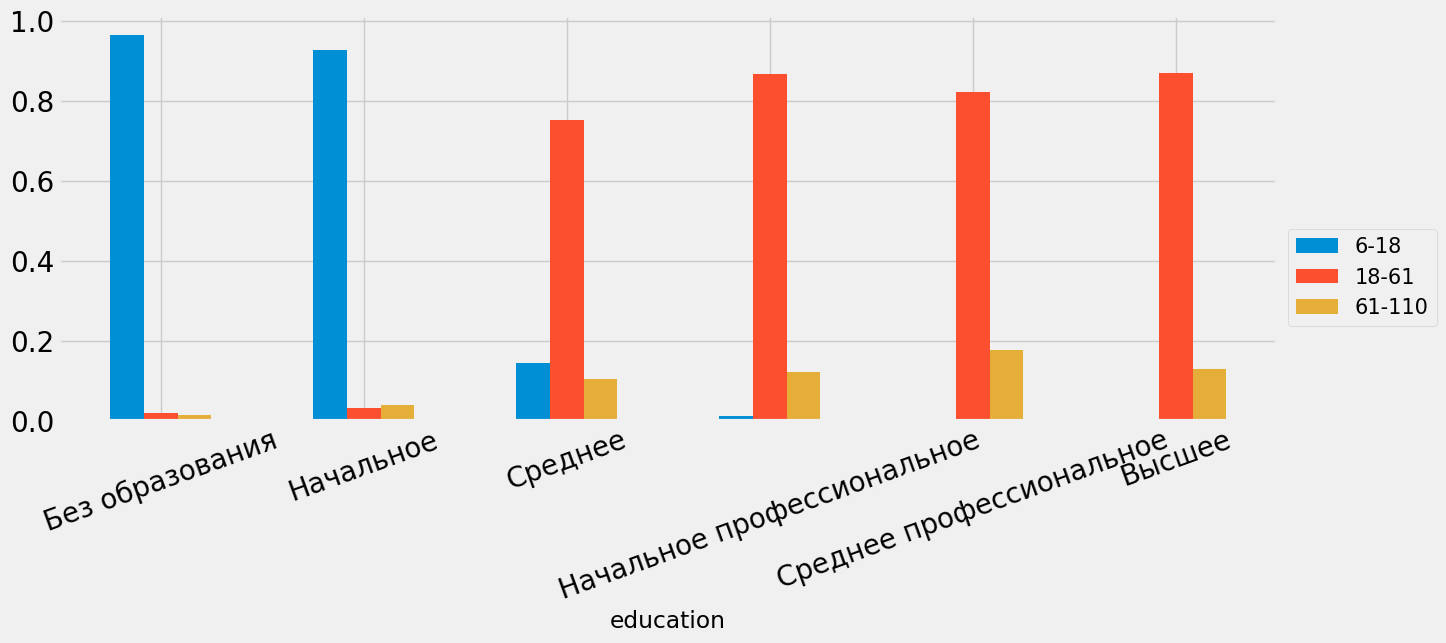

In [673]:
order_list2=['Высшее','Среднее профессиональное','Начальное профессиональное',
            'Среднее',  'Начальное', 'Без образования']

filt=(df.education!='возраст 0-5 лет')&(df.age_range!='0-6')
edu_age_data = df[filt]

edu_age_data.age_range=pd.Categorical(edu_age_data.age_range,categories=['6-18', '18-61', '61-110'])
edu_age_data=edu_age_data.sort_values('age_range')



edu_age_data.pivot_table(index='education', 
                    columns='age_range',
                    values='percentage')\
            .plot(kind='bar', figsize=(14,5))



plt.xticks(rotation=20)
plt.legend( fontsize=15,bbox_to_anchor=(1., 0.5))


plt.show()


Text(0.5, 1.0, '')

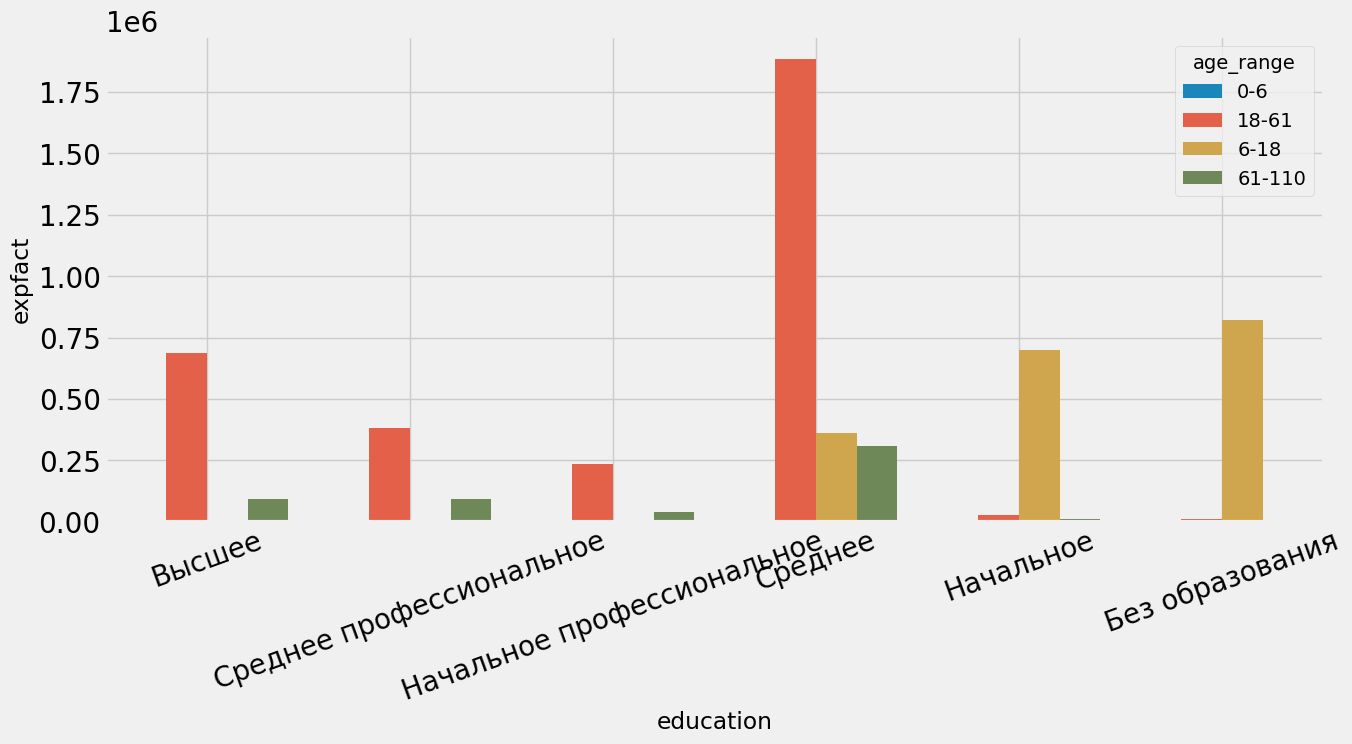

In [661]:
df=all_poverty_data[all_poverty_data.data_year==2020].groupby(['education','age_range']).agg({'expfact':'sum'})\
    .reset_index()


plt. figure(figsize=(14,6))
sns.barplot(x='education', y='expfact', hue='age_range', data=df,
           order = ['Высшее','Среднее профессиональное','Начальное профессиональное',
            'Среднее',  'Начальное', 'Без образования'])

plt. grid(True)

plt.xticks(rotation=20)
plt.title('')

# plt.legend(fontsize=15,bbox_to_anchor=(1., 0.5))

# df=df[df.education!='возраст 0-5 лет']

# order_list2=['Высшее','Среднее профессиональное','Начальное профессиональное',
#             'Среднее',  'Начальное', 'Без образования']

# df.education = pd.Categorical(df.education, categories= order_list2[::-1])
                              
# df=df.sort_values('education')
# df         

# # order_list2=['Высшее','Среднее профессиональное','Начальное профессиональное',
# #             'Среднее',  'Начальное', 'Без образования']

# df[df.education!='возраст 0-5 лет'].pivot_table(index='education', 
#                                                 columns='age_range',
#                                                 values='percentage')


In [631]:
all_poverty_data.columns

Index(['hh_code', 'kvartal', 'mon', 'c1', 'gender', 'relative', 'age',
       'merital_st', 'education', 'settlement', 'oblast', 'obl_reg', 'kv',
       'expfact', 'weight', 'pcc', 'pccf', 'pline_dc', 'f_linec', 'CPI',
       'pccddc', 'cpsc', 'fpsc', 'pgc', 'p2c', 'fpgc', 'fp2c', 'pccserv',
       'pccnf', 'pccdur', 'incpcd', 'data_year', 'cpi_real', 'cpi_exp',
       'oblast_short', 'age_range'],
      dtype='object')

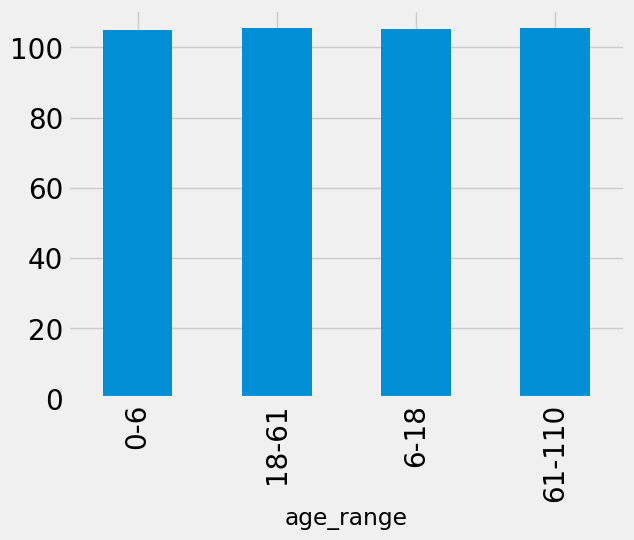

In [632]:
all_poverty_data.groupby('age_range').cpi_real.mean().plot(kind='bar')
# yticks=np.arange(0.90,1.1, 0.01)
# plt.ylim(0, 1.008)
# plt.yticks(yticks)
plt.yticks(rotation='horizontal')
None

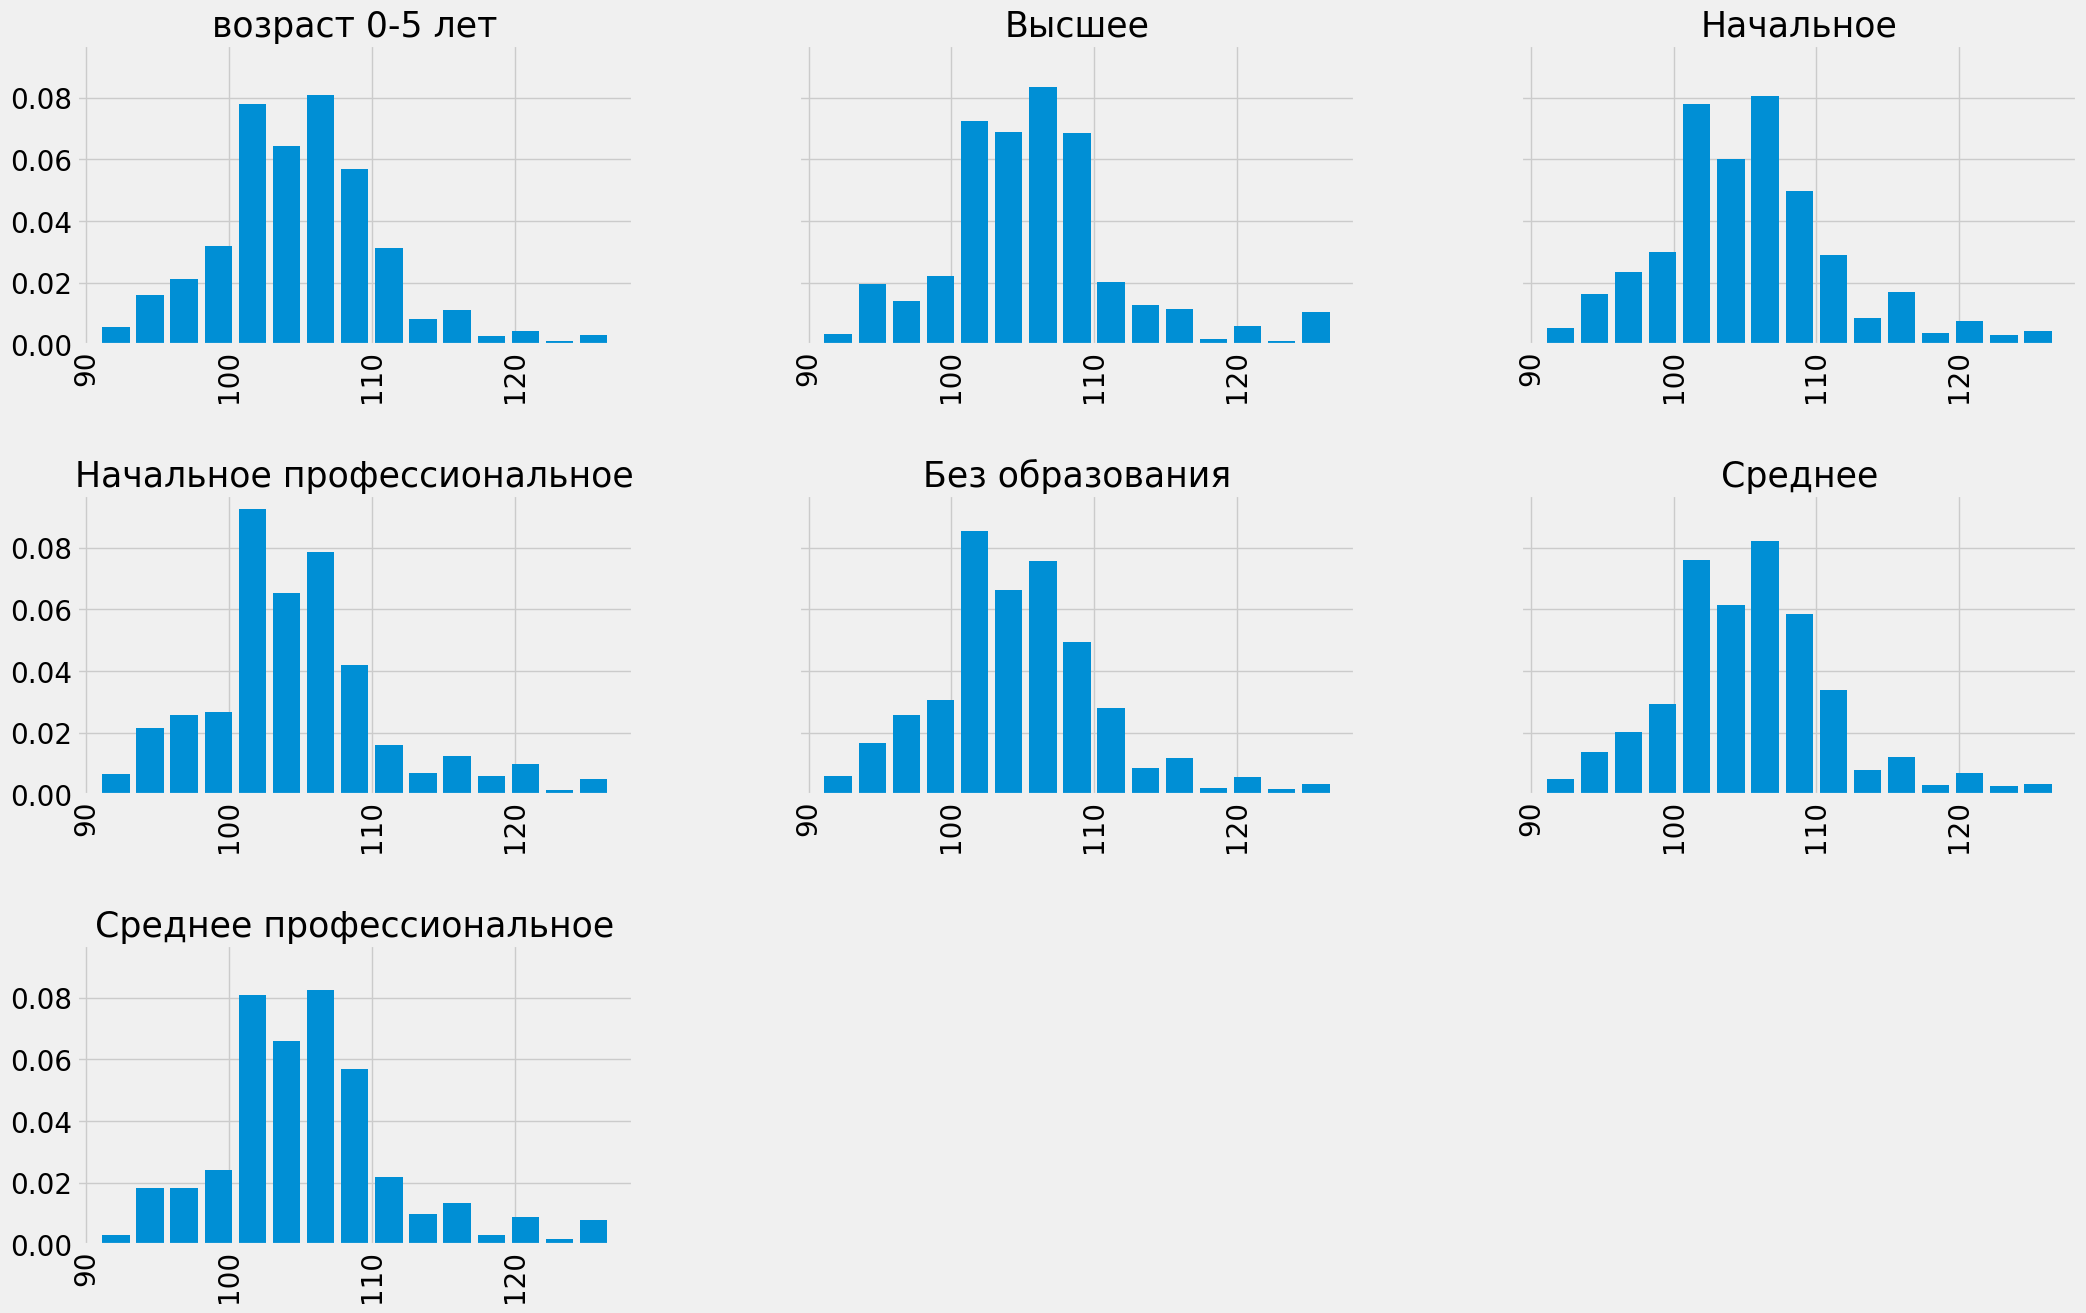

In [633]:
# d=all_poverty_data[all_poverty_data.education!='возраст 0-5 лет']


ax=all_poverty_data.hist(column='cpi_real', by='education', bins=15, density=True,
                     figsize=(25,16),rwidth=0.8, sharey=True,)
None

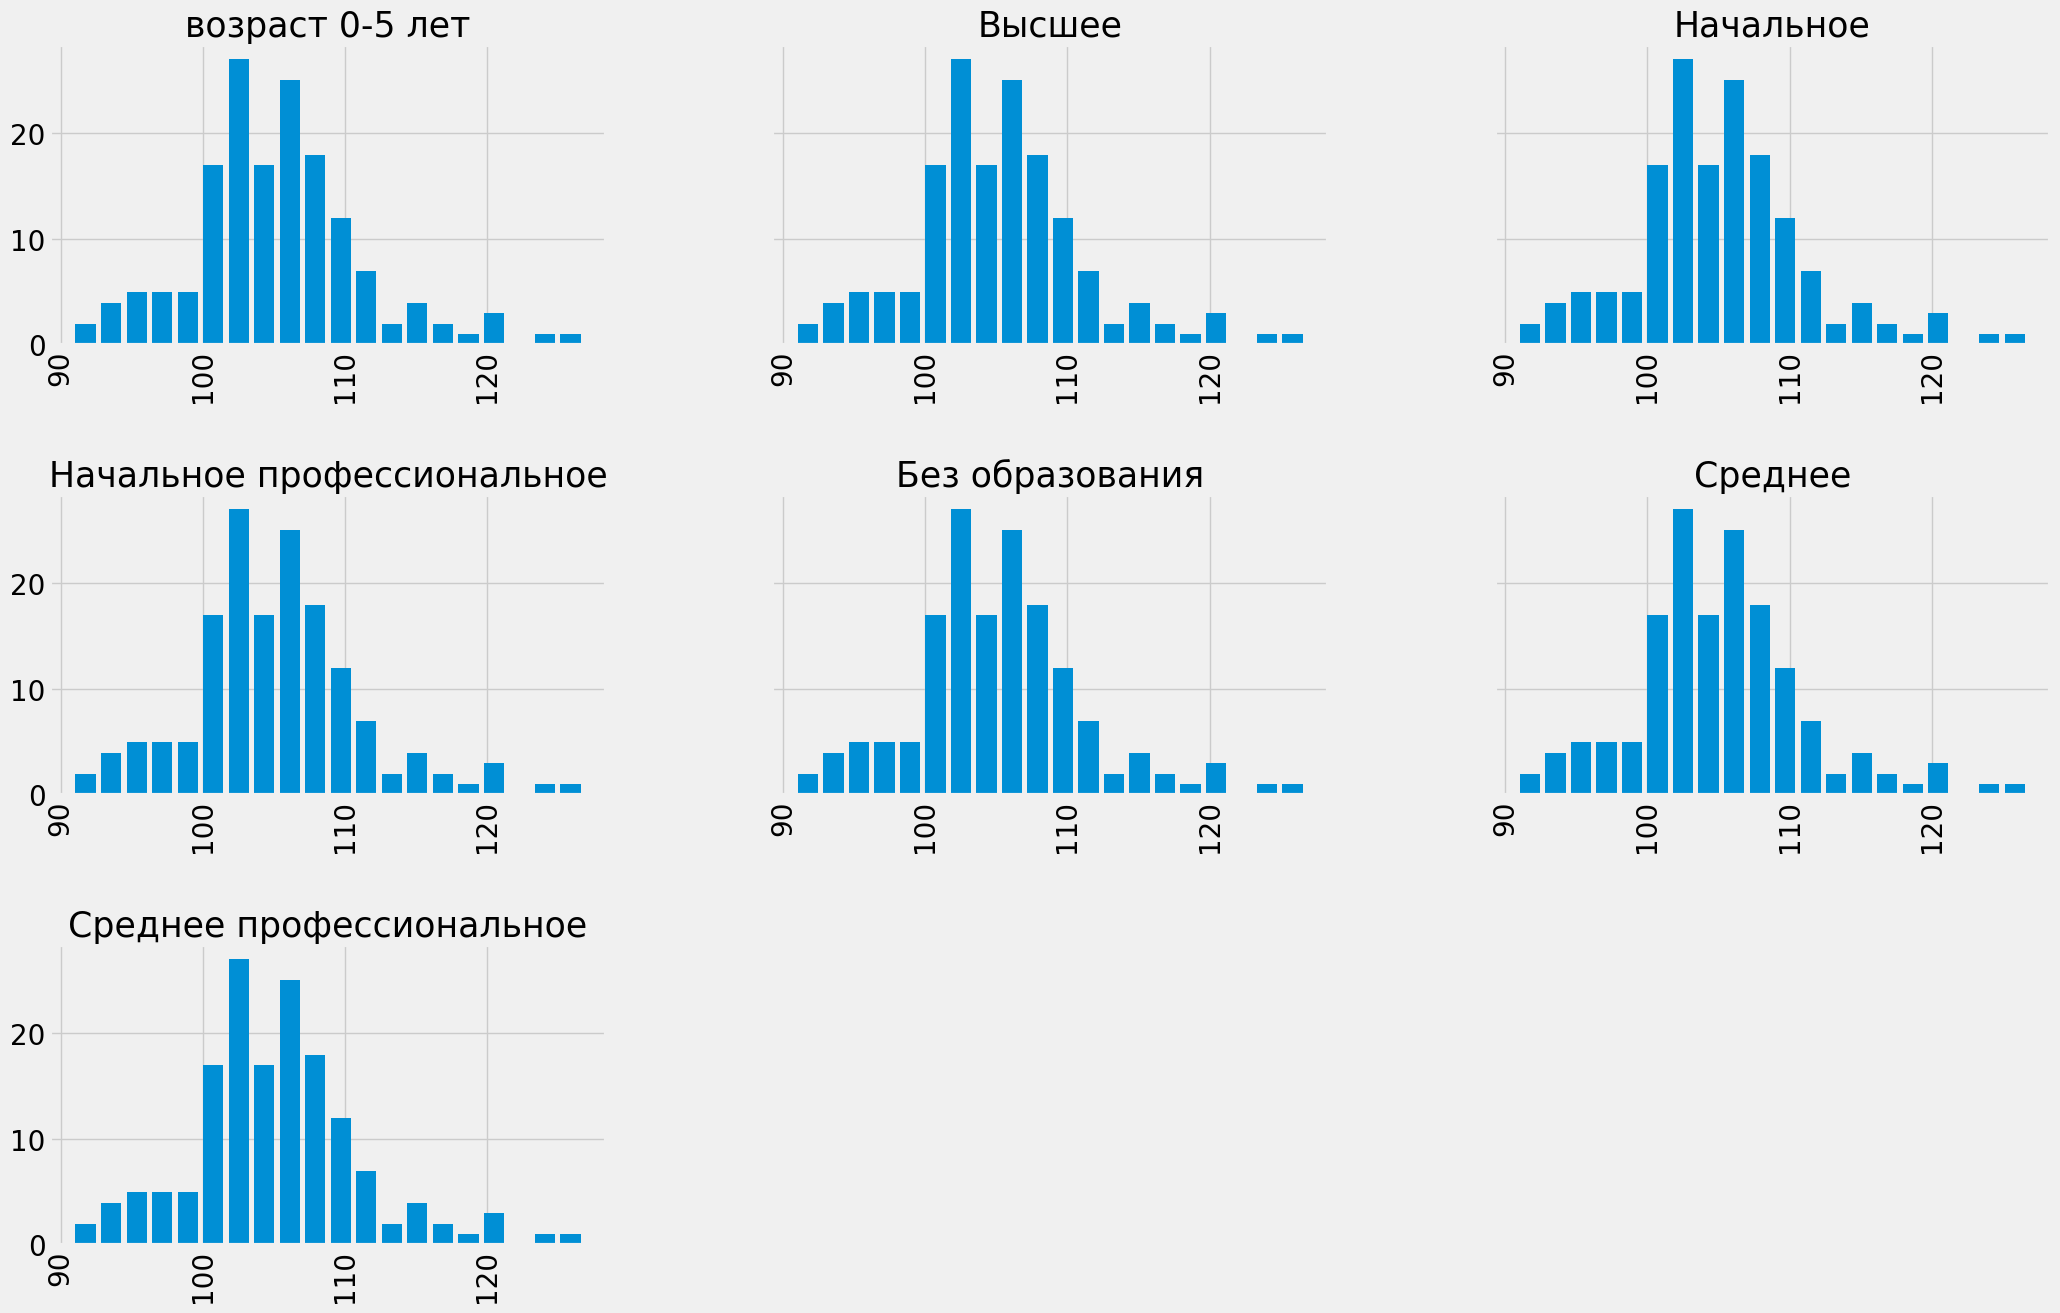

In [634]:
settl=all_poverty_data.groupby('data_year').settlement.value_counts(normalize=True).reset_index(name='численность')
'age_range'

axx=all_poverty_data.groupby(['education']).cpi_real.value_counts().reset_index(name='cnt')\
                                            .hist(column='cpi_real', by='education', bins=20,
                     figsize=(25,16),rwidth=0.8,sharey=True)

# ax=all_poverty_data.hist(column='cpi_real', by='education', bins=15, density=True,
#                      figsize=(25,16),rwidth=0.8, sharey=True,)
None




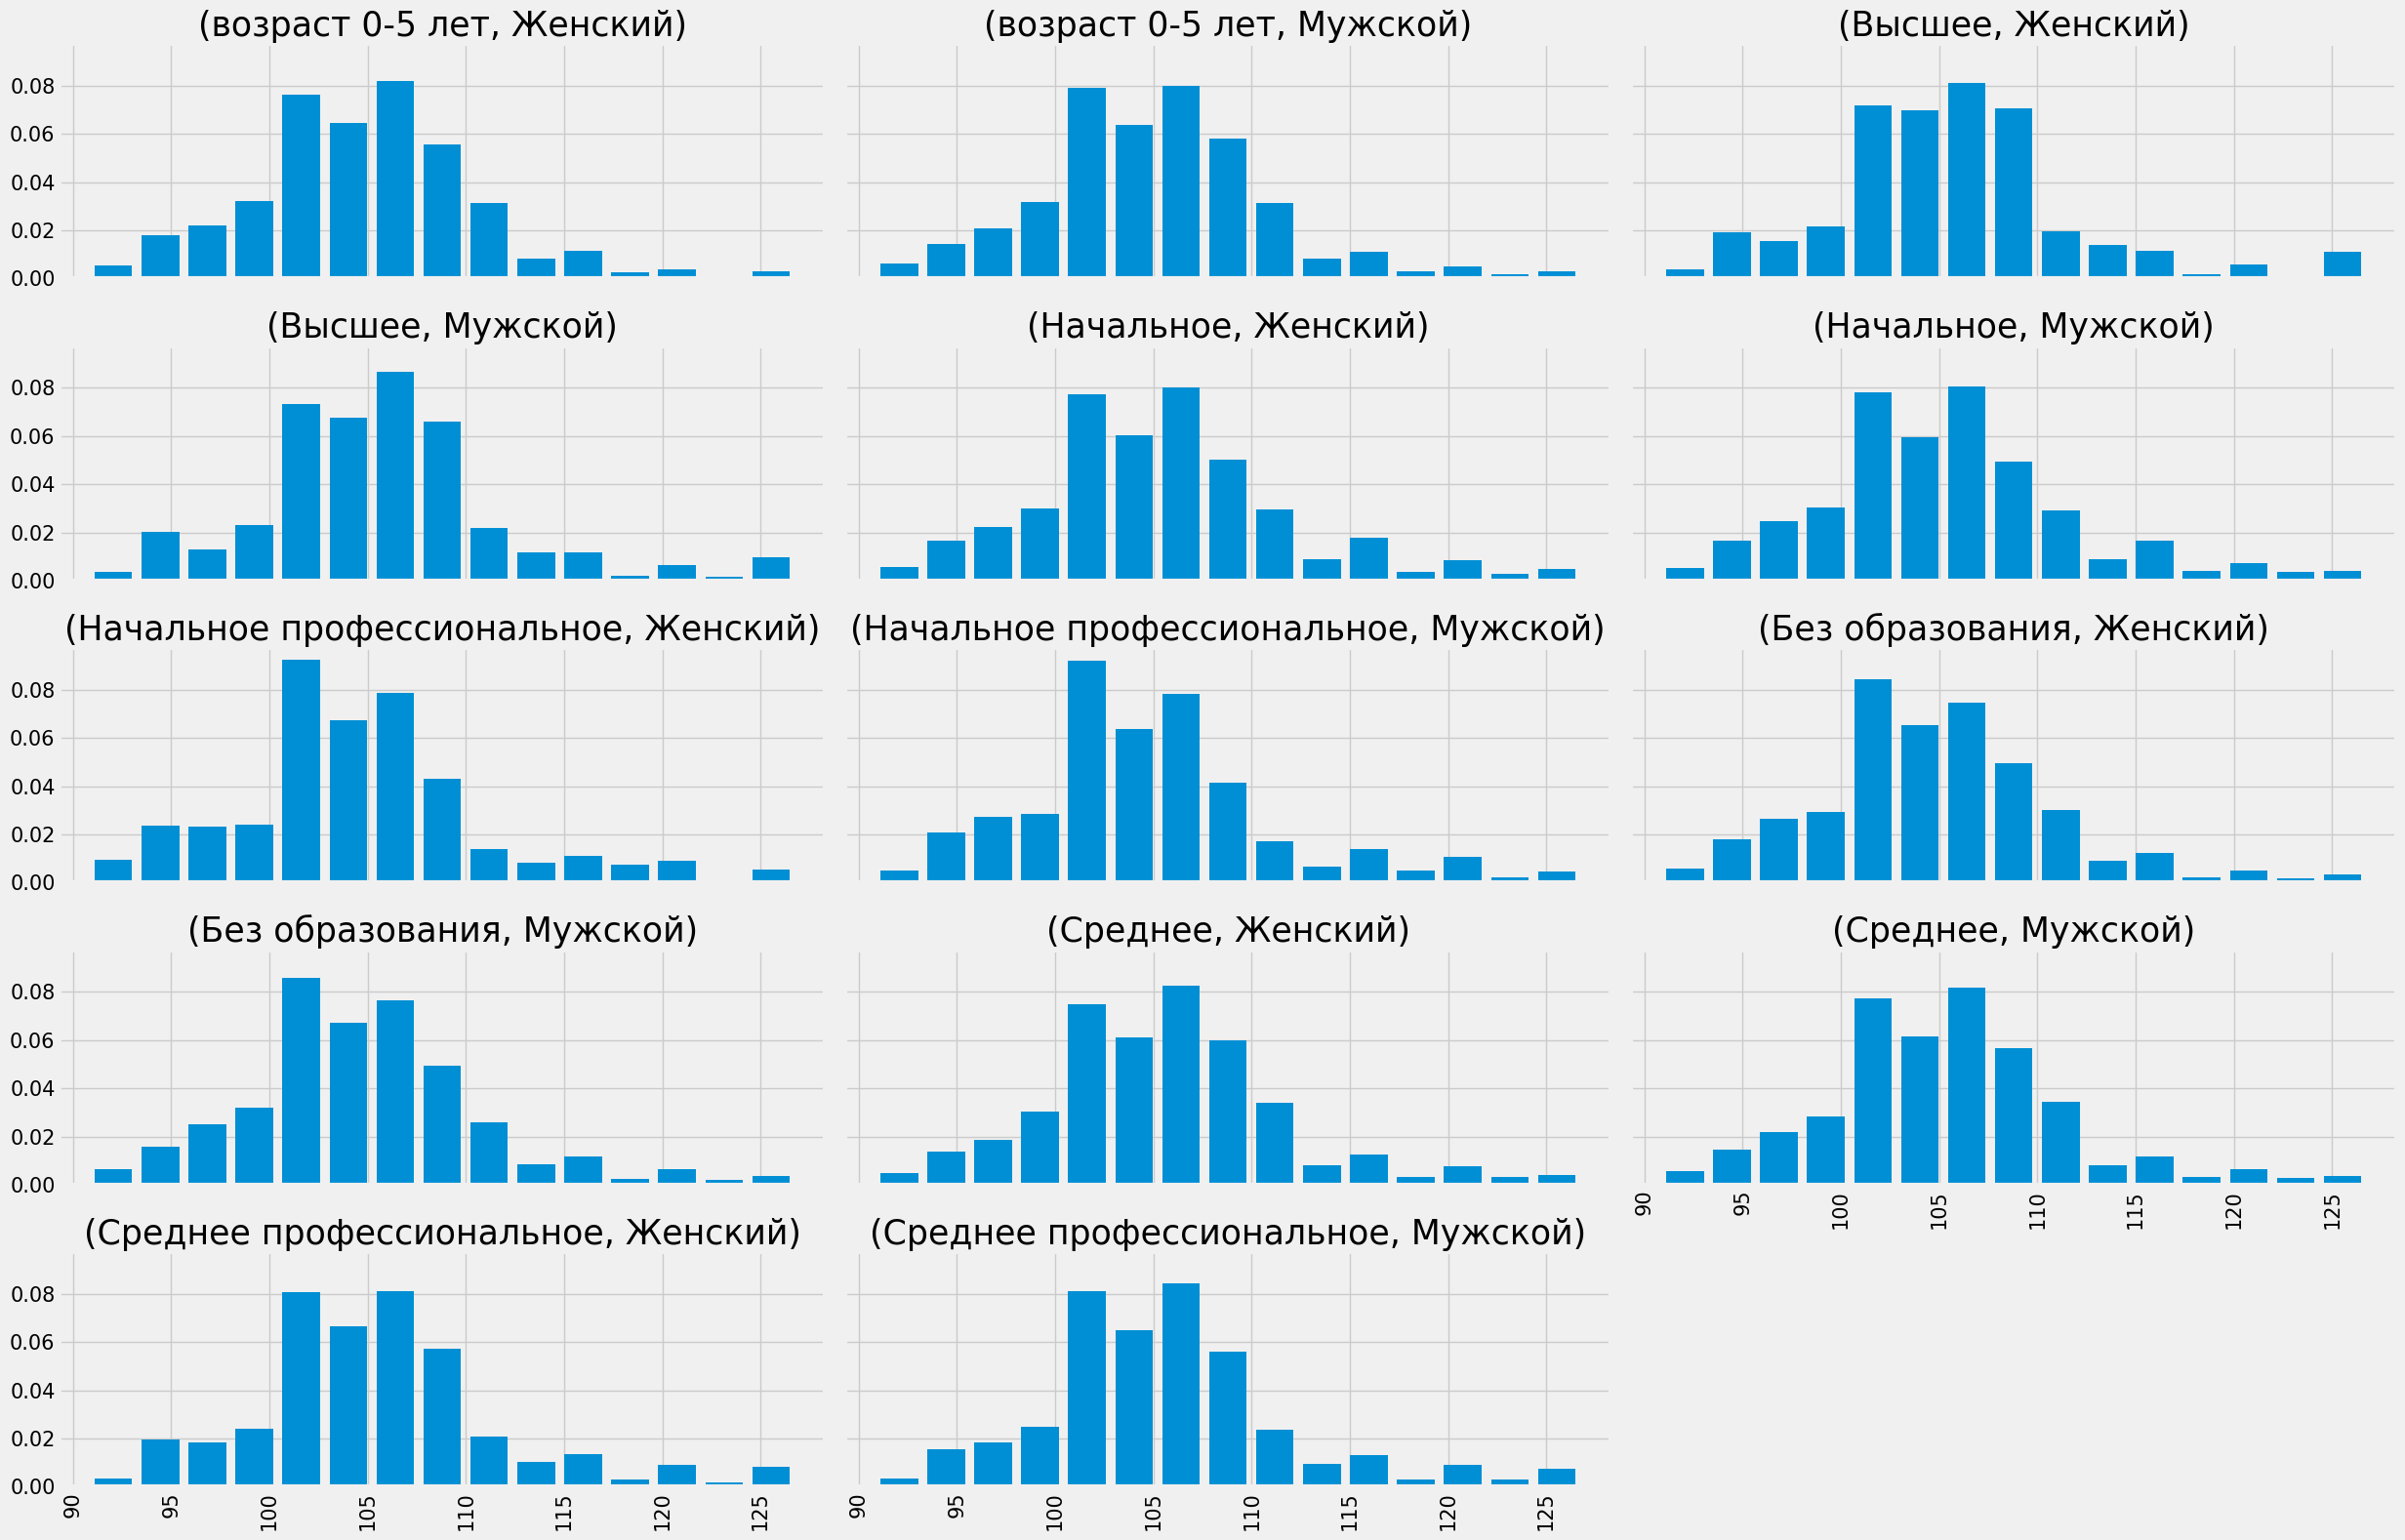

In [635]:
params = {'axes.titlesize':'25',
          'xtick.labelsize':'15',
          'ytick.labelsize':'15'}
plt.rcParams.update(params)


axes=all_poverty_data.hist( column='cpi_real', by=['education','gender'], bins=15, density=True,
                     figsize=(25,16),rwidth=0.8, sharex=True,sharey=True, layout=(5,3))


plt.tight_layout()
plt.show()
None


array([[<AxesSubplot:title={'center':'0-6'}>,
        <AxesSubplot:title={'center':'18-61'}>],
       [<AxesSubplot:title={'center':'6-18'}>,
        <AxesSubplot:title={'center':'61-110'}>]], dtype=object)

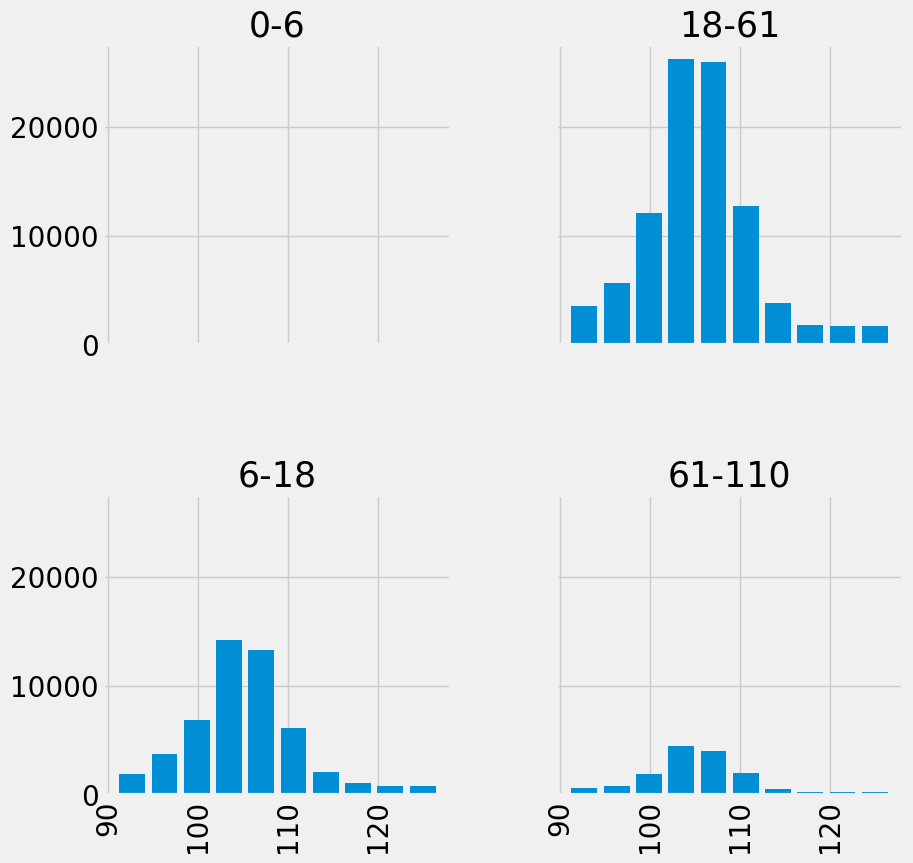

In [636]:
params = {'axes.titlesize':'25',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20'}

plt.rcParams.update(params)


d=all_poverty_data[all_poverty_data.education!='возраст 0-5 лет']
ax=d.hist(column='cpi_real', by='age_range', bins=10,
                     figsize=(10,10),rwidth=0.8, sharex=True,sharey=True)



plt.savefig('edu_cpi.svg')
None
ax

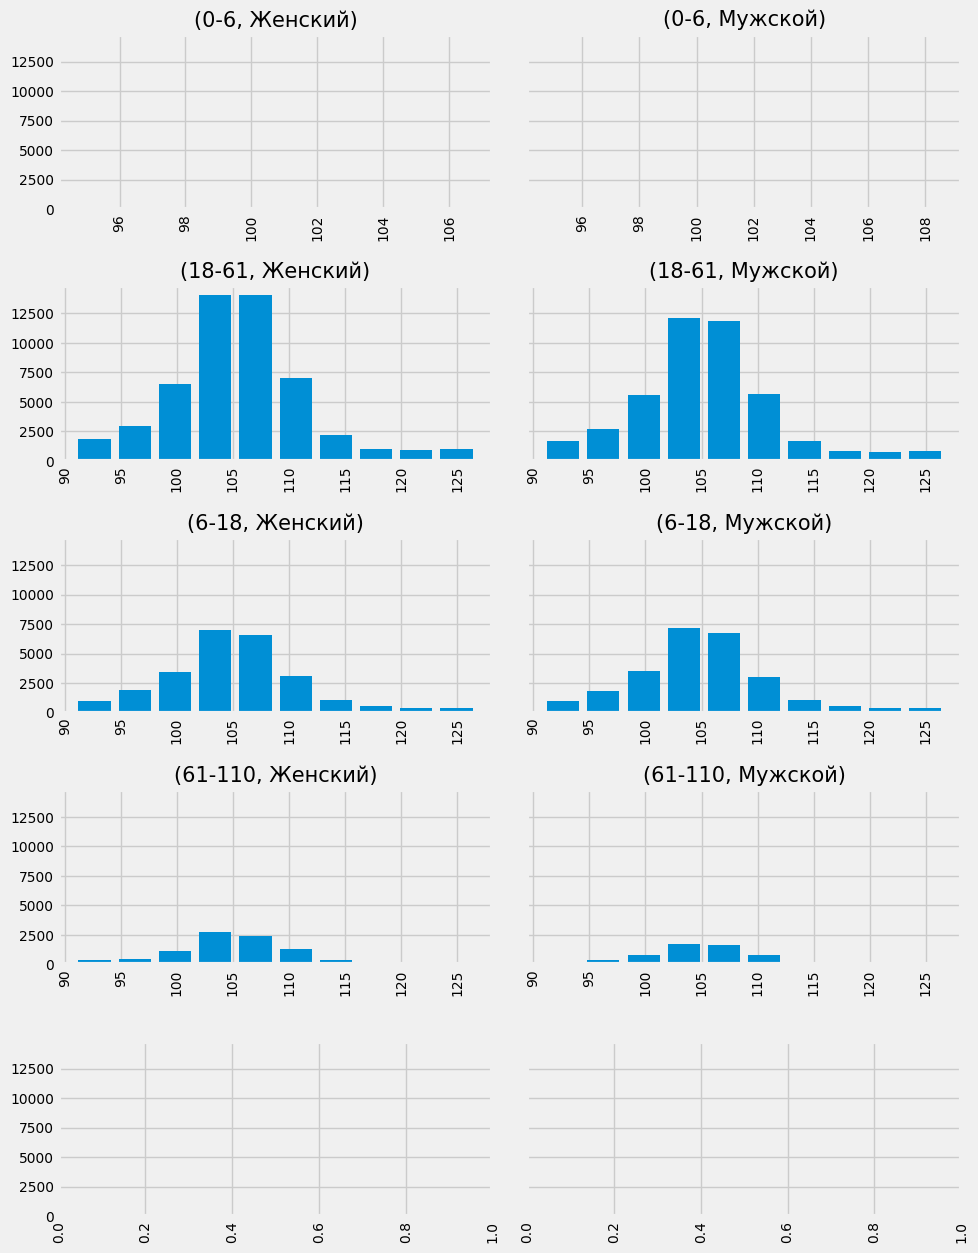

In [637]:
from sklearn.preprocessing import StandardScaler
params = {'axes.titlesize':'15',
          'xtick.labelsize':'10',
          'ytick.labelsize':'10',
          }
plt.rcParams.update(params)


ax=d.hist(column='cpi_real', by=['age_range','gender'], bins=10, 
                     figsize=(10,15),rwidth=0.8, sharey=True, layout=(6,2), )



plt.tight_layout()
plt.show()


None


AttributeError: 'AxesSubplot' object has no attribute 'avxline'

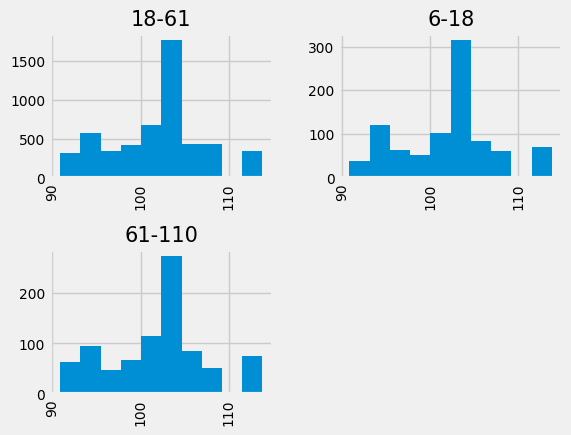

In [638]:
edu_age=all_poverty_data[all_poverty_data.education=='Среднее'].groupby(['age_range']).cpi_real\
            .agg(['mean','median'])\
            .sort_values(by='mean', ascending=False).reset_index()

edu_age=all_poverty_data[(all_poverty_data.education=='Среднее')
                         &(all_poverty_data.education!='возраст 0-5 лет')
                         &(all_poverty_data.data_year==2018)]\
                .hist(column='cpi_real', by='age_range')

 
for i in edu_age:
    for j in i:
        print(j.avxline)


In [ ]:
edu_age

C:\Users\user\AppData\Local\Temp\ipykernel_14516\159378250.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_settl.education = pd.Categorical(edu_settl.education, categories= order_list2[::-1])


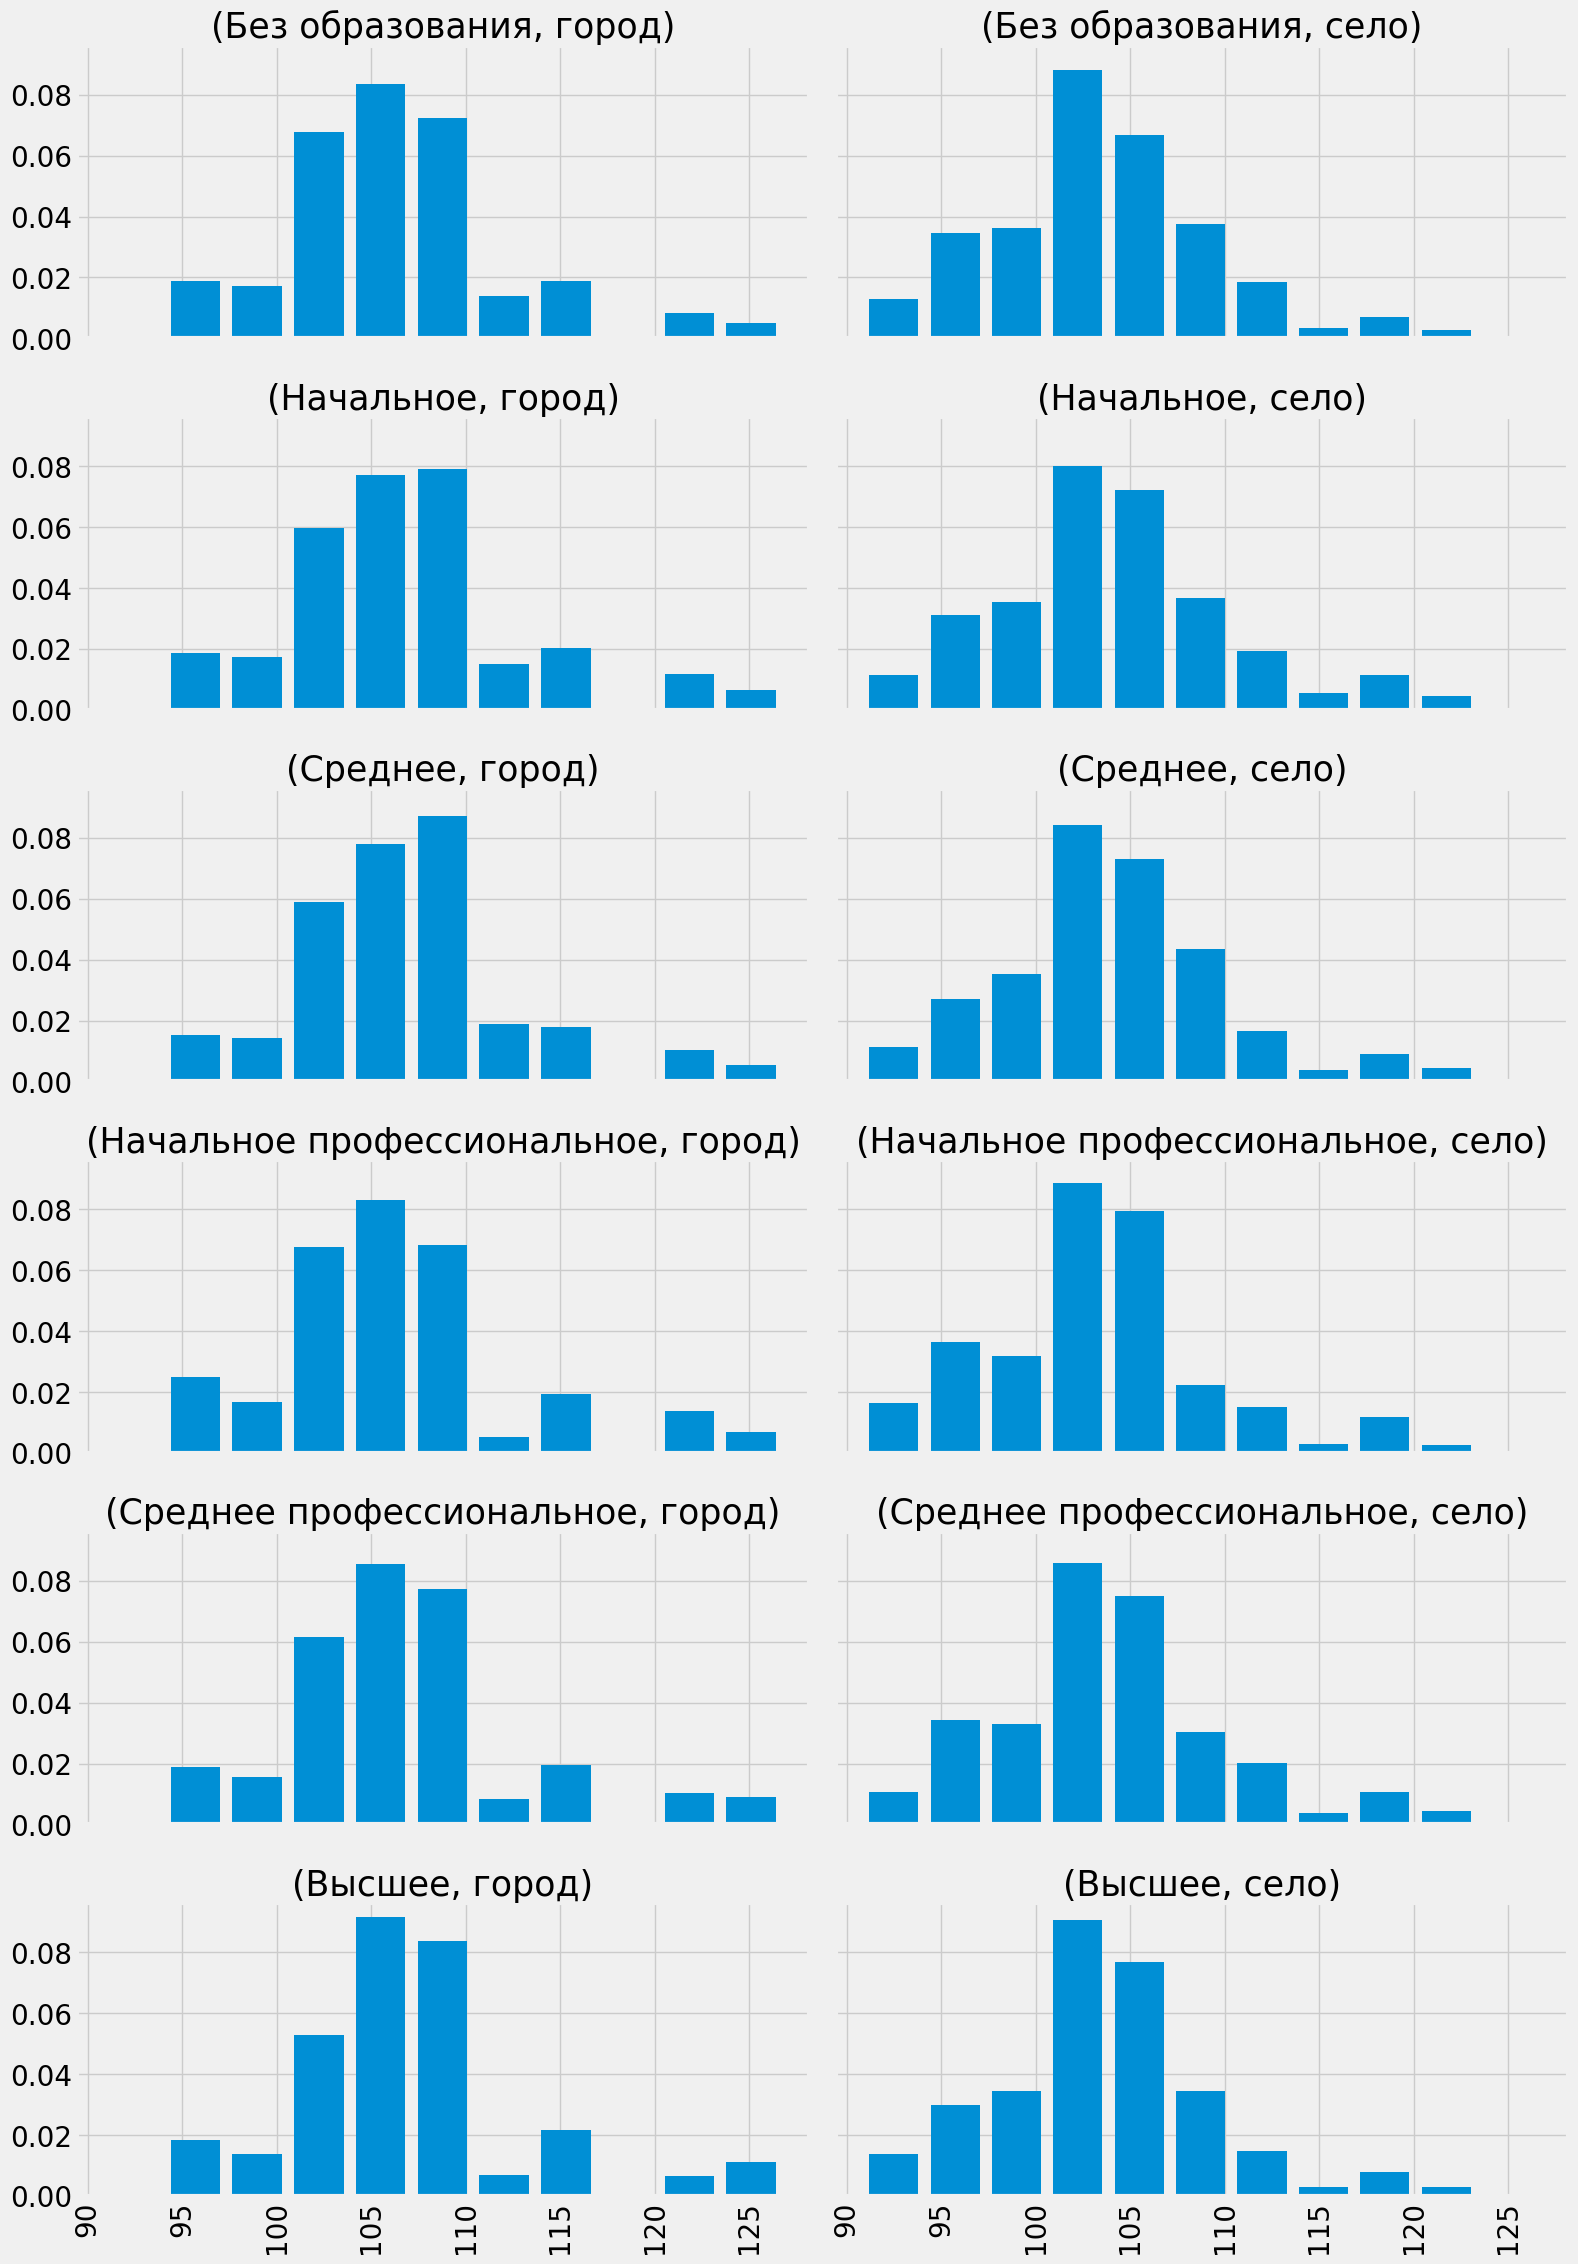

In [642]:

params = {'axes.titlesize':'25',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20'}
plt.rcParams.update(params)


edu_settl=all_poverty_data[all_poverty_data.education!='возраст 0-5 лет']

order_list2=['Высшее','Среднее профессиональное','Начальное профессиональное',
            'Среднее',  'Начальное', 'Без образования']

edu_settl.education = pd.Categorical(edu_settl.education, categories= order_list2[::-1])


ax=edu_settl.hist(column='cpi_real', by=['education','settlement'], bins=10, density=True,
                     figsize=(16,26),rwidth=0.8, sharey=True, sharex=True, layout=(7,2),)

plt.xticks(rotation='horizontal')

plt.tight_layout()
plt.show()
# None

    

In [ ]:

params = {'axes.titlesize':'25',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20'}
plt.rcParams.update(params)


edu_settl=all_poverty_data[all_poverty_data.education!='возраст 0-5 лет']

order_list2=['Высшее','Среднее профессиональное','Начальное профессиональное',
            'Среднее',  'Начальное', 'Без образования']

edu_settl.education = pd.Categorical(edu_settl.education, categories= order_list2[::-1])


ax=edu_settl.hist(column='cpi_real', by=['age_range','settlement'], bins=10, density=True,
                     figsize=(16,26),rwidth=0.9, sharey=True, layout=(7,2),)

plt.xticks(rotation='horizontal')

plt.tight_layout()
plt.show()
# None


In [ ]:
plt.figure(figsize=(16,6))
all_poverty_data.groupby(['age_range','education'])\
                .cpi_real.mean().reset_index().sort_values(by=['age_range','education'])

In [ ]:
plt.figure(figsize=(16,6))
all_poverty_data.groupby(['age_range','education'])\
                .CPI.mean().reset_index().sort_values(by=['age_range','education']).plot(column='',kind='bar',figsize=(16,6))

In [ ]:
plt.figure(figsize=(20,12))
sns.set(font_scale=5)

sns.set_style("darkgrid")
sns.catplot( x='oblast_short', y='age', col='settlement',
            data=all_poverty_data, kind='bar',height=10, aspect=3,
            order = all_poverty_data['oblast_short'].value_counts().sort_values().index)

plt.xticks(rotation=60, fontsize=40)
plt.yticks( fontsize=100)

plt.show()


In [ ]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1)

sns.countplot(x='merital_st', hue='gender', data=all_poverty_data,
               order = all_poverty_data['merital_st'].value_counts().sort_values().index)


plt.xticks(rotation=60, fontsize=15)
plt.title('Распределение по полу и гражданскому статусу', fontsize=15)


plt.show()


In [ ]:
all_poverty_data.age_range.unique()

In [ ]:

# all_poverty_data.groupby('education').CPI.agg(['mean','median']).reset_index().plot('education',['mean','median'],)




data_education=all_poverty_data[(all_poverty_data.age_range=='18-60')&(all_poverty_data.data_year==2019)]\
.groupby('education').cpi_real.agg(['mean','median','count'])\
.reset_index().sort_values(by='mean')

data_education.plot('education',['mean','median'],)
plt.xticks(rotation=20)

data_education.sort_values('mean')


In [644]:
plt.plot(years, data_education[data_education.settlement=='село']['count'], label='село')
plt.plot(years, data_education[data_education.settlement=='город']['count'],label='город')

plt.legend()

NameError: name 'data_education' is not defined

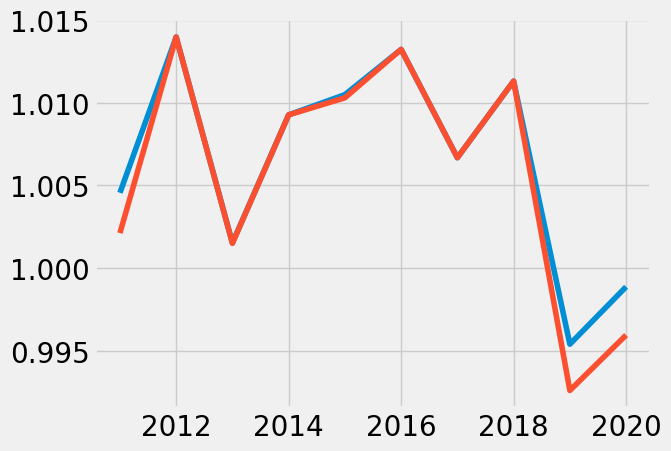

In [645]:



data=all_poverty_data[all_poverty_data.education=='Среднее'].groupby( ['gender','data_year'])\
                .CPI.agg(['mean','median']).reset_index().sort_values(['gender','data_year'])\

years=data.data_year.unique()

plt.plot(years, data[data.gender=='Женский']['median'])
plt.plot(years, data[data.gender=='Мужской']['median'])
# plt.xticks(rotation=20)

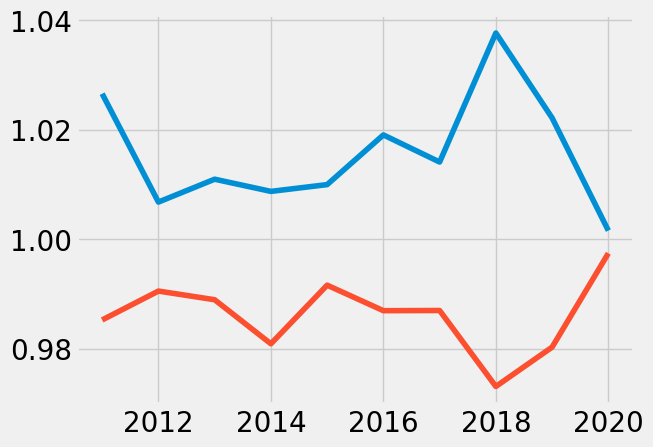

In [646]:

data=all_poverty_data[all_poverty_data.education=='Высшее'].groupby( ['settlement','data_year'])\
                .CPI.agg(['mean','median']).reset_index().sort_values(['settlement','data_year'])\

years=data.data_year.unique()

plt.plot(years, data[data.settlement=='город']['mean'])
plt.plot(years, data[data.settlement=='село']['mean'])
# plt.xticks(rotation=20)

settlement  data_year  mean  median  count
0       город       2011 1.018   1.033   3458
1       город       2012 1.014   1.020   3483
2       город       2013 1.011   1.011   3808
3       город       2014 1.019   1.032   3797
4       город       2015 1.014   1.030   3729
5       город       2016 1.018   1.023   3656
6       город       2017 1.009   1.007   3589
7       город       2018 1.031   1.025   3556
8       город       2019 1.019   1.019   3559
9       город       2020 1.004   0.999   3538
10       село       2011 0.988   0.993   3403
11       село       2012 0.993   0.986   3405
12       село       2013 0.991   0.995   3896
13       село       2014 0.987   0.978   3734
14       село       2015 0.992   0.999   3768
15       село       2016 0.987   0.986   3675
16       село       2017 0.997   0.989   3782
17       село       2018 0.979   0.981   3728
18       село       2019 0.984   0.991   3683
19       село       2020 0.999   0.981   3626

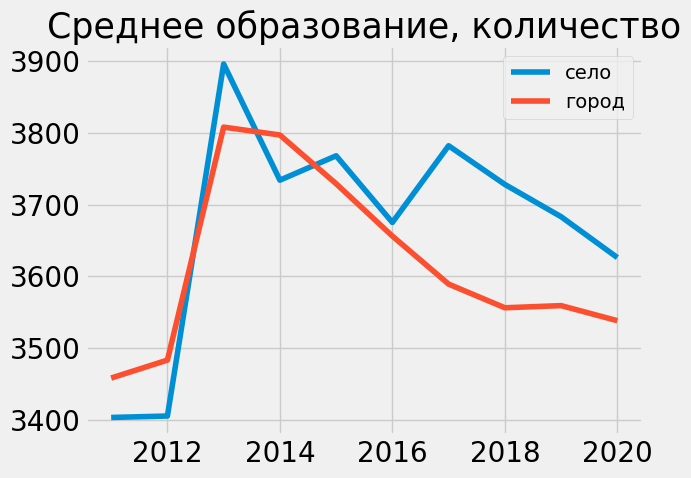

In [647]:

data=all_poverty_data[all_poverty_data.education=='Среднее'].groupby( ['settlement','data_year'])\
                .CPI.agg(['mean','median','count']).reset_index().sort_values(['settlement','data_year'])\

years=data.data_year.unique()

# plt.plot(years, data[data.settlement=='город']['mean'])
# plt.plot(years, data[data.settlement=='село']['mean'])
plt.plot(years, data[data.settlement=='село']['count'], label='село')
plt.plot(years, data[data.settlement=='город']['count'],label='город')

plt.title('Среднее образование, количество')

plt.legend()
data

settlement  data_year  mean  median  count
0       город       2011 1.027   1.037   1680
1       город       2012 1.007   1.020   1655
2       город       2013 1.011   1.011   1558
3       город       2014 1.009   1.012   1561
4       город       2015 1.010   1.030   1586
5       город       2016 1.019   1.039   1625
6       город       2017 1.014   1.031   1678
7       город       2018 1.038   1.025   1665
8       город       2019 1.022   1.019   1655
9       город       2020 1.002   0.999   1633
10       село       2011 0.985   0.993    557
11       село       2012 0.991   0.986    582
12       село       2013 0.989   0.995    773
13       село       2014 0.981   0.978    757
14       село       2015 0.992   0.999    761
15       село       2016 0.987   0.986    782
16       село       2017 0.987   0.986    725
17       село       2018 0.973   0.981    747
18       село       2019 0.980   0.973    763
19       село       2020 0.997   0.981    754

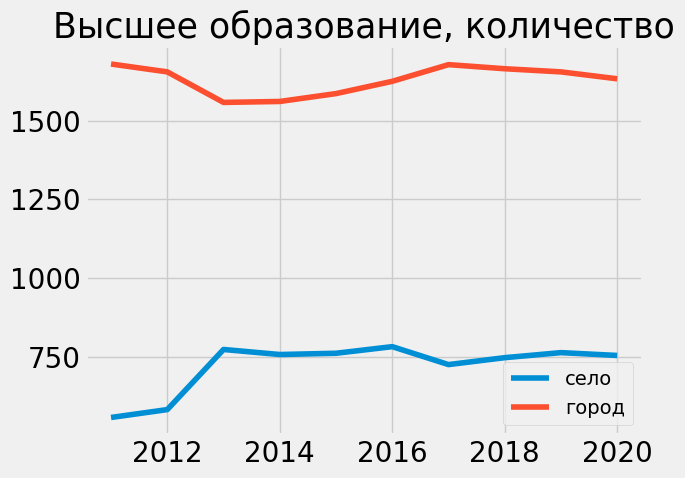

In [648]:

data=all_poverty_data[all_poverty_data.education=='Высшее'].groupby( ['settlement','data_year'])\
                .CPI.agg(['mean','median','count']).reset_index().sort_values(['settlement','data_year'])\

years=data.data_year.unique()

# plt.plot(years, data[data.settlement=='город']['mean'])
# plt.plot(years, data[data.settlement=='село']['mean'])
plt.plot(years, data[data.settlement=='село']['count'], label='село')
plt.plot(years, data[data.settlement=='город']['count'],label='город')

plt.title('Высшее образование, количество')

plt.legend()
data

settlement  data_year  mean  median  count
0       город       2011 1.023   1.033   1180
1       город       2012 1.009   1.020   1205
2       город       2013 1.008   1.010    985
3       город       2014 1.007   1.012    970
4       город       2015 1.007   1.027    959
5       город       2016 1.014   1.039    966
6       город       2017 1.008   1.015   1034
7       город       2018 1.026   1.013   1066
8       город       2019 1.017   1.014   1060
9       город       2020 1.001   1.001   1053
10       село       2011 0.987   0.993    605
11       село       2012 0.992   0.986    584
12       село       2013 0.989   0.995    540
13       село       2014 0.978   0.978    543
14       село       2015 0.989   0.999    535
15       село       2016 0.985   0.986    549
16       село       2017 0.990   0.986    558
17       село       2018 0.974   0.981    567
18       село       2019 0.978   0.973    587
19       село       2020 1.002   1.005    585

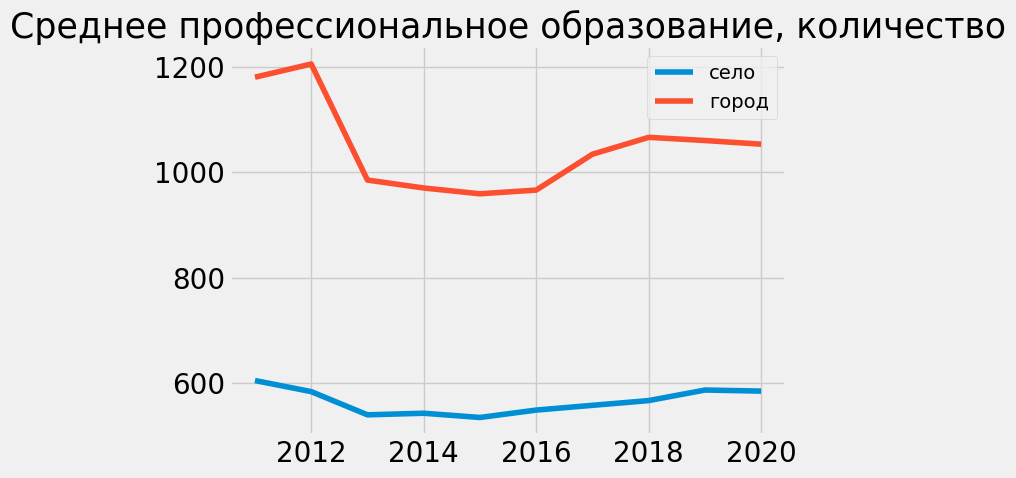

In [649]:

data=all_poverty_data[all_poverty_data.education=='Среднее профессиональное'].groupby( ['settlement','data_year'])\
                .CPI.agg(['mean','median','count']).reset_index().sort_values(['settlement','data_year'])\

years=data.data_year.unique()

# plt.plot(years, data[data.settlement=='город']['mean'])
# plt.plot(years, data[data.settlement=='село']['mean'])
plt.plot(years, data[data.settlement=='село']['count'], label='село')
plt.plot(years, data[data.settlement=='город']['count'],label='город')

plt.title('Среднее профессиональное образование, количество')

plt.legend()
data

education settlement  mean  median  count
0              возраст 0-5 лет      город 1.003   0.999   1120
1              возраст 0-5 лет       село 1.001   0.981   1137
2                       Высшее      город 1.002   0.999   1633
3                       Высшее       село 0.997   0.981    754
4                    Начальное      город 1.002   0.999   1070
5                    Начальное       село 1.001   0.981   1161
6   Начальное профессиональное      город 0.997   0.996    500
7   Начальное профессиональное       село 0.999   1.005    466
8              Без образования      город 1.001   0.999   1200
9              Без образования       село 1.000   0.981   1190
10                     Среднее      город 1.004   0.999   3538
11                     Среднее       село 0.999   0.981   3626
12    Среднее профессиональное      город 1.001   1.001   1053
13    Среднее профессиональное       село 1.002   1.005    585

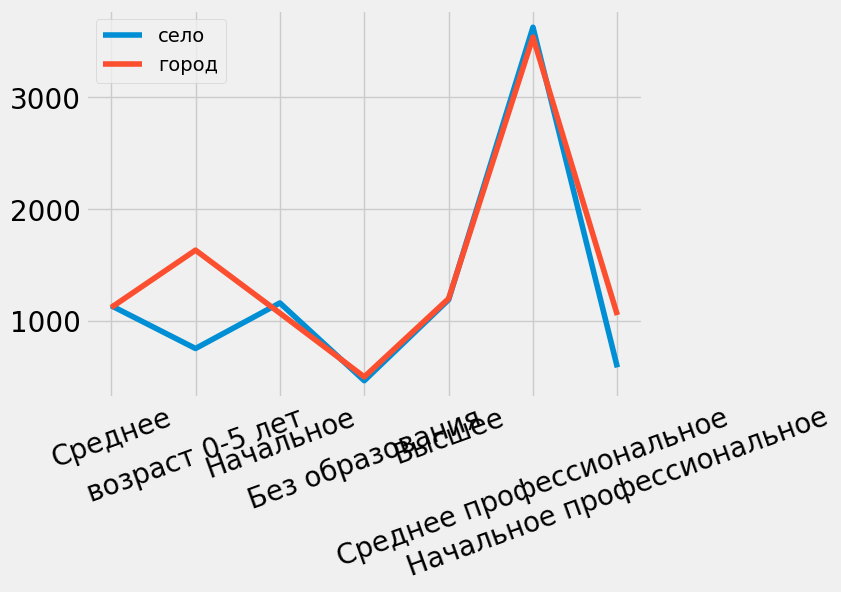

In [650]:

data=all_poverty_data[all_poverty_data.data_year==2020].groupby( ['education','settlement'])\
                .CPI.agg(['mean','median','count']).reset_index()
# .sort_values(['settlement','data_year'])\

# years=data.data_year.unique()
edus=all_poverty_data.education.unique()

# plt.plot(years, data[data.settlement=='город']['mean'])
# plt.plot(years, data[data.settlement=='село']['mean'])
plt.plot(edus, data[data.settlement=='село']['count'], label='село')
plt.plot(edus, data[data.settlement=='город']['count'],label='город')

# plt.title('Среднее профессиональное образование, количество')

plt.xticks(rotation=20)
plt.legend()
data

In [651]:
all_poverty_data[all_poverty_data.data_year==2018].groupby( ['education'])\
                .CPI.agg(['mean','median','count']).reset_index()
# .sort_values(['settlement','data_year'])\

education  mean  median  count
0             возраст 0-5 лет 0.998   1.011   2440
1                      Высшее 1.018   1.013   2412
2                   Начальное 0.997   1.005   2184
3  Начальное профессиональное 0.991   0.999    934
4             Без образования 1.000   1.011   2481
5                     Среднее 1.004   1.011   7284
6    Среднее профессиональное 1.008   1.011   1633

In [652]:
all_poverty_data.groupby('obl_reg').cpi_real.mean().sort_values()

Иссык-Кульская-село      98.724
Иссык-Кульская-город     99.523

SyntaxError: invalid syntax (2123437371.py, line 3)

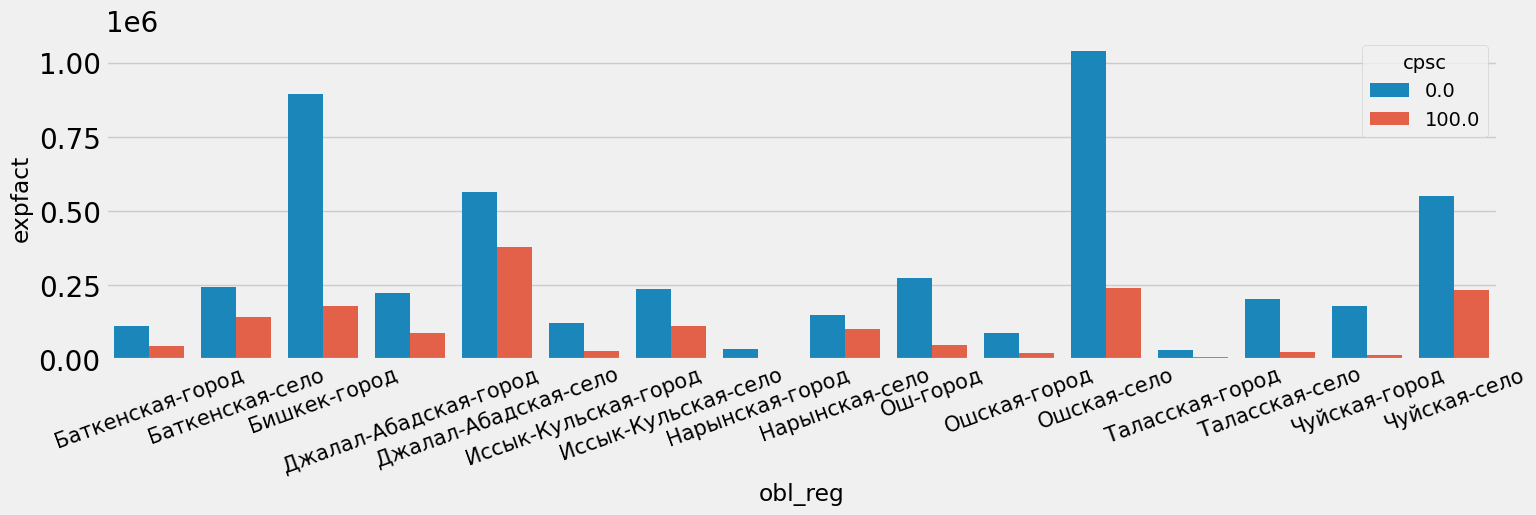

In [653]:
grp_reg = all_poverty_data[all_poverty_data.data_year==2020].groupby(['obl_reg','cpsc'])
cpsc_data = grp_reg.expfact.sum().reset_index()
plt.figure(figsize=(16,4))

sns.barplot(x='obl_reg', y='expfact', hue='cpsc',data=cpsc_data )

plt.xticks(rotation=20, fontsize=15)
None

In [ ]:
grp_reg = all_poverty_data[all_poverty_data.data_year==2020].groupby(['obl_reg','cpsc'])
cpsc_data = grp_reg.cpi_real.count().reset_index()

cpsc_data
plt.figure(figsize=(16,4))

sns.barplot(x='obl_reg', y='cpi_real', hue='cpsc',data=cpsc_data )

plt.xticks(rotation=20, fontsize=15)
None

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(5,3))
params = {'axes.titlesize':'15',
          'xtick.labelsize':'15',
          'ytick.labelsize':'15',
                  }
plt.rcParams.update(params)



ik_pop=all_poverty_data[all_poverty_data.oblast_short=='Исс'].groupby(['data_year','obl_reg']).expfact.sum().reset_index()

years=ik_pop.data_year.unique()
years
ik_pop
plt.plot(years,ik_pop[ik_pop.obl_reg=='Иссык-Кульская-город'].expfact,label='город')
plt.plot(years,ik_pop[ik_pop.obl_reg=='Иссык-Кульская-село'].expfact, label='село')
plt.grid(True)

plt.legend(fontsize=10)

plt.title('Динамика роста населения в Иссыкульской области')

In [ ]:
all_poverty_data['cpi_real_rounded']=all_poverty_data.cpi_real.round().astype(int)

In [ ]:
all_poverty_data['cpi_real_rounded'].unique()

In [ ]:
edu_cpi = all_poverty_data[all_poverty_data.data_year==2020]\
        .groupby(['education','cpi_real_rounded']).expfact.sum().reset_index(name='number')

edu_cpi.pivot_table(index='education', columns='cpi_real_rounded',values='number').plot(kind='bar')
edu_cpi

In [ ]:


edu_cpi['%']= 100*edu_cpi.number/ edu_cpi.groupby(['education']).number.transform('sum')
edu_cpi.pivot_table(index='education', columns='cpi_real_rounded',values='%').plot(figsize=(12,4), kind='bar')

edu_cpi.head(4)

plt.ylabel('percentage')
plt.legend(fontsize=15,loc=3,bbox_to_anchor=(1., 0.2))
plt.xticks(rotation=10,)


In [ ]:
all_poverty_data[all_poverty_data.settlement=='город'].cpi_real_rounded.hist()
all_poverty_data[all_poverty_data.settlement=='город'].cpi_real_rounded.median()

In [ ]:
all_poverty_data[all_poverty_data.settlement=='село'].cpi_real_rounded.hist()
all_poverty_data[all_poverty_data.settlement=='село'].cpi_real_rounded.median()

In [761]:
all_poverty_data.groupby('').cpi_real.mean()

cpsc
0.000     105.173
100.000   105.927
Name: cpi_real, dtype: float64